### Dodatkowe kody

Heatmapa:

In [3]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img


Biblioteki (failsafe):

In [4]:
#Narzędzia:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

#Klasyfikatory + Ewaluacja

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

#Preprocessing:

from bs4 import BeautifulSoup
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#Selekcja Cech:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2



YellowBrick

In [5]:
# yellowbrick.text.freqdist
# Implementations of frequency distributions for text visualization.
#
# Author:   Rebecca Bilbro
# Created:  Mon Feb 20 12:38:20 2017 -0500
#
# Copyright (C) 2017 The scikit-yb developers
# For license information, see LICENSE.txt
#
# ID: freqdist.py [67b2740] rebecca.bilbro@bytecubed.com $

"""
Implementations of frequency distributions for text visualization
"""

##########################################################################
## Imports
##########################################################################

import numpy as np

from operator import itemgetter
from sklearn.base import BaseEstimator
#from yellowbrick.text.base import TextVisualizer
#from yellowbrick.exceptions import YellowbrickValueError

class YellowbrickError(Exception):
    """
    The root exception for all yellowbrick related errors.
    """

    pass

class YellowbrickValueError(YellowbrickError, ValueError):
    """
    A bad value was passed into a function.
    """

    pass

from sklearn.base import TransformerMixin
class Visualizer(BaseEstimator):
    """
    The root of the visual object hierarchy that defines how yellowbrick
    creates, stores, and renders visual artifacts using matplotlib.
    Inherits from Scikit-Learn's BaseEstimator class.
    The base class for feature visualization and model visualization
    primarily ensures that styling arguments are passed in.
    Parameters
    ----------
    ax : matplotlib Axes, default: None
        The axis to plot the figure on. If None is passed in the current axes
        will be used (or generated if required).
    fig : matplotlib Figure, default: None
        The figure to plot the Visualizer on. If None is passed in the current
        plot will be used (or generated if required).
    kwargs : dict
        Keyword arguments that are passed to the base class and may influence
        the visualization as defined in other Visualizers. Optional keyword
        arguments include:
        =============   =======================================================
        Property        Description
        -------------   -------------------------------------------------------
        size            specify a size for the figure
        color           specify a color, colormap, or palette for the figure
        title           specify the title of the figure
        =============   =======================================================
    Notes
    -----
    Visualizers are objects that learn from data (e.g. estimators), therefore
    they must be ``fit()`` before they can be drawn or used. Visualizers also
    maintain a reference to an ``ax`` object, a Matplotlib Axes where the
    figures are drawn and rendered, as well as to a ``fig`` object, a Matplotlib
    Figure on which the Visualizer will be plotted.
    """

    def __init__(self, ax=None, fig=None, **kwargs):
        self.ax = ax
        self.fig = fig
        self.size = kwargs.pop("size", None)
        self.color = kwargs.pop("color", None)
        self.title = kwargs.pop("title", None)

    ## ////////////////////////////////////////////////////////////////////
    ## Primary Visualizer Properties
    ## ////////////////////////////////////////////////////////////////////

    @property
    def ax(self):
        """
        The matplotlib axes that the visualizer draws upon (can also be a grid
        of multiple axes objects). The visualizer uses :func:`matplotlib.pyplot.gca`
        to create an axes for the user if one has not been specified.
        """
        if not hasattr(self, "_ax") or self._ax is None:
            self._ax = plt.gca()
        return self._ax

    @ax.setter
    def ax(self, ax):
        self._ax = ax

    @property
    def fig(self):
        """
        The matplotlib fig that the visualizer draws upon. The visualizer uses
        the matplotlib method :func:`matplotlib.pyplot.gcf` to create a figure for
        the user if one has not been specified.
        """
        if not hasattr(self, "_fig") or self._fig is None:
            self._fig = plt.gcf()
        return self._fig

    @fig.setter
    def fig(self, fig):
        self._fig = fig

    @property
    def size(self):
        """
        Returns the actual size in pixels as set by matplotlib, or
        the user provided size if available.
        """
        if not hasattr(self, "_size") or self._size is None:
            self._size = self.fig.get_size_inches() * self.fig.dpi
        return self._size

    @size.setter
    def size(self, size):
        self._size = size
        if self._size is not None:
            width, height = size
            width_in_inches = width / self.fig.get_dpi()
            height_in_inches = height / self.fig.get_dpi()
            self.fig.set_size_inches(width_in_inches, height_in_inches)

    ## ////////////////////////////////////////////////////////////////////
    ## Estimator interface
    ## ////////////////////////////////////////////////////////////////////

    def fit(self, X, y=None, **kwargs):
        """
        Fits a visualizer to data and is the primary entry point for producing
        a visualization. Visualizers are Scikit-Learn Estimator objects, which
        learn from data in order to produce a visual analysis or diagnostic.
        They can do this either by fitting features related data or by fitting
        an underlying model (or models) and visualizing their results.
        Parameters
        ----------
        X : ndarray or DataFrame of shape n x m
            A matrix of n instances with m features
        y : ndarray or Series of length n
            An array or series of target or class values
        kwargs: dict
            Keyword arguments passed to the drawing functionality or to the
            Scikit-Learn API. See visualizer specific details for how to use
            the kwargs to modify the visualization or fitting process.
        Returns
        -------
        self : visualizer
            The fit method must always return self to support pipelines.
        """
        return self

    ## ////////////////////////////////////////////////////////////////////
    ## Visualizer interface
    ## ////////////////////////////////////////////////////////////////////

    def draw(self, **kwargs):
        """
        The fitting or transformation process usually calls draw (not the
        user). This function is implemented for developers to hook into the
        matplotlib interface and to create an internal representation of the
        data the visualizer was trained on in the form of a figure or axes.
        Parameters
        ----------
        kwargs: dict
            generic keyword arguments.
        """
        raise NotImplementedError("Visualizers must implement a drawing interface.")

    def finalize(self, **kwargs):
        """
        Finalize executes any subclass-specific axes finalization steps.
        Parameters
        ----------
        kwargs: dict
            generic keyword arguments.
        Notes
        -----
        The user calls show and show calls finalize. Developers should
        implement visualizer-specific finalization methods like setting titles
        or axes labels, etc.
        """
        return self.ax

    def show(self, outpath=None, clear_figure=False, **kwargs):
        """
        Makes the magic happen and a visualizer appear! You can pass in a path to
        save the figure to disk with various backends, or you can call it with no
        arguments to show the figure either in a notebook or in a GUI window that
        pops up on screen.
        Parameters
        ----------
        outpath: string, default: None
            path or None. Save figure to disk or if None show in window
        clear_figure: boolean, default: False
            When True, this flag clears the figure after saving to file or
            showing on screen. This is useful when making consecutive plots.
        kwargs: dict
            generic keyword arguments.
        Notes
        -----
        Developers of visualizers don't usually override show, as it is
        primarily called by the user to render the visualization.
        """
        # Ensure that draw has been called
        if self._ax is None:
            warn_message = (
                "{} does not have a reference to a matplotlib.Axes "
                "the figure may not render as expected!"
            )
            warnings.warn(
                warn_message.format(self.__class__.__name__), YellowbrickWarning
            )

        # Finalize the figure
        self.finalize()

        if outpath is not None:
            plt.savefig(outpath, **kwargs)
        else:
            plt.show()

        if clear_figure:
            self.fig.clear()

        # Return ax to ensure display in notebooks
        return self.ax

    def poof(self, *args, **kwargs):
        """
        This method is deprecated, please use ``show()`` instead.
        """
        warnings.warn(
            "this method is deprecated, please use show() instead", DeprecationWarning
        )
        return self.show(*args, **kwargs)

    ## ////////////////////////////////////////////////////////////////////
    ## Helper Functions
    ## ////////////////////////////////////////////////////////////////////

    def set_title(self, title=None):
        """
        Sets the title on the current axes.
        Parameters
        ----------
        title: string, default: None
            Add title to figure or if None leave untitled.
        """
        title = self.title or title
        if title is not None:
            self.ax.set_title(title)

##########################################################################
## Text Visualizers
##########################################################################


class TextVisualizer(Visualizer, TransformerMixin):
    """
    Base class for text feature visualization to investigate documents
    individually or as a full corpus.
    TextVisualizers are used after a text corpus has been transformed
    in some way (e.g. normalized through stemming or lemmatization, via
    stopwords removal, or through vectorization). Thus a TextVisualizer
    is itself a transformer and can be used in a Scikit-Learn Pipeline
    to perform automatic visual analysis during build.
    Accepts as input a DataFrame or Numpy array.
    """

    def __init__(self, ax=None, fig=None, **kwargs):
        """
        These parameters can be influenced later on in the visualization
        process, but can and should be set as early as possible.
        Parameters
        ----------
        ax : axes
            the axis to plot the figure on
        fig : matplotlib Figure, default: None
            The figure to plot the Visualizer on. If None is passed in the current
            plot will be used (or generated if required).
        kwargs : dict
            Pass generic arguments to the drawing method
        """
        super(TextVisualizer, self).__init__(ax=ax, fig=fig, **kwargs)

    def fit(self, X, y=None, **fit_params):
        """
        This method performs preliminary computations in order to set up the
        figure, compute statistics, or perform other analyses. It can also
        call drawing methods in order to set up various non-instance-related
        figure elements.
        Parameters
        ----------
        X : ndarray or DataFrame of shape n x m
            A matrix of n instances with m features
        y : ndarray or Series of length n
            An array or series of target or class values
        fit_params: dict
            keyword arguments for parameter fitting.
        Returns
        -------
        self : instance
            Returns the instance of the transformer/visualizer
        """
        return self

    def transform(self, X):
        """
        Primarily a pass-through to ensure that the text visualizer will
        work in a pipeline setting. This method can also call drawing methods
        in order to ensure that the visualization is constructed.
        Returns
        -------
        X : numpy array
            This method must return a numpy array with the same shape as X.
        """
        return X

    def fit_transform_show(self, X, y=None, **kwargs):
        """
        Fit to data, transform it, then visualize it.
        Fits the text visualizer to X and y with optional parameters by
        passing in all of kwargs, then calls show with the same kwargs.
        This method must return the result of the transform method.
        Parameters
        ----------
        X : ndarray or DataFrame of shape n x m
            A matrix of n instances with m features
        y : ndarray or Series of length n
            An array or series of target or class values
        kwargs : dict
            Pass generic arguments to the show method
        Returns
        -------
        X : numpy array
            This method must return a numpy array with the same shape as X.
        """
        Xp = self.fit(X, y, **kwargs).transform(X)
        self.show(**kwargs)
        return Xp

##########################################################################
## Quick Method
##########################################################################


def freqdist(X, y=None, ax=None, n=50, orient="h", color=None, **kwargs):
    """Displays frequency distribution plot for text.
    This helper function is a quick wrapper to utilize the FreqDist
    Visualizer (Transformer) for one-off analysis.
    Parameters
    ----------
    X: ndarray or DataFrame of shape n x m
        A matrix of n instances with m features. In the case of text,
        X is a list of list of already preprocessed words
    y: ndarray or Series of length n
        An array or series of target or class values
    ax : matplotlib axes, default: None
        The axes to plot the figure on.
    n: integer, default: 50
        Top N tokens to be plotted.
    orient : 'h' or 'v', default: 'h'
        Specifies a horizontal or vertical bar chart.
    color : string
        Specify color for bars
    kwargs: dict
        Keyword arguments passed to the super class.
    Returns
    -------
    visualizer: FreqDistVisualizer
        Returns the fitted, finalized visualizer
    """
    # Instantiate the visualizer
    visualizer = FreqDistVisualizer(ax=ax, n=n, orient=orient, color=color, **kwargs)

    # Fit and transform the visualizer (calls draw)
    visualizer.fit(X, y, **kwargs)
    visualizer.transform(X)
    visualizer.finalize()

    # Return the visualizer object
    return visualizer


class FrequencyVisualizer(TextVisualizer):
    """
    A frequency distribution tells us the frequency of each vocabulary
    item in the text. In general, it could count any kind of observable
    event. It is a distribution because it tells us how the total
    number of word tokens in the text are distributed across the
    vocabulary items.
    Parameters
    ----------
    features : list, default: None
        The list of feature names from the vectorizer, ordered by index. E.g.
        a lexicon that specifies the unique vocabulary of the corpus. This
        can be typically fetched using the ``get_feature_names()`` method of
        the transformer in Scikit-Learn.
    ax : matplotlib axes, default: None
        The axes to plot the figure on.
    n: integer, default: 50
        Top N tokens to be plotted.
    orient : 'h' or 'v', default: 'h'
        Specifies a horizontal or vertical bar chart.
    color : string
        Specify color for bars
    kwargs : dict
        Pass any additional keyword arguments to the super class.
    These parameters can be influenced later on in the visualization
    process, but can and should be set as early as possible.
    """

    def __init__(self, features, ax=None, n=50, orient="h", color=None, **kwargs):
        super(FreqDistVisualizer, self).__init__(ax=ax, **kwargs)

        # Check that the orient is correct
        orient = orient.lower().strip()
        if orient not in {"h", "v"}:
            raise YellowbrickValueError("Orientation must be 'h' or 'v'")

        # Visualizer parameters
        self.N = n
        self.features = features

        # Visual arguments
        self.color = color
        self.orient = orient

    def count(self, X):
        """
        Called from the fit method, this method gets all the
        words from the corpus and their corresponding frequency
        counts.
        Parameters
        ----------
        X : ndarray or masked ndarray
            Pass in the matrix of vectorized documents, can be masked in
            order to sum the word frequencies for only a subset of documents.
        Returns
        -------
        counts : array
            A vector containing the counts of all words in X (columns)
        """
        # Sum on axis 0 (by columns), each column is a word
        # Convert the matrix to an array
        # Squeeze to remove the 1 dimension objects (like ravel)
        return np.squeeze(np.asarray(X.sum(axis=0)))

    def fit(self, X, y=None):
        """
        The fit method is the primary drawing input for the frequency
        distribution visualization. It requires vectorized lists of
        documents and a list of features, which are the actual words
        from the original corpus (needed to label the x-axis ticks).
        Parameters
        ----------
        X : ndarray or DataFrame of shape n x m
            A matrix of n instances with m features representing the corpus
            of frequency vectorized documents.
        y : ndarray or DataFrame of shape n
            Labels for the documents for conditional frequency distribution.
        Notes
        -----
        .. note:: Text documents must be vectorized before ``fit()``.
        """

        # Compute the conditional word frequency
        if y is not None:
            # Fit the frequencies
            self.conditional_freqdist_ = {}

            # Conditional frequency distribution
            self.classes_ = [str(label) for label in set(y)]
            for label in self.classes_:
                self.conditional_freqdist_[label] = self.count(X[y == label])
        else:
            # No conditional frequencies
            self.conditional_freqdist_ = None

        # Frequency distribution of entire corpus.
        self.freqdist_ = self.count(X)
        self.sorted_ = self.freqdist_.argsort()[::-1]  # Descending order

        # Compute the number of words, vocab, and hapaxes
        self.vocab_ = self.freqdist_.shape[0]
        self.words_ = self.freqdist_.sum()
        self.hapaxes_ = sum(1 for c in self.freqdist_ if c == 1)

        # Draw and ensure that we return self
        self.draw()
        return self

    def draw(self, **kwargs):
        """
        Called from the fit method, this method creates the canvas and
        draws the distribution plot on it.
        Parameters
        ----------
        kwargs: generic keyword arguments.
        """
        # Prepare the data
        bins = np.arange(self.N)
        words = [self.features[i] for i in self.sorted_[: self.N]]
        freqs = {}

        # Set up the bar plots
        if self.conditional_freqdist_:
            for label, values in sorted(
                self.conditional_freqdist_.items(), key=itemgetter(0)
            ):
                freqs[label] = [values[i] for i in self.sorted_[: self.N]]
        else:
            freqs["corpus"] = [self.freqdist_[i] for i in self.sorted_[: self.N]]

        # Draw a horizontal barplot
        if self.orient == "h":
            # Add the barchart, stacking if necessary
            for label, freq in freqs.items():
                self.ax.barh(bins, freq, label=label, color=self.color, align="center")

            # Set the y ticks to the words
            self.ax.set_yticks(bins)
            self.ax.set_yticklabels(words)

            # Order the features from top to bottom on the y axis
            self.ax.invert_yaxis()

            # Turn off y grid lines and turn on x grid lines
            self.ax.yaxis.grid(False)
            self.ax.xaxis.grid(True)

        # Draw a vertical barplot
        elif self.orient == "v":
            # Add the barchart, stacking if necessary
            for label, freq in freqs.items():
                self.ax.bar(bins, freq, label=label, color=self.color, align="edge")

            # Set the y ticks to the words
            self.ax.set_xticks(bins)
            self.ax.set_xticklabels(words, rotation=90)

            # Turn off x grid lines and turn on y grid lines
            self.ax.yaxis.grid(True)
            self.ax.xaxis.grid(False)

        # Unknown state
        else:
            raise YellowbrickValueError("Orientation must be 'h' or 'v'")

        return self.ax

    def finalize(self, **kwargs):
        """
        The finalize method executes any subclass-specific axes
        finalization steps. The user calls show & show calls finalize.
        Parameters
        ----------
        kwargs: generic keyword arguments.
        """
        # Set the title
        self.set_title("Frequency Distribution of Top {} tokens".format(self.N))

        # Create the vocab, count, and hapaxes labels
        infolabel = "vocab: {:,}\nwords: {:,}\nhapax: {:,}".format(
            self.vocab_, self.words_, self.hapaxes_
        )

        self.ax.text(
            0.68,
            0.97,
            infolabel,
            transform=self.ax.transAxes,
            fontsize=9,
            verticalalignment="top",
            bbox={"boxstyle": "round", "facecolor": "white", "alpha": 0.8},
        )

        # Set the legend and the grid
        self.ax.legend(loc="upper right", frameon=True)


# Backwards compatibility alias
FreqDistVisualizer = FrequencyVisualizer

SMOTE

In [6]:
"""Base class for sampling"""

# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Christos Aridas
# License: MIT

from abc import ABCMeta, abstractmethod

import numpy as np

from sklearn.base import BaseEstimator
from sklearn.preprocessing import label_binarize
from sklearn.utils import check_X_y
from sklearn.utils.multiclass import check_classification_targets

#from .utils import check_sampling_strategy, check_target_type

"""Utilities for input validation"""

# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import warnings
from collections import OrderedDict
from numbers import Integral, Real

import numpy as np

from sklearn.base import clone
from sklearn.neighbors._base import KNeighborsMixin
from sklearn.neighbors import NearestNeighbors
from sklearn.utils.multiclass import type_of_target

#from ..exceptions import raise_isinstance_error

SAMPLING_KIND = (
    "over-sampling",
    "under-sampling",
    "clean-sampling",
    "ensemble",
    "bypass",
)
TARGET_KIND = ("binary", "multiclass", "multilabel-indicator")


def check_neighbors_object(nn_name, nn_object, additional_neighbor=0):
    """Check the objects is consistent to be a NN.

    Several methods in imblearn relies on NN. Until version 0.4, these
    objects can be passed at initialisation as an integer or a
    KNeighborsMixin. After only KNeighborsMixin will be accepted. This
    utility allows for type checking and raise if the type is wrong.

    Parameters
    ----------
    nn_name : str,
        The name associated to the object to raise an error if needed.

    nn_object : int or KNeighborsMixin,
        The object to be checked

    additional_neighbor : int, optional (default=0)
        Sometimes, some algorithm need an additional neighbors.

    Returns
    -------
    nn_object : KNeighborsMixin
        The k-NN object.
    """
    if isinstance(nn_object, Integral):
        return NearestNeighbors(n_neighbors=nn_object + additional_neighbor)
    elif isinstance(nn_object, KNeighborsMixin):
        return clone(nn_object)
    else:
        raise_isinstance_error(nn_name, [int, KNeighborsMixin], nn_object)


def _count_class_sample(y):
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique, counts))


def check_target_type(y, indicate_one_vs_all=False):
    """Check the target types to be conform to the current samplers.

    The current samplers should be compatible with ``'binary'``,
    ``'multilabel-indicator'`` and ``'multiclass'`` targets only.

    Parameters
    ----------
    y : ndarray,
        The array containing the target.

    indicate_one_vs_all : bool, optional
        Either to indicate if the targets are encoded in a one-vs-all fashion.

    Returns
    -------
    y : ndarray,
        The returned target.

    is_one_vs_all : bool, optional
        Indicate if the target was originally encoded in a one-vs-all fashion.
        Only returned if ``indicate_multilabel=True``.

    """
    type_y = type_of_target(y)
    if type_y == "multilabel-indicator":
        if np.any(y.sum(axis=1) > 1):
            raise ValueError(
                "Imbalanced-learn currently supports binary, multiclass and "
                "binarized encoded multiclasss targets. Multilabel and "
                "multioutput targets are not supported."
            )
        y = y.argmax(axis=1)

    return (y, type_y == "multilabel-indicator") if indicate_one_vs_all else y


def _sampling_strategy_all(y, sampling_type):
    """Returns sampling target by targeting all classes."""
    target_stats = _count_class_sample(y)
    if sampling_type == "over-sampling":
        n_sample_majority = max(target_stats.values())
        sampling_strategy = {
            key: n_sample_majority - value
            for (key, value) in target_stats.items()
        }
    elif (
        sampling_type == "under-sampling" or sampling_type == "clean-sampling"
    ):
        n_sample_minority = min(target_stats.values())
        sampling_strategy = {
            key: n_sample_minority for key in target_stats.keys()
        }
    else:
        raise NotImplementedError

    return sampling_strategy


def _sampling_strategy_majority(y, sampling_type):
    """Returns sampling target by targeting the majority class only."""
    if sampling_type == "over-sampling":
        raise ValueError(
            "'sampling_strategy'='majority' cannot be used with"
            " over-sampler."
        )
    elif (
        sampling_type == "under-sampling" or sampling_type == "clean-sampling"
    ):
        target_stats = _count_class_sample(y)
        class_majority = max(target_stats, key=target_stats.get)
        n_sample_minority = min(target_stats.values())
        sampling_strategy = {
            key: n_sample_minority
            for key in target_stats.keys()
            if key == class_majority
        }
    else:
        raise NotImplementedError

    return sampling_strategy


def _sampling_strategy_not_majority(y, sampling_type):
    """Returns sampling target by targeting all classes but not the
    majority."""
    target_stats = _count_class_sample(y)
    if sampling_type == "over-sampling":
        n_sample_majority = max(target_stats.values())
        class_majority = max(target_stats, key=target_stats.get)
        sampling_strategy = {
            key: n_sample_majority - value
            for (key, value) in target_stats.items()
            if key != class_majority
        }
    elif (
        sampling_type == "under-sampling" or sampling_type == "clean-sampling"
    ):
        n_sample_minority = min(target_stats.values())
        class_majority = max(target_stats, key=target_stats.get)
        sampling_strategy = {
            key: n_sample_minority
            for key in target_stats.keys()
            if key != class_majority
        }
    else:
        raise NotImplementedError

    return sampling_strategy


def _sampling_strategy_not_minority(y, sampling_type):
    """Returns sampling target by targeting all classes but not the
    minority."""
    target_stats = _count_class_sample(y)
    if sampling_type == "over-sampling":
        n_sample_majority = max(target_stats.values())
        class_minority = min(target_stats, key=target_stats.get)
        sampling_strategy = {
            key: n_sample_majority - value
            for (key, value) in target_stats.items()
            if key != class_minority
        }
    elif (
        sampling_type == "under-sampling" or sampling_type == "clean-sampling"
    ):
        n_sample_minority = min(target_stats.values())
        class_minority = min(target_stats, key=target_stats.get)
        sampling_strategy = {
            key: n_sample_minority
            for key in target_stats.keys()
            if key != class_minority
        }
    else:
        raise NotImplementedError

    return sampling_strategy


def _sampling_strategy_minority(y, sampling_type):
    """Returns sampling target by targeting the minority class only."""
    target_stats = _count_class_sample(y)
    if sampling_type == "over-sampling":
        n_sample_majority = max(target_stats.values())
        class_minority = min(target_stats, key=target_stats.get)
        sampling_strategy = {
            key: n_sample_majority - value
            for (key, value) in target_stats.items()
            if key == class_minority
        }
    elif (
        sampling_type == "under-sampling" or sampling_type == "clean-sampling"
    ):
        raise ValueError(
            "'sampling_strategy'='minority' cannot be used with"
            " under-sampler and clean-sampler."
        )
    else:
        raise NotImplementedError

    return sampling_strategy


def _sampling_strategy_auto(y, sampling_type):
    """Returns sampling target auto for over-sampling and not-minority for
    under-sampling."""
    if sampling_type == "over-sampling":
        return _sampling_strategy_not_majority(y, sampling_type)
    elif (
        sampling_type == "under-sampling" or sampling_type == "clean-sampling"
    ):
        return _sampling_strategy_not_minority(y, sampling_type)


def _sampling_strategy_dict(sampling_strategy, y, sampling_type):
    """Returns sampling target by converting the dictionary depending of the
    sampling."""
    target_stats = _count_class_sample(y)
    # check that all keys in sampling_strategy are also in y
    set_diff_sampling_strategy_target = set(sampling_strategy.keys()) - set(
        target_stats.keys()
    )
    if len(set_diff_sampling_strategy_target) > 0:
        raise ValueError(
            "The {} target class is/are not present in the"
            " data.".format(set_diff_sampling_strategy_target)
        )
    # check that there is no negative number
    if any(n_samples < 0 for n_samples in sampling_strategy.values()):
        raise ValueError(
            "The number of samples in a class cannot be negative."
            "'sampling_strategy' contains some negative value: {}".format(
                sampling_strategy
            )
        )
    sampling_strategy_ = {}
    if sampling_type == "over-sampling":
        n_samples_majority = max(target_stats.values())
        class_majority = max(target_stats, key=target_stats.get)
        for class_sample, n_samples in sampling_strategy.items():
            if n_samples < target_stats[class_sample]:
                raise ValueError(
                    "With over-sampling methods, the number"
                    " of samples in a class should be greater"
                    " or equal to the original number of samples."
                    " Originally, there is {} samples and {}"
                    " samples are asked.".format(
                        target_stats[class_sample], n_samples
                    )
                )
            if n_samples > n_samples_majority:
                warnings.warn(
                    "After over-sampling, the number of samples ({})"
                    " in class {} will be larger than the number of"
                    " samples in the majority class (class #{} ->"
                    " {})".format(
                        n_samples,
                        class_sample,
                        class_majority,
                        n_samples_majority,
                    )
                )
            sampling_strategy_[class_sample] = (
                n_samples - target_stats[class_sample]
            )
    elif sampling_type == "under-sampling":
        for class_sample, n_samples in sampling_strategy.items():
            if n_samples > target_stats[class_sample]:
                raise ValueError(
                    "With under-sampling methods, the number of"
                    " samples in a class should be less or equal"
                    " to the original number of samples."
                    " Originally, there is {} samples and {}"
                    " samples are asked.".format(
                        target_stats[class_sample], n_samples
                    )
                )
            sampling_strategy_[class_sample] = n_samples
    elif sampling_type == "clean-sampling":
        raise ValueError(
            "'sampling_strategy' as a dict for cleaning methods is "
            "not supported. Please give a list of the classes to be "
            "targeted by the sampling."
        )
    else:
        raise NotImplementedError

    return sampling_strategy_


def _sampling_strategy_list(sampling_strategy, y, sampling_type):
    """With cleaning methods, sampling_strategy can be a list to target the
 class of interest."""
    if sampling_type != "clean-sampling":
        raise ValueError(
            "'sampling_strategy' cannot be a list for samplers "
            "which are not cleaning methods."
        )

    target_stats = _count_class_sample(y)
    # check that all keys in sampling_strategy are also in y
    set_diff_sampling_strategy_target = set(sampling_strategy) - set(
        target_stats.keys()
    )
    if len(set_diff_sampling_strategy_target) > 0:
        raise ValueError(
            "The {} target class is/are not present in the"
            " data.".format(set_diff_sampling_strategy_target)
        )

    return {
        class_sample: min(target_stats.values())
        for class_sample in sampling_strategy
    }


def _sampling_strategy_float(sampling_strategy, y, sampling_type):
    """Take a proportion of the majority (over-sampling) or minority
    (under-sampling) class in binary classification."""
    type_y = type_of_target(y)
    if type_y != "binary":
        raise ValueError(
            '"sampling_strategy" can be a float only when the type '
            "of target is binary. For multi-class, use a dict."
        )
    target_stats = _count_class_sample(y)
    if sampling_type == "over-sampling":
        n_sample_majority = max(target_stats.values())
        class_majority = max(target_stats, key=target_stats.get)
        sampling_strategy_ = {
            key: int(n_sample_majority * sampling_strategy - value)
            for (key, value) in target_stats.items()
            if key != class_majority
        }
        if any([n_samples <= 0 for n_samples in sampling_strategy_.values()]):
            raise ValueError(
                "The specified ratio required to remove samples "
                "from the minority class while trying to "
                "generate new samples. Please increase the "
                "ratio."
            )
    elif sampling_type == "under-sampling":
        n_sample_minority = min(target_stats.values())
        class_minority = min(target_stats, key=target_stats.get)
        sampling_strategy_ = {
            key: int(n_sample_minority / sampling_strategy)
            for (key, value) in target_stats.items()
            if key != class_minority
        }
        if any(
            [
                n_samples > target_stats[target]
                for target, n_samples in sampling_strategy_.items()
            ]
        ):
            raise ValueError(
                "The specified ratio required to generate new "
                "sample in the majority class while trying to "
                "remove samples. Please increase the ratio."
            )
    else:
        raise ValueError(
            "'clean-sampling' methods do let the user "
            "specify the sampling ratio."
        )
    return sampling_strategy_


def check_sampling_strategy(sampling_strategy, y, sampling_type, **kwargs):
    """Sampling target validation for samplers.

    Checks that ``sampling_strategy`` is of consistent type and return a
    dictionary containing each targeted class with its corresponding
    number of sample. It is used in :class:`imblearn.base.BaseSampler`.

    Parameters
    ----------
    sampling_strategy : float, str, dict, list or callable,
        Sampling information to sample the data set.

        - When ``float``:

            For **under-sampling methods**, it corresponds to the ratio
            :math:`\\alpha_{us}` defined by :math:`N_{rM} = \\alpha_{us}
            \\times N_{m}` where :math:`N_{rM}` and :math:`N_{m}` are the
            number of samples in the majority class after resampling and the
            number of samples in the minority class, respectively;

            For **over-sampling methods**, it correspond to the ratio
            :math:`\\alpha_{os}` defined by :math:`N_{rm} = \\alpha_{os}
            \\times N_{m}` where :math:`N_{rm}` and :math:`N_{M}` are the
            number of samples in the minority class after resampling and the
            number of samples in the majority class, respectively.

            .. warning::
               ``float`` is only available for **binary** classification. An
               error is raised for multi-class classification and with cleaning
               samplers.

        - When ``str``, specify the class targeted by the resampling. For
          **under- and over-sampling methods**, the number of samples in the
          different classes will be equalized. For **cleaning methods**, the
          number of samples will not be equal. Possible choices are:

            ``'minority'``: resample only the minority class;

            ``'majority'``: resample only the majority class;

            ``'not minority'``: resample all classes but the minority class;

            ``'not majority'``: resample all classes but the majority class;

            ``'all'``: resample all classes;

            ``'auto'``: for under-sampling methods, equivalent to ``'not
            minority'`` and for over-sampling methods, equivalent to ``'not
            majority'``.

        - When ``dict``, the keys correspond to the targeted classes. The
          values correspond to the desired number of samples for each targeted
          class.

          .. warning::
             ``dict`` is available for both **under- and over-sampling
             methods**. An error is raised with **cleaning methods**. Use a
             ``list`` instead.

        - When ``list``, the list contains the targeted classes. It used only
          for **cleaning methods**.

          .. warning::
             ``list`` is available for **cleaning methods**. An error is raised
             with **under- and over-sampling methods**.

        - When callable, function taking ``y`` and returns a ``dict``. The keys
          correspond to the targeted classes. The values correspond to the
          desired number of samples for each class.

    y : ndarray, shape (n_samples,)
        The target array.

    sampling_type : str,
        The type of sampling. Can be either ``'over-sampling'``,
        ``'under-sampling'``, or ``'clean-sampling'``.

    kwargs : dict, optional
        Dictionary of additional keyword arguments to pass to
        ``sampling_strategy`` when this is a callable.

    Returns
    -------
    sampling_strategy_converted : dict,
        The converted and validated sampling target. Returns a dictionary with
        the key being the class target and the value being the desired
        number of samples.

    """
    if sampling_type not in SAMPLING_KIND:
        raise ValueError(
            "'sampling_type' should be one of {}. Got '{}'"
            " instead.".format(SAMPLING_KIND, sampling_type)
        )

    if np.unique(y).size <= 1:
        raise ValueError(
            "The target 'y' needs to have more than 1 class."
            " Got {} class instead".format(np.unique(y).size)
        )

    if sampling_type in ("ensemble", "bypass"):
        return sampling_strategy

    if isinstance(sampling_strategy, str):
        if sampling_strategy not in SAMPLING_TARGET_KIND.keys():
            raise ValueError(
                "When 'sampling_strategy' is a string, it needs"
                " to be one of {}. Got '{}' instead.".format(
                    SAMPLING_TARGET_KIND, sampling_strategy
                )
            )
        return OrderedDict(
            sorted(
                SAMPLING_TARGET_KIND[sampling_strategy](
                    y, sampling_type
                ).items()
            )
        )
    elif isinstance(sampling_strategy, dict):
        return OrderedDict(
            sorted(
                _sampling_strategy_dict(
                    sampling_strategy, y, sampling_type
                ).items()
            )
        )
    elif isinstance(sampling_strategy, list):
        return OrderedDict(
            sorted(
                _sampling_strategy_list(
                    sampling_strategy, y, sampling_type
                ).items()
            )
        )
    elif isinstance(sampling_strategy, Real):
        if sampling_strategy <= 0 or sampling_strategy > 1:
            raise ValueError(
                "When 'sampling_strategy' is a float, it should be "
                "in the range (0, 1]. Got {} instead.".format(
                    sampling_strategy
                )
            )
        return OrderedDict(
            sorted(
                _sampling_strategy_float(
                    sampling_strategy, y, sampling_type
                ).items()
            )
        )
    elif callable(sampling_strategy):
        sampling_strategy_ = sampling_strategy(y, **kwargs)
        return OrderedDict(
            sorted(
                _sampling_strategy_dict(
                    sampling_strategy_, y, sampling_type
                ).items()
            )
        )


SAMPLING_TARGET_KIND = {
    "minority": _sampling_strategy_minority,
    "majority": _sampling_strategy_majority,
    "not minority": _sampling_strategy_not_minority,
    "not majority": _sampling_strategy_not_majority,
    "all": _sampling_strategy_all,
    "auto": _sampling_strategy_auto,
}
class SamplerMixin(BaseEstimator, metaclass=ABCMeta):
    """Mixin class for samplers with abstract method.

    Warning: This class should not be used directly. Use the derive classes
    instead.
    """

    _estimator_type = "sampler"

    def fit(self, X, y):
        """Check inputs and statistics of the sampler.

        You should use ``fit_resample`` in all cases.

        Parameters
        ----------
        X : {array-like, dataframe, sparse matrix} of shape \
                (n_samples, n_features)
            Data array.

        y : array-like of shape (n_samples,)
            Target array.

        Returns
        -------
        self : object
            Return the instance itself.
        """
        X, y, _ = self._check_X_y(X, y)
        self.sampling_strategy_ = check_sampling_strategy(
            self.sampling_strategy, y, self._sampling_type
        )
        return self

    def fit_resample(self, X, y):
        """Resample the dataset.

        Parameters
        ----------
        X : {array-like, dataframe, sparse matrix} of shape \
                (n_samples, n_features)
            Matrix containing the data which have to be sampled.

        y : array-like of shape (n_samples,)
            Corresponding label for each sample in X.

        Returns
        -------
        X_resampled : {array-like, dataframe, sparse matrix} of shape \
                (n_samples_new, n_features)
            The array containing the resampled data.

        y_resampled : array-like of shape (n_samples_new,)
            The corresponding label of `X_resampled`.
        """
        check_classification_targets(y)
        X, y, binarize_y = self._check_X_y(X, y)

        self.sampling_strategy_ = check_sampling_strategy(
            self.sampling_strategy, y, self._sampling_type
        )

        output = self._fit_resample(X, y)

        if self._X_columns is not None or self._y_name is not None:
            import pandas as pd

        if self._X_columns is not None:
            X_ = pd.DataFrame(output[0], columns=self._X_columns)
            X_ = X_.astype(self._X_dtypes)
        else:
            X_ = output[0]

        y_ = (label_binarize(output[1], np.unique(y))
              if binarize_y else output[1])

        if self._y_name is not None:
            y_ = pd.Series(y_, dtype=self._y_dtype, name=self._y_name)

        return (X_, y_) if len(output) == 2 else (X_, y_, output[2])

    #  define an alias for back-compatibility
    fit_sample = fit_resample

    @abstractmethod
    def _fit_resample(self, X, y):
        """Base method defined in each sampler to defined the sampling
        strategy.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Matrix containing the data which have to be sampled.

        y : array-like of shape (n_samples,)
            Corresponding label for each sample in X.

        Returns
        -------
        X_resampled : {ndarray, sparse matrix} of shape \
                (n_samples_new, n_features)
            The array containing the resampled data.

        y_resampled : ndarray of shape (n_samples_new,)
            The corresponding label of `X_resampled`.

        """
        pass


class BaseSampler(SamplerMixin):
    """Base class for sampling algorithms.

    Warning: This class should not be used directly. Use the derive classes
    instead.
    """

    def __init__(self, sampling_strategy="auto"):
        self.sampling_strategy = sampling_strategy

    def _check_X_y(self, X, y, accept_sparse=None):
        if hasattr(X, "loc"):
            # store information to build dataframe
            self._X_columns = X.columns
            self._X_dtypes = X.dtypes
        else:
            self._X_columns = None
            self._X_dtypes = None

        if hasattr(y, "loc"):
            # store information to build a series
            self._y_name = y.name
            self._y_dtype = y.dtype
        else:
            self._y_name = None
            self._y_dtype = None

        if accept_sparse is None:
            accept_sparse = ["csr", "csc"]
        y, binarize_y = check_target_type(y, indicate_one_vs_all=True)
        X, y = check_X_y(X, y, accept_sparse=accept_sparse)
        return X, y, binarize_y


def _identity(X, y):
    return X, y


class FunctionSampler(BaseSampler):
    """Construct a sampler from calling an arbitrary callable.

    Read more in the :ref:`User Guide <function_sampler>`.

    Parameters
    ----------
    func : callable, default=None
        The callable to use for the transformation. This will be passed the
        same arguments as transform, with args and kwargs forwarded. If func is
        None, then func will be the identity function.

    accept_sparse : bool, default=True
        Whether sparse input are supported. By default, sparse inputs are
        supported.

    kw_args : dict, default=None
        The keyword argument expected by ``func``.

    validate : bool, default=True
        Whether or not to bypass the validation of ``X`` and ``y``. Turning-off
        validation allows to use the ``FunctionSampler`` with any type of
        data.

    See Also
    --------

    sklearn.preprocessing.FunctionTransfomer : Stateless transformer.

    Notes
    -----
    See
    :ref:`sphx_glr_auto_examples_plot_outlier_rejections.py`

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.datasets import make_classification
    >>> from imblearn import FunctionSampler
    >>> X, y = make_classification(n_classes=2, class_sep=2,
    ... weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
    ... n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

    We can create to select only the first ten samples for instance.

    >>> def func(X, y):
    ...   return X[:10], y[:10]
    >>> sampler = FunctionSampler(func=func)
    >>> X_res, y_res = sampler.fit_resample(X, y)
    >>> np.all(X_res == X[:10])
    True
    >>> np.all(y_res == y[:10])
    True

    We can also create a specific function which take some arguments.

    >>> from collections import Counter
    >>> from imblearn.under_sampling import RandomUnderSampler
    >>> def func(X, y, sampling_strategy, random_state):
    ...   return RandomUnderSampler(
    ...       sampling_strategy=sampling_strategy,
    ...       random_state=random_state).fit_resample(X, y)
    >>> sampler = FunctionSampler(func=func,
    ...                           kw_args={'sampling_strategy': 'auto',
    ...                                    'random_state': 0})
    >>> X_res, y_res = sampler.fit_resample(X, y)
    >>> print('Resampled dataset shape {}'.format(
    ...     sorted(Counter(y_res).items())))
    Resampled dataset shape [(0, 100), (1, 100)]
    """

    _sampling_type = "bypass"

    def __init__(self, func=None, accept_sparse=True, kw_args=None,
                 validate=True):
        super().__init__()
        self.func = func
        self.accept_sparse = accept_sparse
        self.kw_args = kw_args
        self.validate = validate

    def fit_resample(self, X, y):
        """Resample the dataset.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Matrix containing the data which have to be sampled.

        y : array-like of shape (n_samples,)
            Corresponding label for each sample in X.

        Returns
        -------
        X_resampled : {array-like, sparse matrix} of shape \
                (n_samples_new, n_features)
            The array containing the resampled data.

        y_resampled : array-like of shape (n_samples_new,)
            The corresponding label of `X_resampled`.
        """
        # store the columns name to reconstruct a dataframe
        self._columns = X.columns if hasattr(X, "loc") else None
        if self.validate:
            check_classification_targets(y)
            X, y, binarize_y = self._check_X_y(
                X, y, accept_sparse=self.accept_sparse
            )

        self.sampling_strategy_ = check_sampling_strategy(
            self.sampling_strategy, y, self._sampling_type
        )

        output = self._fit_resample(X, y)

        if self.validate:
            if self._X_columns is not None or self._y_name is not None:
                import pandas as pd

            if self._X_columns is not None:
                X_ = pd.DataFrame(output[0], columns=self._X_columns)
                X_ = X_.astype(self._X_dtypes)
            else:
                X_ = output[0]

            y_ = (label_binarize(output[1], np.unique(y))
                  if binarize_y else output[1])

            if self._y_name is not None:
                y_ = pd.Series(y_, dtype=self._y_dtype, name=self._y_name)

            return (X_, y_) if len(output) == 2 else (X_, y_, output[2])
        return output

    def _fit_resample(self, X, y):
        func = _identity if self.func is None else self.func
        output = func(X, y, **(self.kw_args if self.kw_args else {}))
        return output
    
    
    
"""Class to perform over-sampling using SMOTE."""

# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Fernando Nogueira
#          Christos Aridas
#          Dzianis Dudnik
# License: MIT

import math
from collections import Counter

import numpy as np
from scipy import sparse

from sklearn.base import clone
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.utils import check_random_state
from sklearn.utils import _safe_indexing
from sklearn.utils import check_array
from sklearn.utils import check_X_y
from sklearn.utils.sparsefuncs_fast import csr_mean_variance_axis0
from sklearn.utils.sparsefuncs_fast import csc_mean_variance_axis0
from sklearn.base import BaseEstimator
from sklearn.preprocessing import label_binarize
from sklearn.utils import check_X_y
from sklearn.utils.multiclass import check_classification_targets


class SamplerMixin(BaseEstimator, metaclass=ABCMeta):
    """Mixin class for samplers with abstract method.
    Warning: This class should not be used directly. Use the derive classes
    instead.
    """

    _estimator_type = "sampler"

    def fit(self, X, y):
        """Check inputs and statistics of the sampler.
        You should use ``fit_resample`` in all cases.
        Parameters
        ----------
        X : {array-like, dataframe, sparse matrix} of shape \
                (n_samples, n_features)
            Data array.
        y : array-like of shape (n_samples,)
            Target array.
        Returns
        -------
        self : object
            Return the instance itself.
        """
        X, y, _ = self._check_X_y(X, y)
        self.sampling_strategy_ = check_sampling_strategy(
            self.sampling_strategy, y, self._sampling_type
        )
        return self

    def fit_resample(self, X, y):
        """Resample the dataset.
        Parameters
        ----------
        X : {array-like, dataframe, sparse matrix} of shape \
                (n_samples, n_features)
            Matrix containing the data which have to be sampled.
        y : array-like of shape (n_samples,)
            Corresponding label for each sample in X.
        Returns
        -------
        X_resampled : {array-like, dataframe, sparse matrix} of shape \
                (n_samples_new, n_features)
            The array containing the resampled data.
        y_resampled : array-like of shape (n_samples_new,)
            The corresponding label of `X_resampled`.
        """
        check_classification_targets(y)
        X, y, binarize_y = self._check_X_y(X, y)

        self.sampling_strategy_ = check_sampling_strategy(
            self.sampling_strategy, y, self._sampling_type
        )

        output = self._fit_resample(X, y)

        if self._X_columns is not None or self._y_name is not None:
            import pandas as pd

        if self._X_columns is not None:
            X_ = pd.DataFrame(output[0], columns=self._X_columns)
            X_ = X_.astype(self._X_dtypes)
        else:
            X_ = output[0]

        y_ = (label_binarize(output[1], np.unique(y))
              if binarize_y else output[1])

        if self._y_name is not None:
            y_ = pd.Series(y_, dtype=self._y_dtype, name=self._y_name)

        return (X_, y_) if len(output) == 2 else (X_, y_, output[2])

    #  define an alias for back-compatibility
    fit_sample = fit_resample

    @abstractmethod
    def _fit_resample(self, X, y):
        """Base method defined in each sampler to defined the sampling
        strategy.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Matrix containing the data which have to be sampled.
        y : array-like of shape (n_samples,)
            Corresponding label for each sample in X.
        Returns
        -------
        X_resampled : {ndarray, sparse matrix} of shape \
                (n_samples_new, n_features)
            The array containing the resampled data.
        y_resampled : ndarray of shape (n_samples_new,)
            The corresponding label of `X_resampled`.
        """
        pass


class BaseSampler(SamplerMixin):
    """Base class for sampling algorithms.
    Warning: This class should not be used directly. Use the derive classes
    instead.
    """

    def __init__(self, sampling_strategy="auto"):
        self.sampling_strategy = sampling_strategy

    def _check_X_y(self, X, y, accept_sparse=None):
        if hasattr(X, "loc"):
            # store information to build dataframe
            self._X_columns = X.columns
            self._X_dtypes = X.dtypes
        else:
            self._X_columns = None
            self._X_dtypes = None

        if hasattr(y, "loc"):
            # store information to build a series
            self._y_name = y.name
            self._y_dtype = y.dtype
        else:
            self._y_name = None
            self._y_dtype = None

        if accept_sparse is None:
            accept_sparse = ["csr", "csc"]
        y, binarize_y = check_target_type(y, indicate_one_vs_all=True)
        X, y = check_X_y(X, y, accept_sparse=accept_sparse)
        return X, y, binarize_y


def _identity(X, y):
    return X, y

class BaseOverSampler(BaseSampler):
    """Base class for over-sampling algorithms.
    Warning: This class should not be used directly. Use the derive classes
    instead.
    """

    _sampling_type = "over-sampling"

    _sampling_strategy_docstring = """sampling_strategy : float, str, dict or callable, default='auto'
        Sampling information to resample the data set.
        - When ``float``, it corresponds to the desired ratio of the number of
          samples in the minority class over the number of samples in the
          majority class after resampling. Therefore, the ratio is expressed as
          :math:`\\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
          number of samples in the minority class after resampling and
          :math:`N_{M}` is the number of samples in the majority class.
            .. warning::
               ``float`` is only available for **binary** classification. An
               error is raised for multi-class classification.
        - When ``str``, specify the class targeted by the resampling. The
          number of samples in the different classes will be equalized.
          Possible choices are:
            ``'minority'``: resample only the minority class;
            ``'not minority'``: resample all classes but the minority class;
            ``'not majority'``: resample all classes but the majority class;
            ``'all'``: resample all classes;
            ``'auto'``: equivalent to ``'not majority'``.
        - When ``dict``, the keys correspond to the targeted classes. The
          values correspond to the desired number of samples for each targeted
          class.
        - When callable, function taking ``y`` and returns a ``dict``. The keys
          correspond to the targeted classes. The values correspond to the
          desired number of samples for each class.
        """.strip()


class BaseSMOTE(BaseOverSampler):
    """Base class for the different SMOTE algorithms."""

    def __init__(
        self,
        sampling_strategy="auto",
        random_state=None,
        k_neighbors=5,
        n_jobs=None,
    ):
        super().__init__(sampling_strategy=sampling_strategy)
        self.random_state = random_state
        self.k_neighbors = k_neighbors
        self.n_jobs = n_jobs

    def _validate_estimator(self):
        """Check the NN estimators shared across the different SMOTE
        algorithms.
        """
        self.nn_k_ = check_neighbors_object(
            "k_neighbors", self.k_neighbors, additional_neighbor=1
        )
        self.nn_k_.set_params(**{"n_jobs": self.n_jobs})

    def _make_samples(
        self, X, y_dtype, y_type, nn_data, nn_num, n_samples, step_size=1.0
    ):
        """A support function that returns artificial samples constructed along
        the line connecting nearest neighbours.

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Points from which the points will be created.

        y_dtype : dtype
            The data type of the targets.

        y_type : str or int
            The minority target value, just so the function can return the
            target values for the synthetic variables with correct length in
            a clear format.

        nn_data : ndarray of shape (n_samples_all, n_features)
            Data set carrying all the neighbours to be used

        nn_num : ndarray of shape (n_samples_all, k_nearest_neighbours)
            The nearest neighbours of each sample in `nn_data`.

        n_samples : int
            The number of samples to generate.

        step_size : float, default=1.0
            The step size to create samples.

        Returns
        -------
        X_new : {ndarray, sparse matrix} of shape (n_samples_new, n_features)
            Synthetically generated samples.

        y_new : ndarray of shape (n_samples_new,)
            Target values for synthetic samples.
        """
        random_state = check_random_state(self.random_state)
        samples_indices = random_state.randint(
            low=0, high=nn_num.size, size=n_samples
        )

        # np.newaxis for backwards compatability with random_state
        steps = step_size * random_state.uniform(size=n_samples)[:, np.newaxis]
        rows = np.floor_divide(samples_indices, nn_num.shape[1])
        cols = np.mod(samples_indices, nn_num.shape[1])

        X_new = self._generate_samples(X, nn_data, nn_num, rows, cols, steps)
        y_new = np.full(n_samples, fill_value=y_type, dtype=y_dtype)
        return X_new, y_new

    def _generate_samples(self, X, nn_data, nn_num, rows, cols, steps):
        r"""Generate a synthetic sample.

        The rule for the generation is:

        .. math::
           \mathbf{s_{s}} = \mathbf{s_{i}} + \mathcal{u}(0, 1) \times
           (\mathbf{s_{i}} - \mathbf{s_{nn}}) \,

        where \mathbf{s_{s}} is the new synthetic samples, \mathbf{s_{i}} is
        the current sample, \mathbf{s_{nn}} is a randomly selected neighbors of
        \mathbf{s_{i}} and \mathcal{u}(0, 1) is a random number between [0, 1).

        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Points from which the points will be created.

        nn_data : ndarray of shape (n_samples_all, n_features)
            Data set carrying all the neighbours to be used.

        nn_num : ndarray of shape (n_samples_all, k_nearest_neighbours)
            The nearest neighbours of each sample in `nn_data`.

        rows : ndarray of shape (n_samples,), dtype=int
            Indices pointing at feature vector in X which will be used
            as a base for creating new samples.

        cols : ndarray of shape (n_samples,), dtype=int
            Indices pointing at which nearest neighbor of base feature vector
            will be used when creating new samples.

        steps : ndarray of shape (n_samples,), dtype=float
            Step sizes for new samples.

        Returns
        -------
        X_new : {ndarray, sparse matrix} of shape (n_samples, n_features)
            Synthetically generated samples.
        """
        diffs = nn_data[nn_num[rows, cols]] - X[rows]

        if sparse.issparse(X):
            sparse_func = type(X).__name__
            steps = getattr(sparse, sparse_func)(steps)
            X_new = X[rows] + steps.multiply(diffs)
        else:
            X_new = X[rows] + steps * diffs

        return X_new.astype(X.dtype)

    def _in_danger_noise(
        self, nn_estimator, samples, target_class, y, kind="danger"
    ):
        """Estimate if a set of sample are in danger or noise.

        Used by BorderlineSMOTE and SVMSMOTE.

        Parameters
        ----------
        nn_estimator : estimator
            An estimator that inherits from
            :class:`sklearn.neighbors.base.KNeighborsMixin` use to determine if
            a sample is in danger/noise.

        samples : {array-like, sparse matrix} of shape (n_samples, n_features)
            The samples to check if either they are in danger or not.

        target_class : int or str
            The target corresponding class being over-sampled.

        y : array-like of shape (n_samples,)
            The true label in order to check the neighbour labels.

        kind : {'danger', 'noise'}, default='danger'
            The type of classification to use. Can be either:

            - If 'danger', check if samples are in danger,
            - If 'noise', check if samples are noise.

        Returns
        -------
        output : ndarray of shape (n_samples,)
            A boolean array where True refer to samples in danger or noise.
        """
        x = nn_estimator.kneighbors(samples, return_distance=False)[:, 1:]
        nn_label = (y[x] != target_class).astype(int)
        n_maj = np.sum(nn_label, axis=1)

        if kind == "danger":
            # Samples are in danger for m/2 <= m' < m
            return np.bitwise_and(
                n_maj >= (nn_estimator.n_neighbors - 1) / 2,
                n_maj < nn_estimator.n_neighbors - 1,
            )
        elif kind == "noise":
            # Samples are noise for m = m'
            return n_maj == nn_estimator.n_neighbors - 1
        else:
            raise NotImplementedError


class Substitution:
    """Decorate a function's or a class' docstring to perform string
    substitution on it.
    This decorator should be robust even if obj.__doc__ is None
    (for example, if -OO was passed to the interpreter)
    """

    def __init__(self, *args, **kwargs):
        if args and kwargs:
            raise AssertionError("Only positional or keyword args are allowed")

        self.params = args or kwargs

    def __call__(self, obj):
        obj.__doc__ = obj.__doc__.format(**self.params)
        return obj


_random_state_docstring = """random_state : int, RandomState instance, default=None
        Control the randomization of the algorithm.
        - If int, ``random_state`` is the seed used by the random number
          generator;
        - If ``RandomState`` instance, random_state is the random number
          generator;
        - If ``None``, the random number generator is the ``RandomState``
          instance used by ``np.random``.
    """.rstrip()

_n_jobs_docstring = """n_jobs : int, default=None
        Number of CPU cores used during the cross-validation loop.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See
        `Glossary <https://scikit-learn.org/stable/glossary.html#term-n-jobs>`_
        for more details.
    """.rstrip()
   

class SMOTE(BaseSMOTE):
    """Class to perform over-sampling using SMOTE.

    This object is an implementation of SMOTE - Synthetic Minority
    Over-sampling Technique as presented in [1]_.

    Read more in the :ref:`User Guide <smote_adasyn>`.

    Parameters
    ----------
    {sampling_strategy}

    {random_state}

    k_neighbors : int or object, default=5
        If ``int``, number of nearest neighbours to used to construct synthetic
        samples.  If object, an estimator that inherits from
        :class:`sklearn.neighbors.base.KNeighborsMixin` that will be used to
        find the k_neighbors.

    {n_jobs}

    See Also
    --------
    SMOTENC : Over-sample using SMOTE for continuous and categorical features.

    BorderlineSMOTE : Over-sample using the borderline-SMOTE variant.

    SVMSMOTE : Over-sample using the SVM-SMOTE variant.

    ADASYN : Over-sample using ADASYN.

    KMeansSMOTE : Over-sample applying a clustering before to oversample using
        SMOTE.

    Notes
    -----
    See the original papers: [1]_ for more details.

    Supports multi-class resampling. A one-vs.-rest scheme is used as
    originally proposed in [1]_.

    References
    ----------
    .. [1] N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, "SMOTE:
       synthetic minority over-sampling technique," Journal of artificial
       intelligence research, 321-357, 2002.

    Examples
    --------

    >>> from collections import Counter
    >>> from sklearn.datasets import make_classification
    >>> from imblearn.over_sampling import \
SMOTE # doctest: +NORMALIZE_WHITESPACE
    >>> X, y = make_classification(n_classes=2, class_sep=2,
    ... weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
    ... n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
    >>> print('Original dataset shape %s' % Counter(y))
    Original dataset shape Counter({{1: 900, 0: 100}})
    >>> sm = SMOTE(random_state=42)
    >>> X_res, y_res = sm.fit_resample(X, y)
    >>> print('Resampled dataset shape %s' % Counter(y_res))
    Resampled dataset shape Counter({{0: 900, 1: 900}})
    """

    def __init__(
        self,
        sampling_strategy="auto",
        random_state=None,
        k_neighbors=5,
        n_jobs=None,
    ):
        super().__init__(
            sampling_strategy=sampling_strategy,
            random_state=random_state,
            k_neighbors=k_neighbors,
            n_jobs=n_jobs,
        )

    def _fit_resample(self, X, y):
        self._validate_estimator()

        X_resampled = [X.copy()]
        y_resampled = [y.copy()]

        for class_sample, n_samples in self.sampling_strategy_.items():
            if n_samples == 0:
                continue
            target_class_indices = np.flatnonzero(y == class_sample)
            X_class = _safe_indexing(X, target_class_indices)

            self.nn_k_.fit(X_class)
            nns = self.nn_k_.kneighbors(X_class, return_distance=False)[:, 1:]
            X_new, y_new = self._make_samples(
                X_class, y.dtype, class_sample, X_class, nns, n_samples, 1.0
            )
            X_resampled.append(X_new)
            y_resampled.append(y_new)

        if sparse.issparse(X):
            X_resampled = sparse.vstack(X_resampled, format=X.format)
        else:
            X_resampled = np.vstack(X_resampled)
        y_resampled = np.hstack(y_resampled)

        return X_resampled, y_resampled



# Określanie Osobowości z tekstu

    Skala MBTI to skala osobowości rozwinieta przez Myersa-Briggsa w celu oepracjonalizacji klasycznych cech osobowości
    by były one bardziej deskryptywne i umożliwiały predykcję zachowań. Skala MBTI opiera się na 4 wymiarach binarnych:
    
        Introwersja (I)- Ekstrawersja (E):
        
            preferencje co do skupiania sie na świecie Wewnętrznym i Zewnętrznym
            
        Intuition (N) - Sensing (S):
        
           Zwracanie uwagi na znaczenie, interpetację, szukanie dodatkowych wyjaśnień vs. 
           Skupianie się na podstawowych informacjach ostarczonych przez zmysły i przydatnych dla mnie
            
        Thinking (T) - Feeling (F):
        
            Podejmowanie Decyzji za pomocą głebokiej Analizy, rozumowania, wiedzy oraz logiki vs.
            podejmowanie decyzji za pomocą własnych intuicji
            
        Judging (J) - Perceivong (P):
        
            W kontaktach ze światem zewnetrznym szybkie i skuteczne podejmowanie decyzji vs.
            otwarcie na nowe doświadczenia i luźny stosunek do pracy
            
        Każdy z tych wymiarów może byc traktowany niezaleznie i nieemergentnie prowadzi do 16 Typów osobowości MBTI.
        
        ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
       
       Kazdy z tych typów ma swoje własności, ale są one do przewidzenia na podstawie wartosci indywidualnych wymiarów
       
        

### Wczytanie danych, Ekstrakcja Cech oraz Wizualizacja

**Proszę pamiętać, że ścieżka nie jest doprecyzowana i wymaga przeniesienia pliku mbti_1.csv z repozytorium do niechronionej lokalizacji**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#PROSZĘ DOPRECYZOWAĆ ŚCIEŻKĘ!!! jako tą w której umieszczono plik!
#preferowanie downloads. Proszę doprecyzować użytkownika

df = pd.read_csv(r"C:\Users\Michał\Downloads\mbti_1.csv",sep = ",", engine = "python")
df


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


Wizualizacja udziału klas: Podejrzenie znaczącego efektu niebalansowania

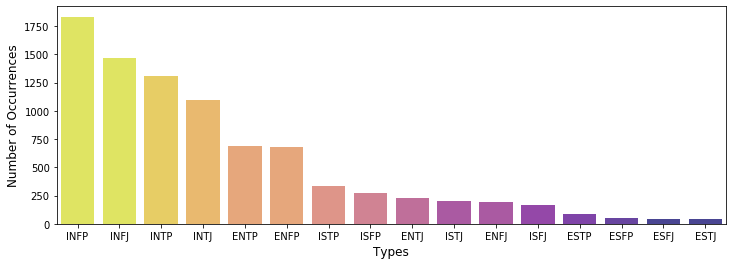

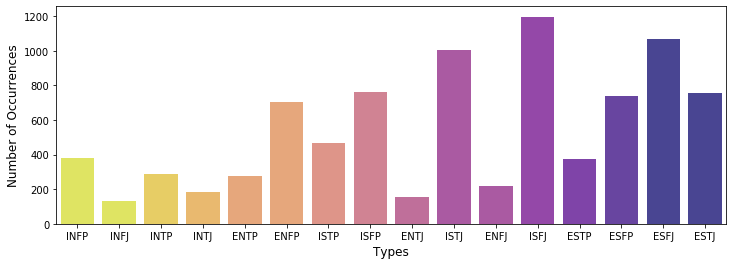

In [8]:

#Wizualizacja udziału Klas

from matplotlib import cm

cnt_srs = df['type'].value_counts()
viridis = cm.get_cmap('plasma', 12)
colors = viridis(np.flip(np.linspace(0, 1, 16)))
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8,palette=colors)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()



#Wizualizacja udziału Klas w Społeczeństwie

from matplotlib import cm
Procentowy = [len(df)*0.044,len(df)*0.015,len(df)*0.033,len(df)*0.021,len(df)*0.032,len(df)*0.081,len(df)*0.054,len(df)*0.088,len(df)*0.018,len(df)*0.116,len(df)*0.025,len(df)*0.138,len(df)*0.043,len(df)*0.085,len(df)*0.123,len(df)*0.087]
cnt_srs = df['type'].value_counts()
viridis = cm.get_cmap('plasma', 12)
colors = viridis(np.flip(np.linspace(0, 1, 16)))
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, Procentowy, alpha=0.8,palette=colors)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

Nasze dane **nie**  odpowiadają rozkładowi w społeczeństwie

     Z powodu antagonizacji wymiarów binarnych, możemy sie spodziewać, ze coś co może róznicować osoby o różnych Cechach 
     to ilość użytcych słów. Następnym takim czynnikiem może być również ilosć użytych linków
     (chęć dzielenia sie informacją), mówienie o abstrakcji i personalnych doświadczeniach (muzyka),
     niepewnosć (np. poprzez ilosć wielokropków), oraz udostępniane obrazki.
     Taką cechą może być również mówienie o sobie (użycie 'I')

Z naszych postów ekstraktujemy wybrane Cechy: ilosc słow na osobę, ilość wielokropków, ilośc linków, ilość muzyki, ilość jpgów, ilość użycia 'I'

In [9]:
def words_per_post():

    df['words_per_post'] = 0
    for i in range(len(df.index)):
        df['words_per_post'].loc[i] = len(df["posts"].loc[i].split())/50
        #print(len(df["posts"].loc[i].split())/50)

def Average_frase_per_person(frase):
    df["{} per Post".format(frase)] = 0
    for i in range(len(df.index)):
        df["{} per Post".format(frase)].loc[i]  = df["posts"].loc[i].count(frase)/50
   

#### Ekstrakcja

In [10]:
#Cecha 1: Ile słów na post używa dana osoba?

words_per_post()
df

C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,type,posts,words_per_post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,15.92
8671,ENFP,'So...if this thread already exists someplace ...,26.18
8672,INTP,'So many questions when i do these things. I ...,18.96
8673,INFP,'I am very conflicted right now when it comes ...,34.10


In [11]:
#Cecha 2: Ile średnio wielokropków na post używa dana osoba?

Average_frase_per_person('...')
df

C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,type,posts,words_per_post,... per Post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.30
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.38
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.26
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.52
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.42
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,15.92,0.14
8671,ENFP,'So...if this thread already exists someplace ...,26.18,0.82
8672,INTP,'So many questions when i do these things. I ...,18.96,0.38
8673,INFP,'I am very conflicted right now when it comes ...,34.10,0.94


In [12]:

#Cecha 3: Ile średnio linków na post używa dana osoba?
Average_frase_per_person('http')
df


C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,type,posts,words_per_post,... per Post,http per Post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.30,0.48
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.38,0.20
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.26,0.10
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.52,0.04
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.42,0.12
...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,15.92,0.14,0.14
8671,ENFP,'So...if this thread already exists someplace ...,26.18,0.82,0.04
8672,INTP,'So many questions when i do these things. I ...,18.96,0.38,0.04
8673,INFP,'I am very conflicted right now when it comes ...,34.10,0.94,0.00


In [13]:
#Cecha 4: Ile średnio frazy 'Muzyka' na post używa dana osoba?

Average_frase_per_person('music')
df

C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,type,posts,words_per_post,... per Post,http per Post,music per Post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.30,0.48,0.02
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.38,0.20,0.00
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.26,0.10,0.00
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.52,0.04,0.02
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.42,0.12,0.02
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,15.92,0.14,0.14,0.00
8671,ENFP,'So...if this thread already exists someplace ...,26.18,0.82,0.04,0.00
8672,INTP,'So many questions when i do these things. I ...,18.96,0.38,0.04,0.00
8673,INFP,'I am very conflicted right now when it comes ...,34.10,0.94,0.00,0.00


In [14]:
#Cecha 5: Ile średnio obrazków na post używa dana osoba?

Average_frase_per_person('jpg')
df

C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,type,posts,words_per_post,... per Post,http per Post,music per Post,jpg per Post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.30,0.48,0.02,0.12
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.38,0.20,0.00,0.02
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.26,0.10,0.00,0.00
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.52,0.04,0.02,0.00
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.42,0.12,0.02,0.04
...,...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,15.92,0.14,0.14,0.00,0.02
8671,ENFP,'So...if this thread already exists someplace ...,26.18,0.82,0.04,0.00,0.00
8672,INTP,'So many questions when i do these things. I ...,18.96,0.38,0.04,0.00,0.00
8673,INFP,'I am very conflicted right now when it comes ...,34.10,0.94,0.00,0.00,0.00


In [15]:
#Cecha 6: Ile średnio SŁowa 'I' na post używa dana osoba?
#Wzięte z Analizy częstości występowania

Average_frase_per_person('I')
df

C:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,type,posts,words_per_post,... per Post,http per Post,music per Post,jpg per Post,I per Post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.30,0.48,0.02,0.12,0.46
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.38,0.20,0.00,0.02,2.02
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.26,0.10,0.00,0.00,0.98
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.52,0.04,0.02,0.00,1.74
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.42,0.12,0.02,0.04,0.92
...,...,...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,15.92,0.14,0.14,0.00,0.02,1.02
8671,ENFP,'So...if this thread already exists someplace ...,26.18,0.82,0.04,0.00,0.00,2.40
8672,INTP,'So many questions when i do these things. I ...,18.96,0.38,0.04,0.00,0.00,0.98
8673,INFP,'I am very conflicted right now when it comes ...,34.10,0.94,0.00,0.00,0.00,3.22


#### Wizualizacja

Zobaczmy na ile wybrane Cechy różnią się pomiędzy grupami. Zwizualizujmy je razem, gdzie podobienstwo bedzie widoczne komparatytywnie

In [16]:
#Wizualizacja Razem --> pokazanie że średnie są niemalże identyczne ==> słaba rozpoznawalność

def wykres_osobowosci_razem(od_czego,do_czego='type'):
    from matplotlib import cm
  
    viridis = cm.get_cmap('plasma', 12)
    colors = viridis(np.linspace(0, 1, 16))

    typ_osobow = np.unique(df[do_czego])
    plt.figure(figsize = (10,10))
   # cmap = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    for i in range(len(typ_osobow)):
        plt.axvline(x=np.mean(df[od_czego].loc[df[do_czego]==typ_osobow[i]]),color=colors[i])
        plt.hist(df[od_czego].loc[df[do_czego]==typ_osobow[i]],bins=25,color=colors[i])
        plt.title(od_czego)
        plt.xlabel(" per post")
        plt.ylabel("Number of records")

        #print("{}: {}".format(typ_osobow[i],np.mean(df[od_czego].loc[df['type']==typ_osobow[i]])))
    plt.legend(typ_osobow)
    plt.show

#wizualizacja poszczególnych Cech dla wybranych typów osobowości

def wykres_osobowosci(od_czego,ticks=(0,5,10,15,20,25,30,35),tyks=[0,100,200,300,400,500,600,700,800]):
    from matplotlib import cm
    viridis = cm.get_cmap('plasma', 12)
    colors = viridis(np.linspace(0, 1, 16))
    
    typ_osobow = np.unique(df['type'])
    fig,axes = plt.subplots(4,4,figsize=(20,20))
    for i,ax in zip(range(len(typ_osobow)),axes.ravel()):
        ax.hist(df[od_czego].loc[df['type']==typ_osobow[i]],bins=25,color=colors[12])
        ax.axvline(x=np.mean(df[od_czego].loc[df['type']==typ_osobow[i]]),color=colors[4])
        ax.set_xticks(ticks)
        ax.set_xlabel("per post")
        ax.set_ylabel("Number of records")
        ax.set_yticks(tyks)
        ax.title.set_text(typ_osobow[i])
        print("{}: {}".format(typ_osobow[i],np.mean(df[od_czego].loc[df['type']==typ_osobow[i]])))
    plt.show

    



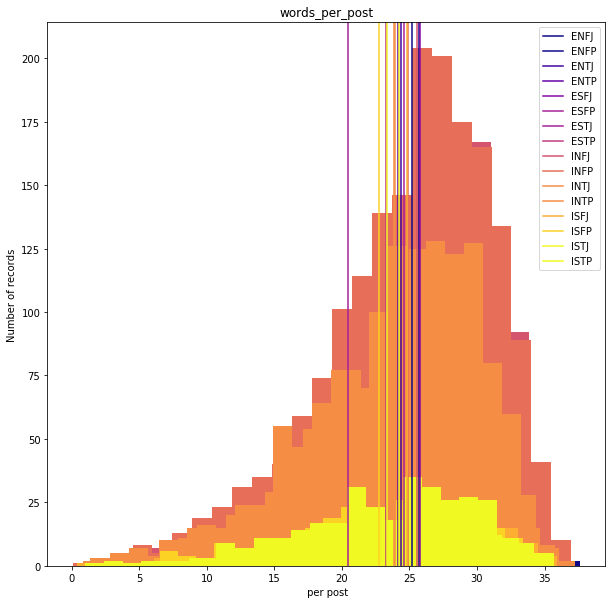

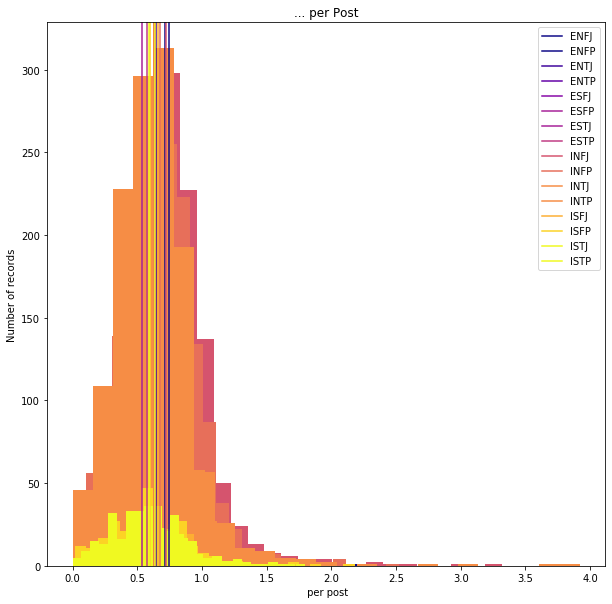

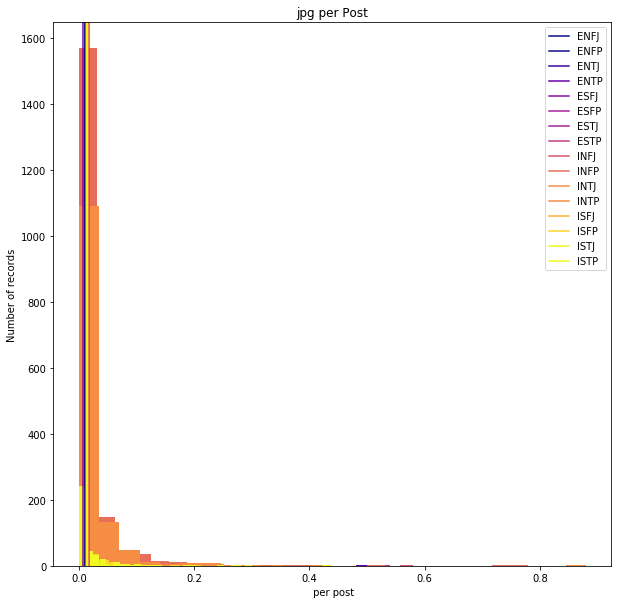

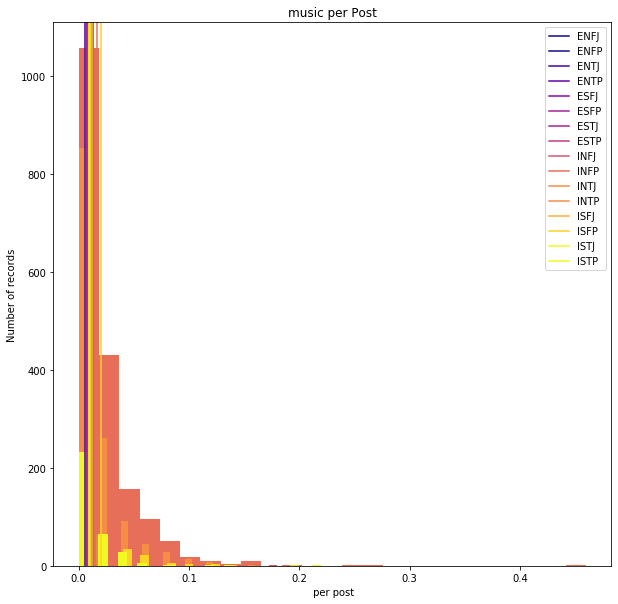

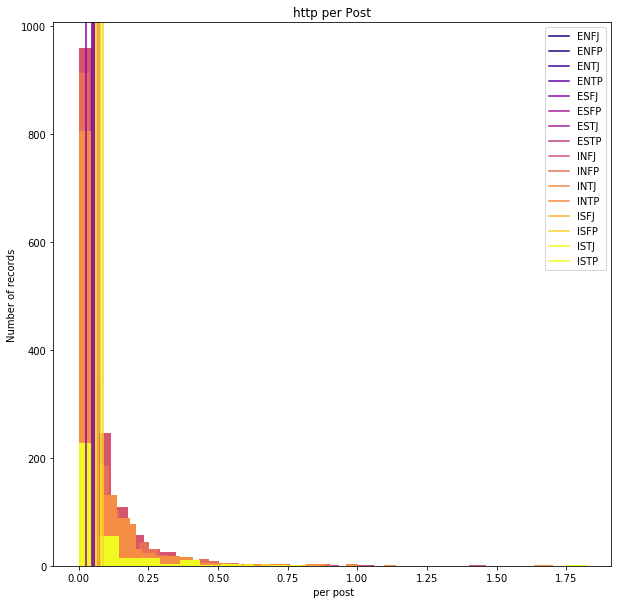

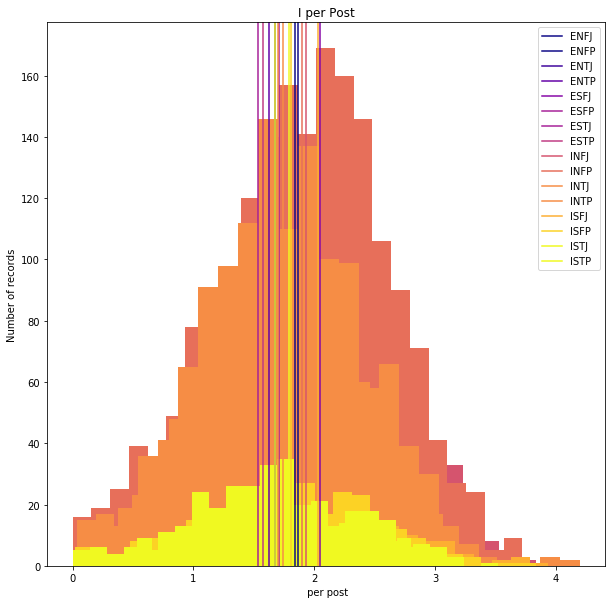

In [17]:
wykres_osobowosci_razem('words_per_post')
wykres_osobowosci_razem('... per Post')
wykres_osobowosci_razem('jpg per Post')
wykres_osobowosci_razem('music per Post')
wykres_osobowosci_razem('http per Post')
wykres_osobowosci_razem('I per Post')

z faktu, że większosc danych sie pokrywa, możemy wnioskowac podobną strukturę. Średnie również nie rożnią się znacząco pomiędzy typami osobowości

Pokażemy osobno każdą Cechę ,żeby to potwierdzić oraz pokażemy średnie

ENFJ: 25.731789473684206
ENFP: 25.21558518518521
ENTJ: 24.361991341991345
ENTP: 24.12002919708029
ESFJ: 25.81
ESFP: 20.4425
ESTJ: 24.59076923076923
ESTP: 23.25191011235956
INFJ: 25.56888435374151
INFP: 24.891266375545865
INTJ: 23.891732355637053
INTP: 23.95547546012269
ISFJ: 24.82590361445782
ISFP: 22.728265682656826
ISTJ: 24.264487804878044
ISTP: 23.3113353115727


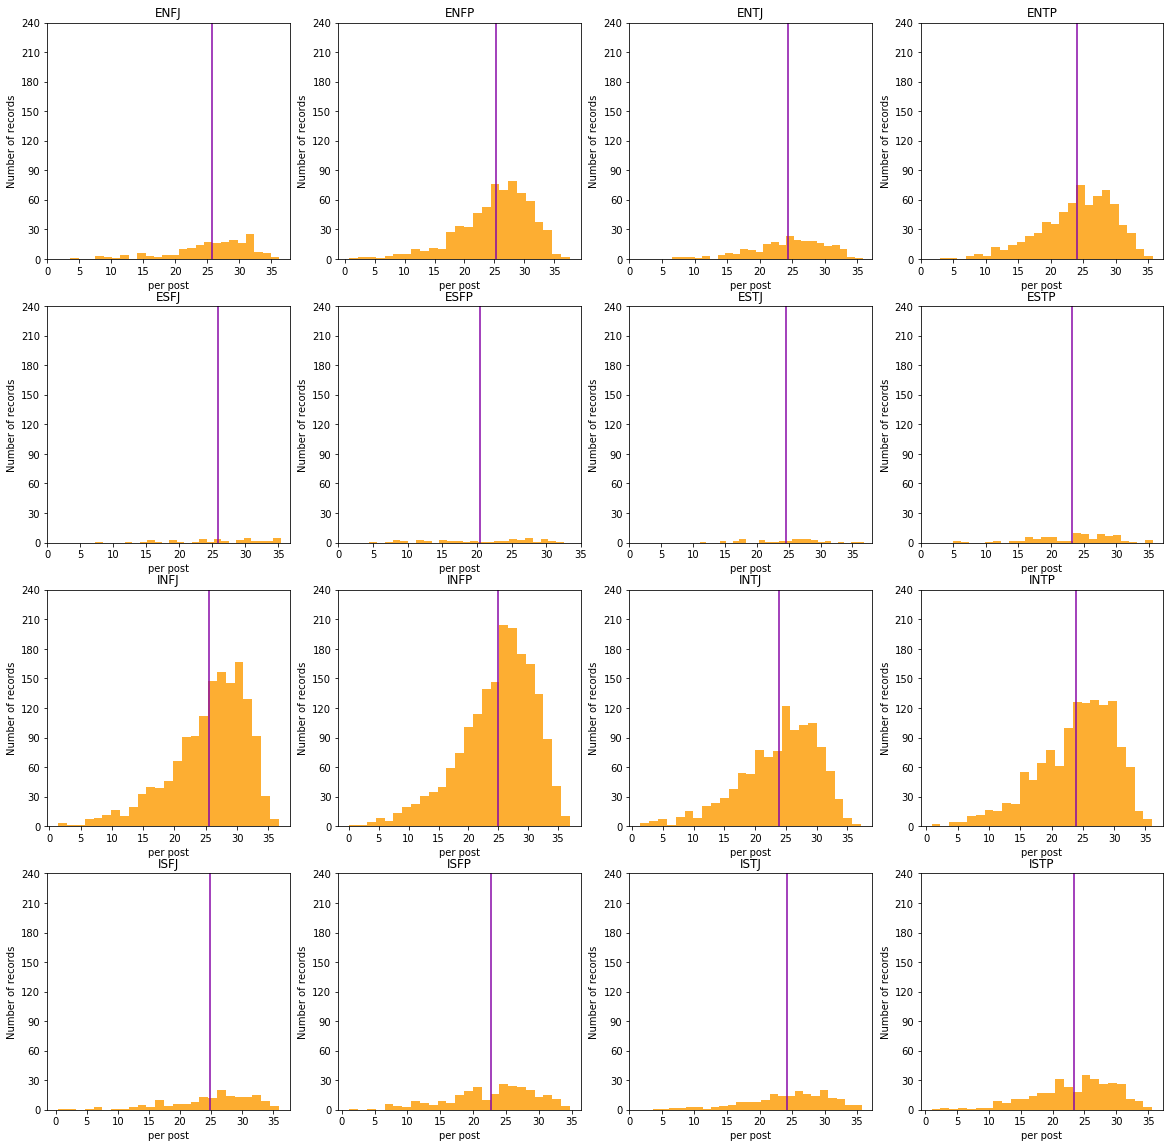

In [18]:
#Ilość słów na post

wykres_osobowosci('words_per_post',tyks=[0,30,60,90,120,150,180,210,240]
)

ENFJ: 0.05326315789473676
ENFP: 0.05045925925925915
ENTJ: 0.05316017316017309
ENTP: 0.048262773722627564
ESFJ: 0.027142857142857146
ESFP: 0.05541666666666667
ESTJ: 0.05282051282051283
ESTP: 0.06471910112359547
INFJ: 0.06587755102040828
INFP: 0.07542576419213985
INTJ: 0.06359303391384065
INTP: 0.07076687116564434
ISFJ: 0.07060240963855414
ISFP: 0.08833948339483383
ISTJ: 0.06117073170731704
ISTP: 0.08100890207715115


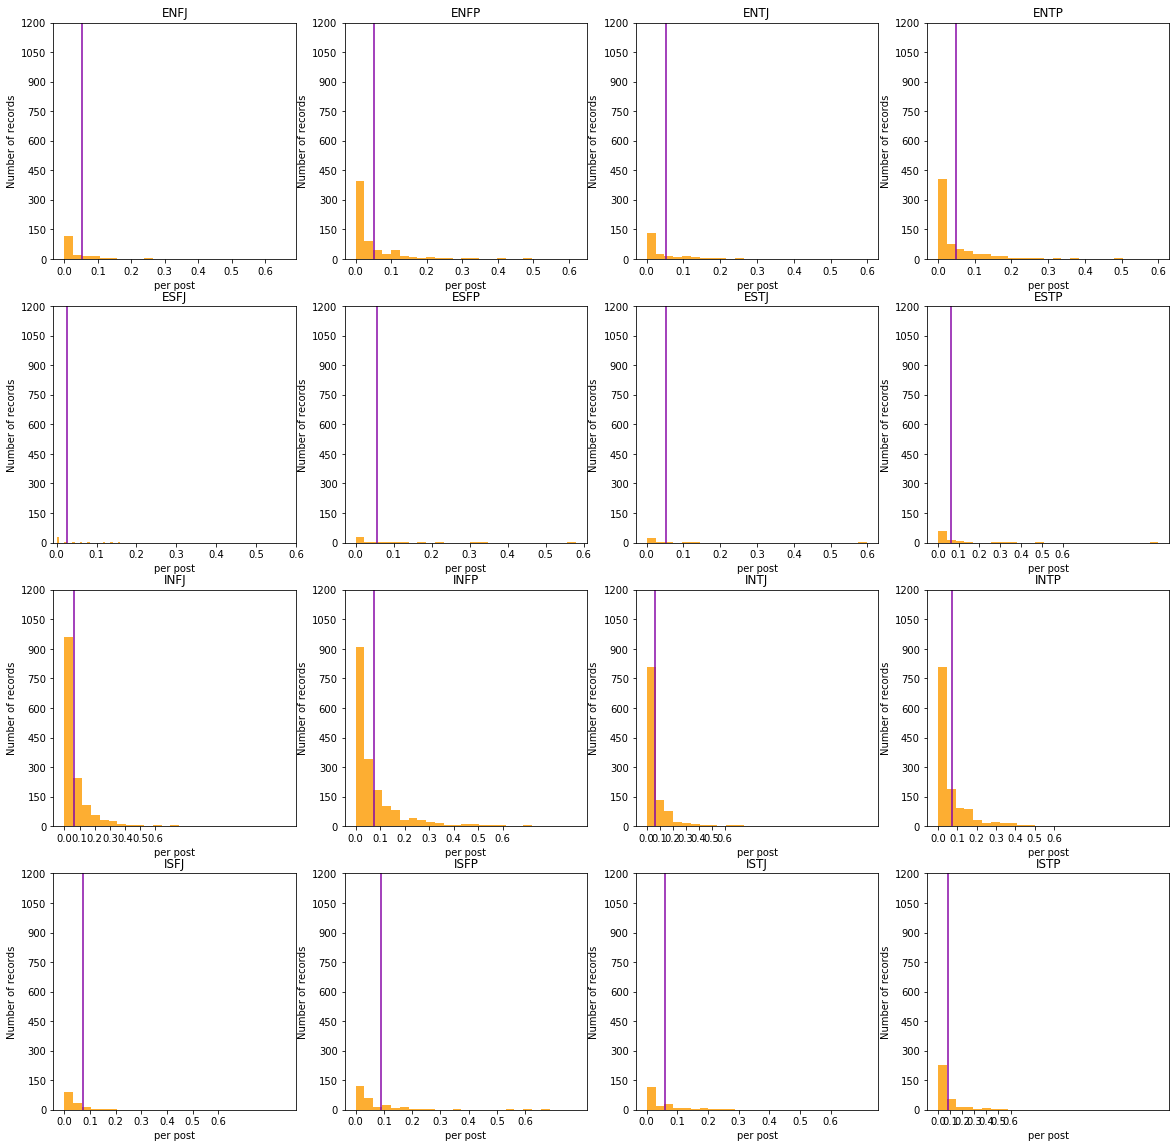

In [19]:
#ilość linków

wykres_osobowosci('http per Post',ticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6),tyks=[0,150,300,450,600,750,900,1050,1200])


ENFJ: 0.7444210526315788
ENFP: 0.7158814814814816
ENTJ: 0.646666666666667
ENTP: 0.6310364963503654
ESFJ: 0.6385714285714285
ESFP: 0.53375
ESTJ: 0.6307692307692309
ESTP: 0.5775280898876403
INFJ: 0.7214285714285714
INFP: 0.6765938864628811
INTJ: 0.6305407882676447
INTP: 0.6321779141104287
ISFJ: 0.66144578313253
ISFP: 0.5961623616236162
ISTJ: 0.6383414634146342
ISTP: 0.5869436201780414


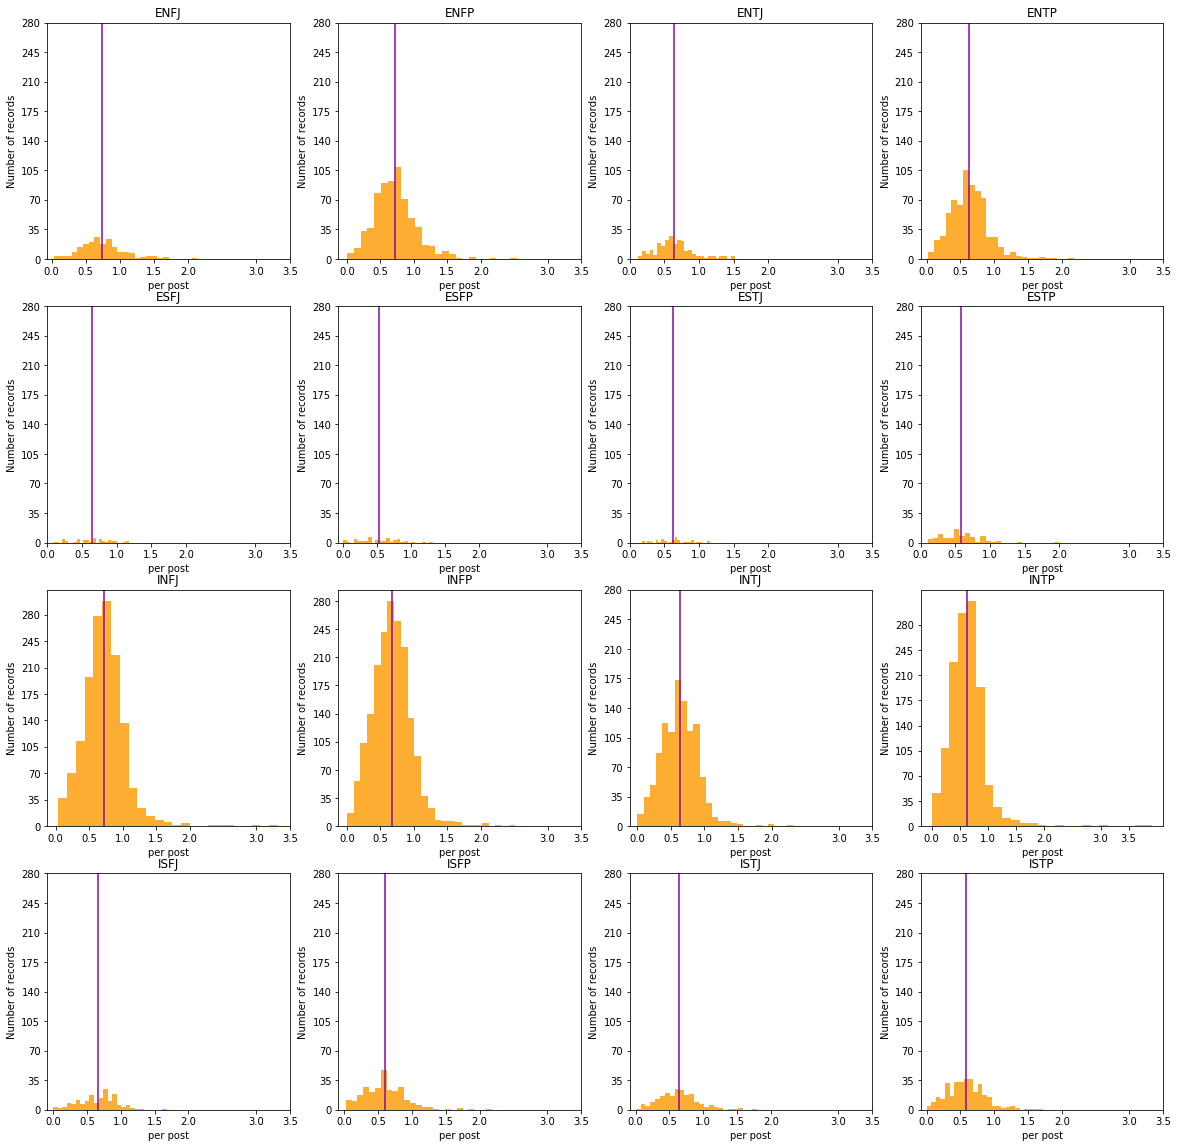

In [20]:
#, ilośc wielokropków

wykres_osobowosci('... per Post',ticks=(0.0,0.5,1.0,1.5,2.0,3.0,3.5),tyks=[0,35,70,105,140,175,210,245,280])


ENFJ: 0.012736842105263164
ENFP: 0.01274074074074069
ENTJ: 0.006147186147186151
ENTP: 0.008671532846715306
ESFJ: 0.007142857142857143
ESFP: 0.007083333333333334
ESTJ: 0.009230769230769232
ESTP: 0.008539325842696632
INFJ: 0.011605442176870663
INFP: 0.01669213973799109
INTJ: 0.009055912007332658
INTP: 0.01277607361963181
ISFJ: 0.011807228915662656
ISFP: 0.020295202952029502
ISTJ: 0.00965853658536586
ISTP: 0.010207715133531164


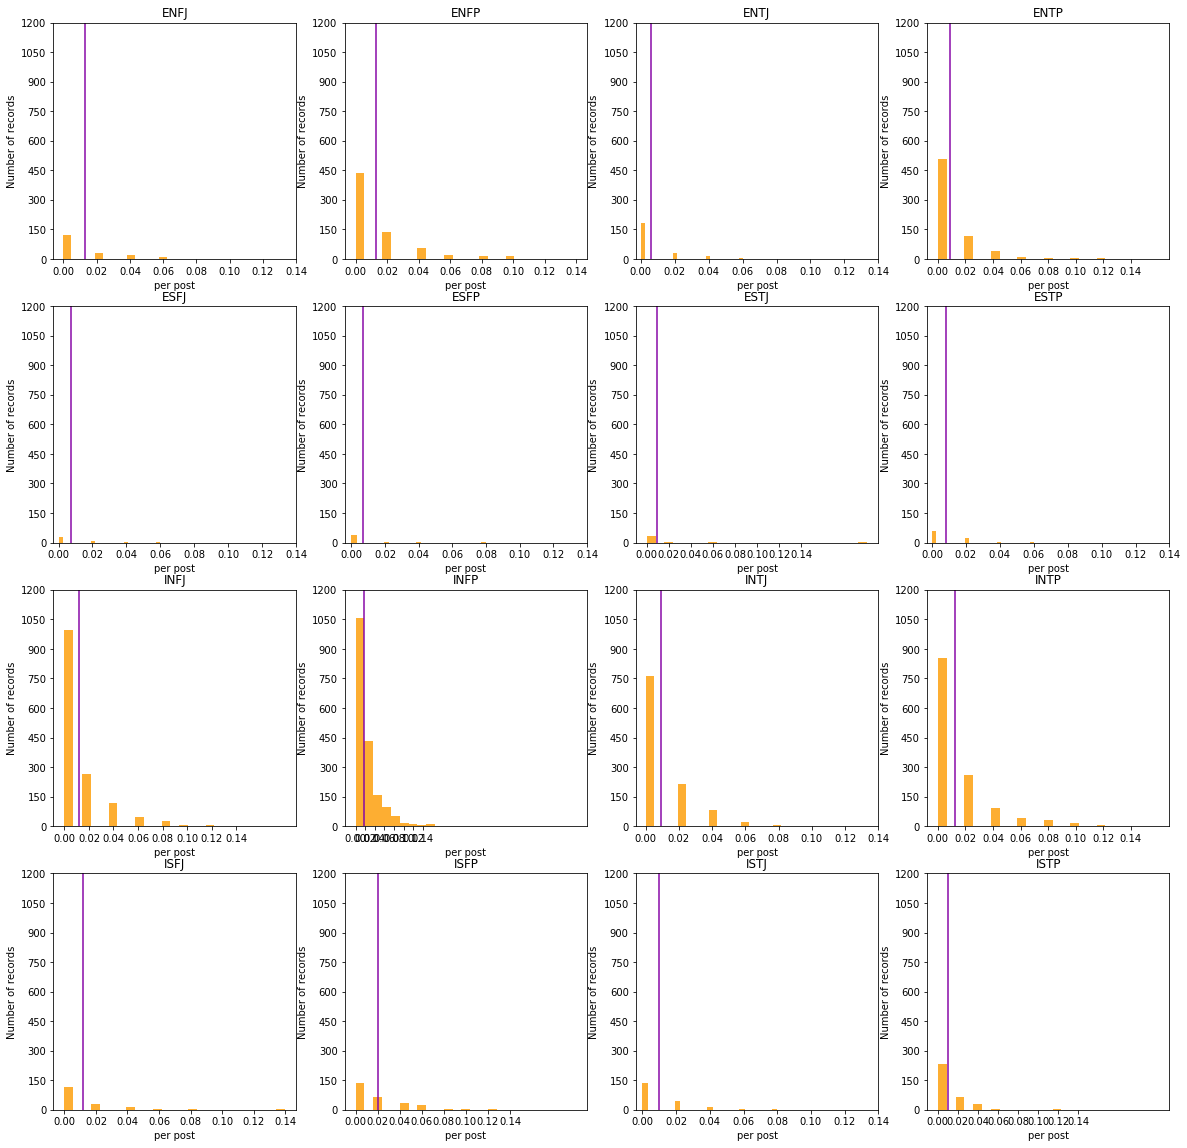

In [21]:
#ilość muzyki

wykres_osobowosci('music per Post',ticks=(0.0,0.02,0.04,0.06,0.08,0.10,0.12,0.14),tyks=[0,150,300,450,600,750,900,1050,1200])


ENFJ: 0.011578947368421057
ENFP: 0.01054814814814813
ENTJ: 0.012987012987012993
ENTP: 0.012729927007299227
ESFJ: 0.006666666666666667
ESFP: 0.012500000000000002
ESTJ: 0.01230769230769231
ESTP: 0.01752808988764045
INFJ: 0.012571428571428513
INFP: 0.015534934497816512
INTJ: 0.01470210815765347
INTP: 0.015720858895705434
ISFJ: 0.013975903614457838
ISFP: 0.014612546125461263
ISTJ: 0.013365853658536594
ISTP: 0.014005934718100887


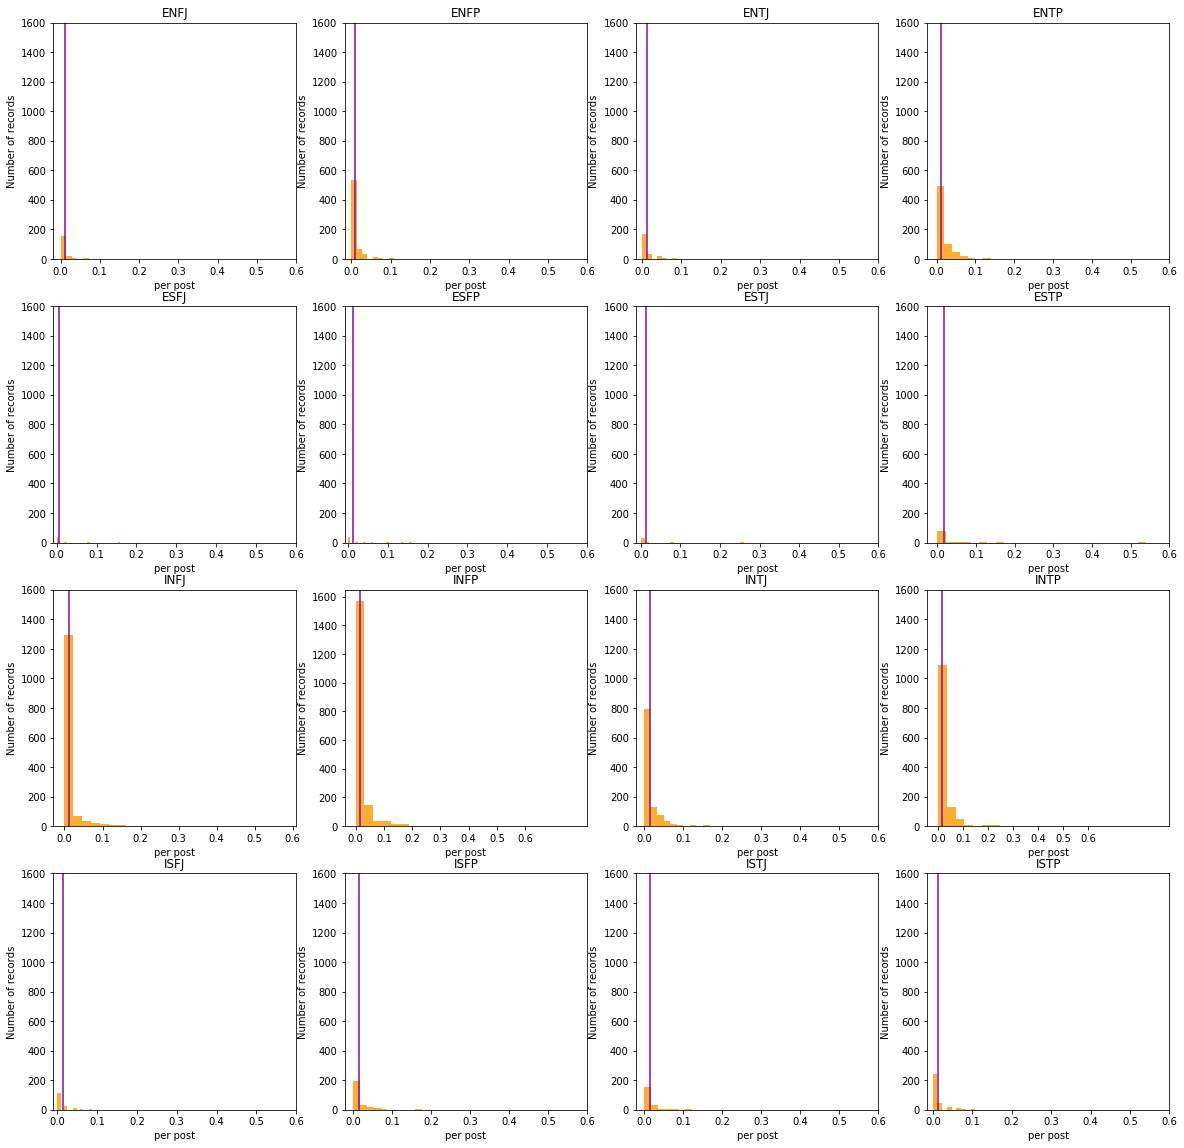

In [22]:
#, ilość jpgów

wykres_osobowosci('jpg per Post',ticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6),tyks=[0,200,400,600,800,1000,1200,1400,1600])


ENFJ: 1.8402105263157906
ENFP: 1.8632592592592594
ENTJ: 1.6726406926406912
ENTP: 1.629489051094891
ESFJ: 2.0476190476190474
ESFP: 1.5391666666666663
ESTJ: 1.7133333333333336
ESTP: 1.5795505617977532
INFJ: 1.9290884353741473
INFP: 1.8969759825327506
INTJ: 1.6979101741521536
INTP: 1.7457822085889572
ISFJ: 2.0307228915662647
ISFP: 1.8080442804428034
ISTJ: 1.7922926829268289
ISTP: 1.6734718100890196


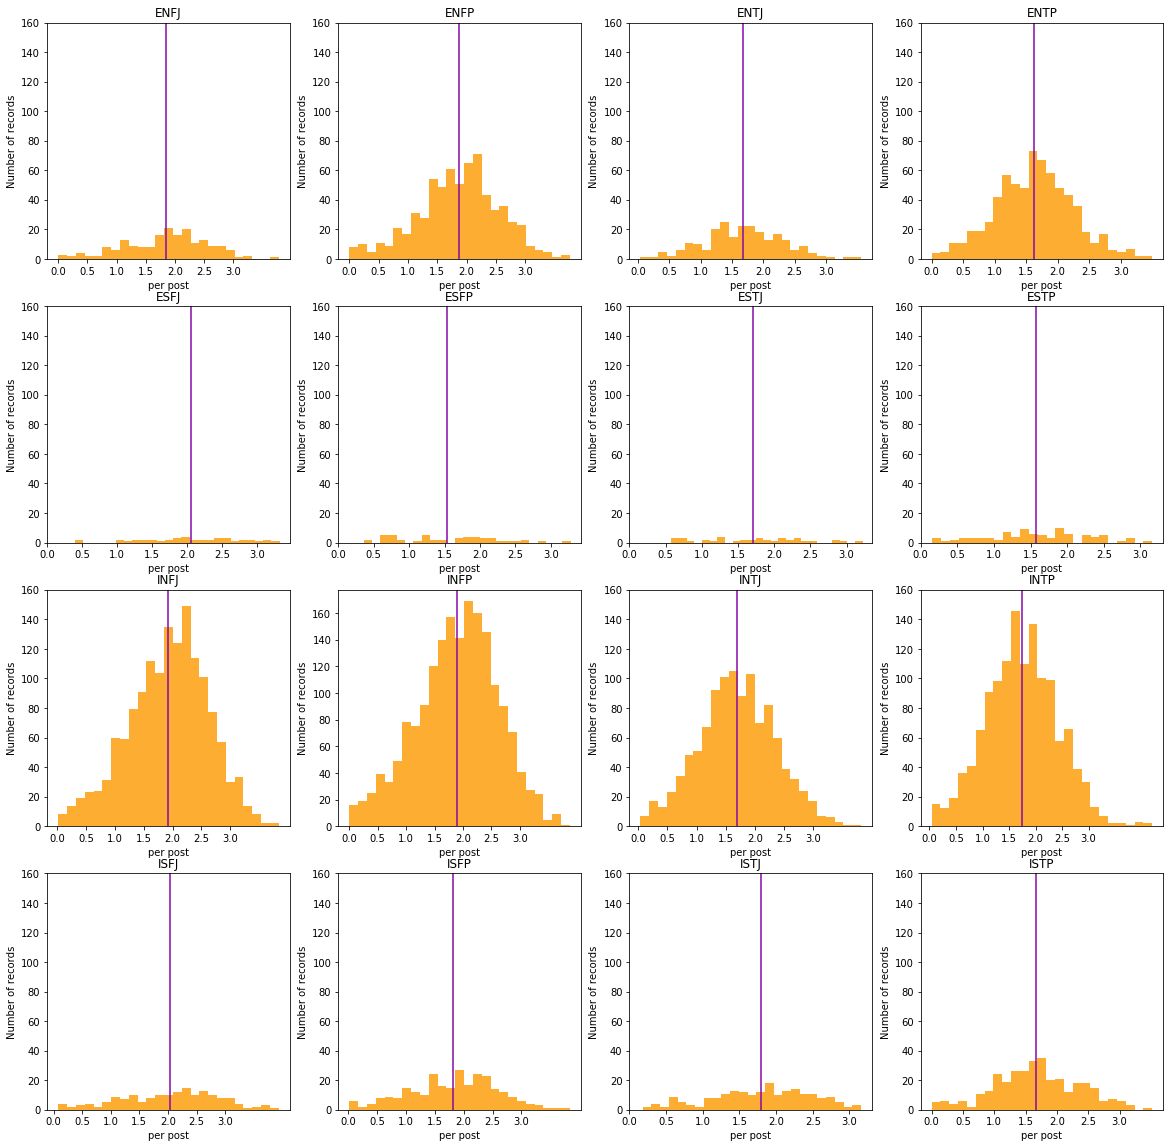

In [23]:
#, ilość użycia 'I'

wykres_osobowosci('I per Post',ticks=(0.0,0.5,1,1.5,2,2.5,3),tyks=[0,20,40,60,80,100,120,140,160])


Widzimy z tego że różnice są widoczne jedynie w Parach cech binarnych

#### Selekcja istotnych Cech

In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

XX = df.drop(['type','posts'], axis=1).values
yy = df['type'].values

print(XX.shape)
print(yy.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,yy,test_size = 0.1, random_state=42)



bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.drop(['type','posts'], axis=1).columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print best features

(8675, 6)
(8675,)
            Specs       Score
0  words_per_post  219.272107
5      I per Post   54.593654
1    ... per Post   22.173564
2   http per Post   13.328238
3  music per Post    6.382853
4    jpg per Post    1.907333


Okazuje się że jpg w ogóle nie mają znaczenia a użycie słowa music również nie róznicuje grup

In [25]:
df.drop(['type','posts'], axis=1).corr()

,words_per_post,... per Post,http per Post,music per Post,jpg per Post,I per Post
words_per_post,1.000000,0.694532,-0.420049,0.045314,-0.229499,0.709836
... per Post,0.694532,1.000000,-0.245076,0.026490,-0.120342,0.465793
http per Post,-0.420049,-0.245076,1.000000,0.089092,0.539560,-0.294472
music per Post,0.045314,0.026490,0.089092,1.000000,0.003052,0.064607
jpg per Post,-0.229499,-0.120342,0.539560,0.003052,1.000000,-0.173834
I per Post,0.709836,0.465793,-0.294472,0.064607,-0.173834,1.000000


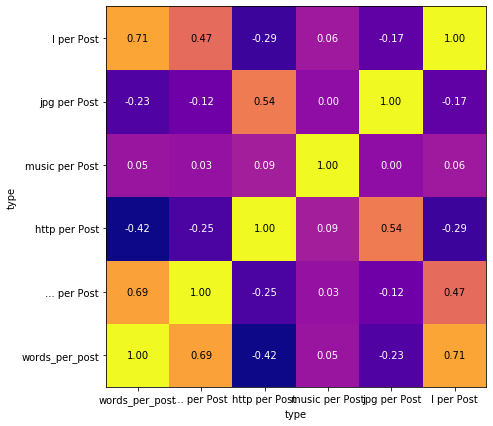

In [26]:
plt.figure(figsize = (7,7))
heatmap(df.drop(['type','posts'], axis=1).corr(), xlabel = 'type', ylabel ='type', xticklabels=['words_per_post','... per Post','http per Post','music per Post','jpg per Post','I per Post'], yticklabels= ['words_per_post','... per Post','http per Post','music per Post','jpg per Post','I per Post'], cmap='plasma',
            vmin=None, vmax=None, ax=None, fmt="%0.2f")

Wynika z tego że najbardziej istotne będą cechy: words per post, ... per post oraz I per post

**Dalsza Analiza pokazał jednak znikomy wpływ selekcji cech na wydajność modelu**

### rozpoznanie osobowości MBTI --> pokazanie koniecznośc Resamplingu


In [27]:
XX = df.drop(['type','posts'], axis=1).values
yy = df['type'].values

print(XX.shape)
print(yy.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,yy,test_size = 0.1, random_state=42)


(8675, 6)
(8675,)


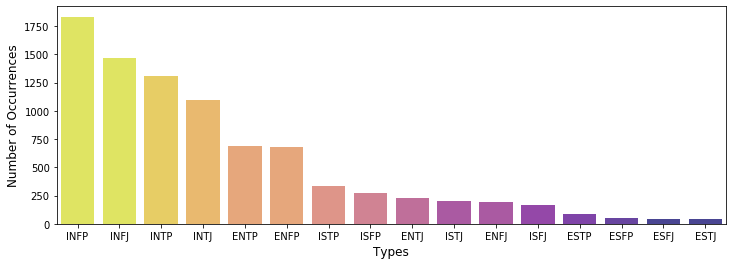

In [28]:

#Wizualizacja udziału Klas

from matplotlib import cm

cnt_srs = df['type'].value_counts()
viridis = cm.get_cmap('plasma', 12)
colors = viridis(np.flip(np.linspace(0, 1, 16)))
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8,palette=colors)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [29]:
#Przykładowy model --> jeden ze zwróconych przez Grid

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

logreg3 = SVC(kernel ='rbf', gamma= 0.1, C=0.1,probability = True)
logreg3.fit(X_train[:,[0,1,5]],y_train)


from sklearn import metrics

print(metrics.accuracy_score(y_test, logreg3.predict(X_test[:,[0,1,5]])))
print(metrics.f1_score(y_test, logreg3.predict(X_test[:,[0,1,5]]),average='micro'))

0.20046082949308755
0.20046082949308755


Bez Selekcji;

    0.20046082949308755
    0.20046082949308755

In [30]:
print("R^2: {}".format(metrics.precision_score(y_test, logreg3.predict(X_test[:,[0,1,5]]),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test, logreg3.predict(X_test[:,[0,1,5]]),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test, logreg3.predict(X_test[:,[0,1,5]]),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, logreg3.predict(X_test[:,[0,1,5]])) ))

C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


R^2: 0.012528801843317972
recall_score: 0.0625
f1_score: 0.02087332053742802
accuracy_score: 0.20046082949308755


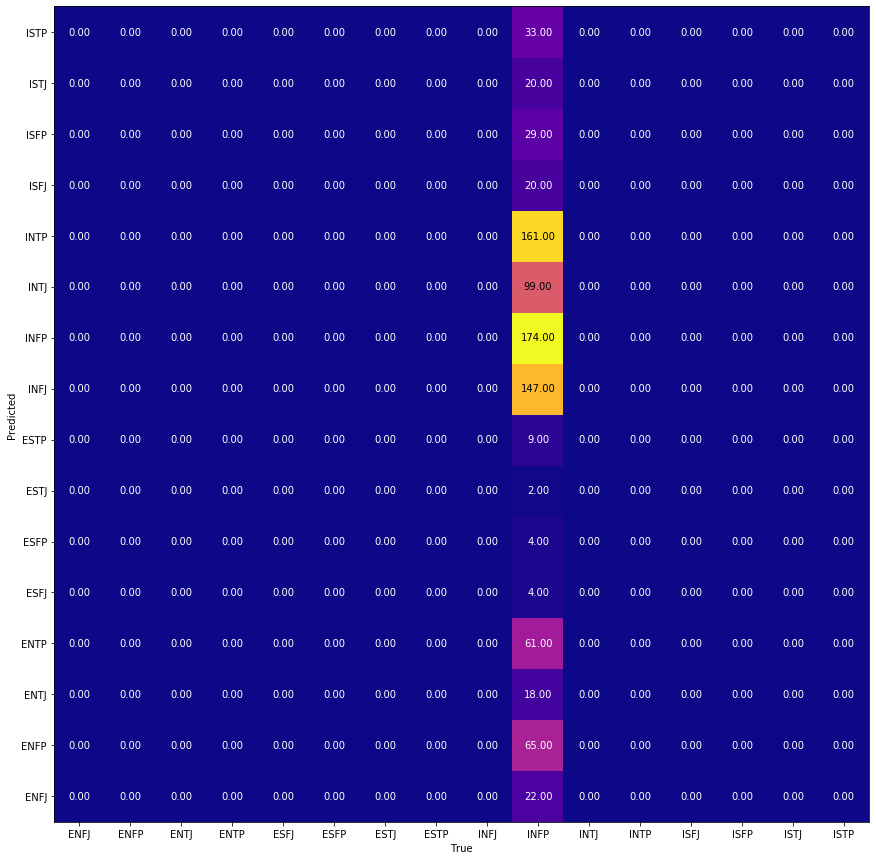

In [31]:
#print(metrics.confusion_matrix(y_test, logreg3.predict(X_test[:,[0,1,2,3,5]])))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test, logreg3.predict(X_test[:,[0,1,5]]))

personality_types = np.unique(y_test)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (15,15))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()

Jak Widać przydzielono tylko i wyłącznie do jednej klasy

### Resampling 

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2


XX = df.drop(['type','posts'], axis=1).values
yy = df['type'].values

print(XX.shape)
print(yy.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,yy,test_size = 0.1, random_state=42)

sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
#X_test_res, y_test_res = sm.fit_sample(X_test, y_test)

#print(y_train_res)
print(y_test.shape)

(8675, 6)
(8675,)
(868,)


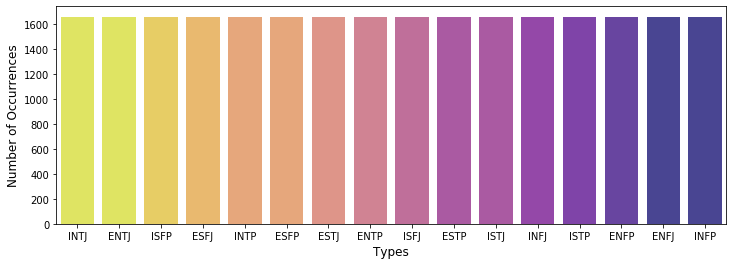

In [33]:
#Wizualizacja Zresamplowanych Klas

df_res = pd.DataFrame(X_train_res)
df_res.columns = ['words_per_post','... per Post','http per Post','music per Post','jpg per Post','I per Post']
df_res["type"] = y_train_res


cnt_srs = df_res["type"].value_counts()
viridis = cm.get_cmap('plasma', 12)
colors = viridis(np.flip(np.linspace(0, 1, 16)))
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8,palette=colors)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

In [34]:
#Feature Selection

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X_train_res,y_train_res)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.drop(['type','posts'], axis=1).columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 10 best features

            Specs        Score
0  words_per_post  2056.724814
5      I per Post   326.899163
1    ... per Post   113.079791
2   http per Post    86.409500
3  music per Post    26.777383
4    jpg per Post    10.074908


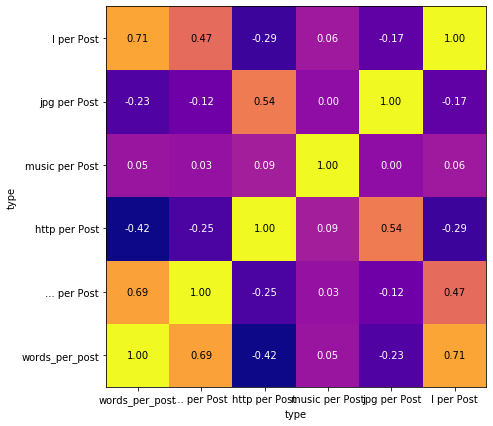

In [35]:
plt.figure(figsize = (7,7))
heatmap(df.drop(['type','posts'], axis=1).corr(), xlabel = 'type', ylabel ='type', xticklabels=['words_per_post','... per Post','http per Post','music per Post','jpg per Post','I per Post'], yticklabels= ['words_per_post','... per Post','http per Post','music per Post','jpg per Post','I per Post'], cmap='plasma',
            vmin=None, vmax=None, ax=None, fmt="%0.2f")

3 bajważniejsze Cechy nie zmeniły się

In [36]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics


XX = df.drop(['type','posts'], axis=1).values
yy = df['type'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,yy,test_size = 0.1, random_state=42)

sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [37]:
#Best Clssificator:
from sklearn.ensemble import ExtraTreesClassifier
Classif_res_Type = ExtraTreesClassifier(max_leaf_nodes = 64, n_estimators = 400)
Classif_res_Type.fit(X_train_res, y_train_res)

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test, Classif_res_Type.predict(X_test),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test, Classif_res_Type.predict(X_test),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test, Classif_res_Type.predict(X_test),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, Classif_res_Type.predict(X_test)) ))

R^2: 0.06930886643161069
recall_score: 0.0865125118050763
f1_score: 0.05452875677065675
accuracy_score: 0.07603686635944701


Selekcja Cech:

    R^2: 0.06337332946630916
    recall_score: 0.057190302764957616
    f1_score: 0.03632682063032406
    accuracy_score: 0.038018433179723504

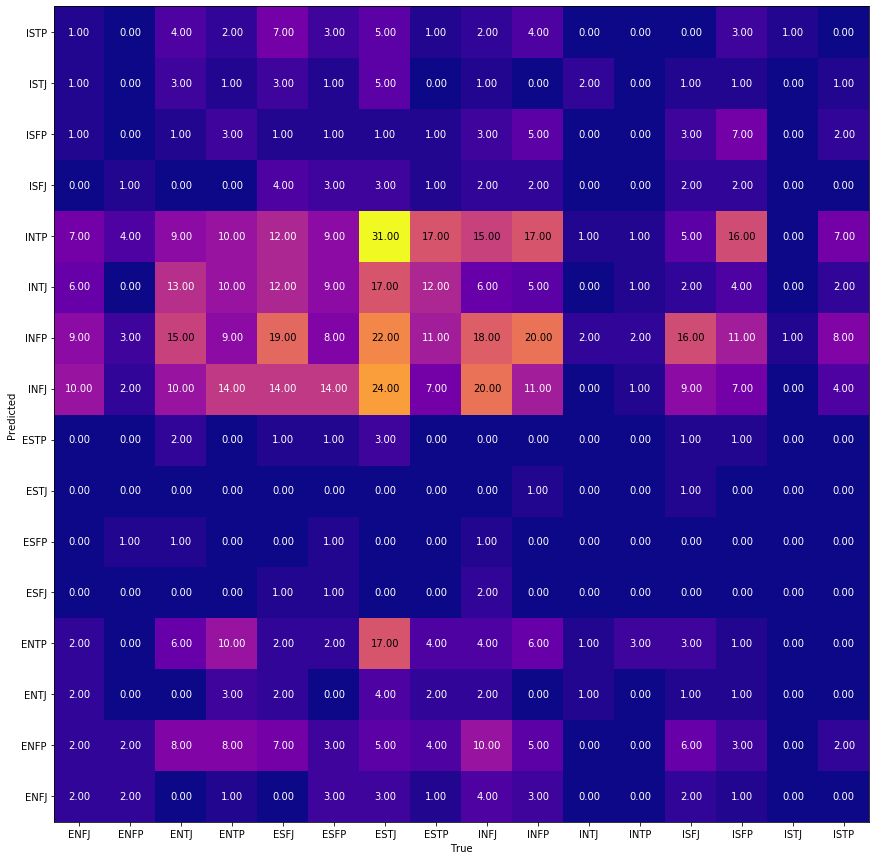

In [38]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test, Classif_res_Type.predict(X_test))

personality_types = np.unique(y_test)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (15,15))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show() 

Klasyfikacja Typów osobowości osiąga żałosne rezultaty: Sprawdźmy czy jeśli nie wybierzemy Cech manualnie coś się zmieni!

### Automatyczna Ekstarkcja Cech

Przeprowadzimy Teraz Automatyczną ekstrakcję ważkich cech za pomocą TFiDF

    TFIDF (ang. TF – term frequency, IDF – inverse document frequency) – ważenie częstością termów – odwrotna częstość w 
    dokumentach – jedna z metod obliczania wagi słów w oparciu o liczbę ich wystąpień, należąca do grupy algorytmów 
    obliczających statystyczne wagi termów. 
    Każdy dokument reprezentowany jest przez wektor, składający się z wag słów występujących w tym dokumencie.
    TFIDF informuje o częstości wystąpienia termów uwzględniając jednocześnie odpowiednie wyważenie znaczenia lokalnego termu
    oraz jego znaczenia w kontekście pełnej kolekcji dokumentów.

TFIDF zwróci nam najczęsciej występujące słowa dla poszczególnych grup, ale ważone miejscem ich wystepowania. Algorytm jednak nie zapewnia analziy Syntatkycznej ani Semnatycznej

In [39]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

from bs4 import BeautifulSoup
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



In [40]:

#Czyścimy zbiór Danych z  niepotrzebnych linków itp i zastępujemy je sowami kluczowymi

def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    return text
df['clean_posts'] = df['posts'].apply(cleanText)


In [41]:
XX = df['clean_posts'].values
yy = df['type'].values

print(XX.shape)
print(yy.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,yy,test_size = 0.1, random_state=42)

tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tsvd = TruncatedSVD(n_components=10)


(8675,)
(8675,)


In [42]:
#Przeprowadzamy Text Mining oraz Skalowanie danych i redukcje wymiarów

TfidVect  = tfidf.fit_transform(X_train)
svd_model = tsvd
data_revitalised_train = svd_model.fit_transform(TfidVect)



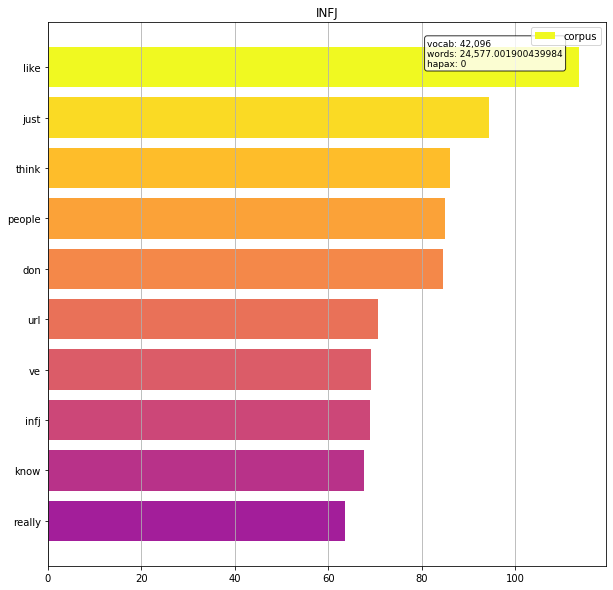

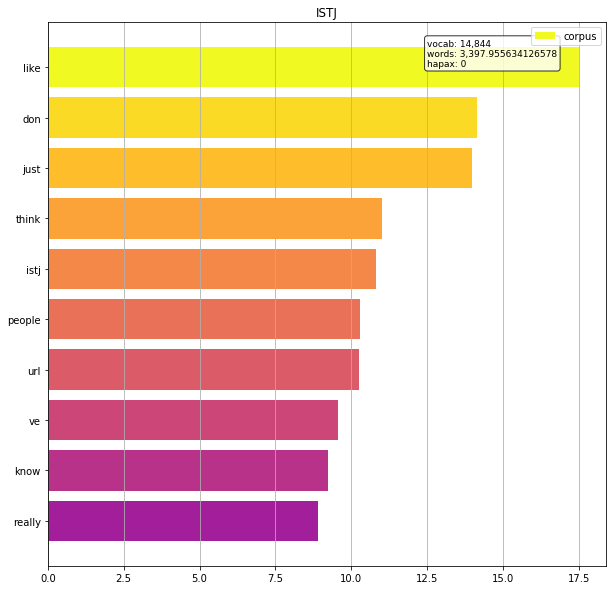

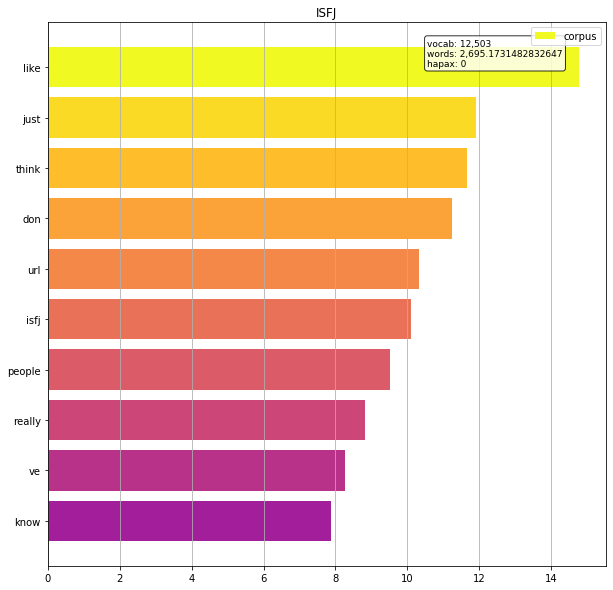

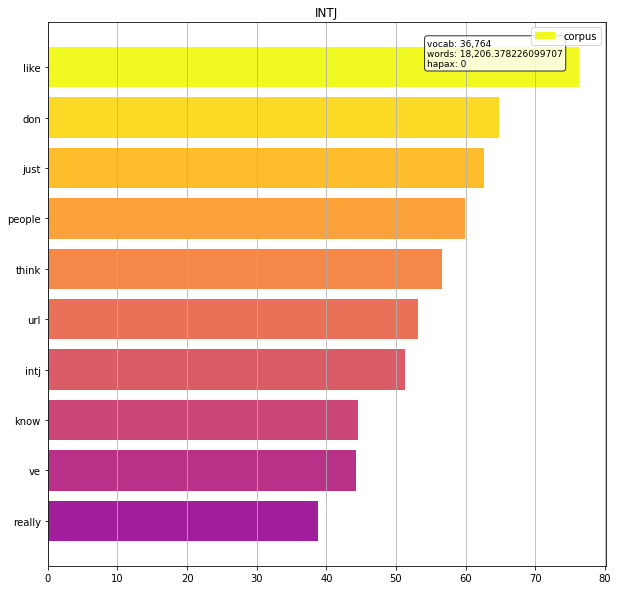

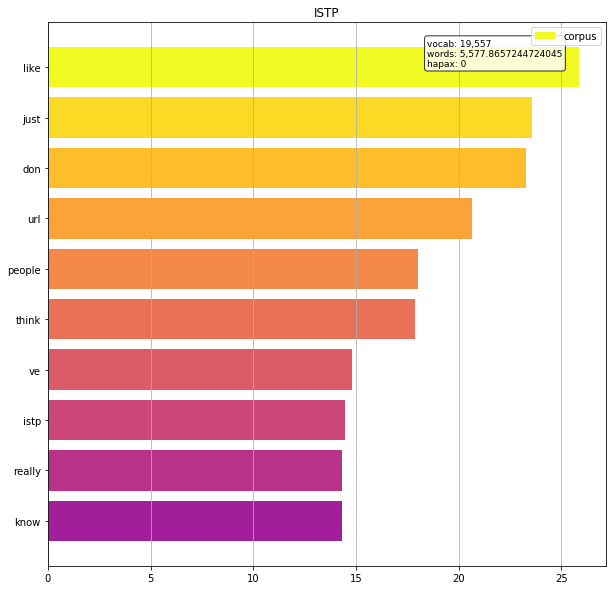

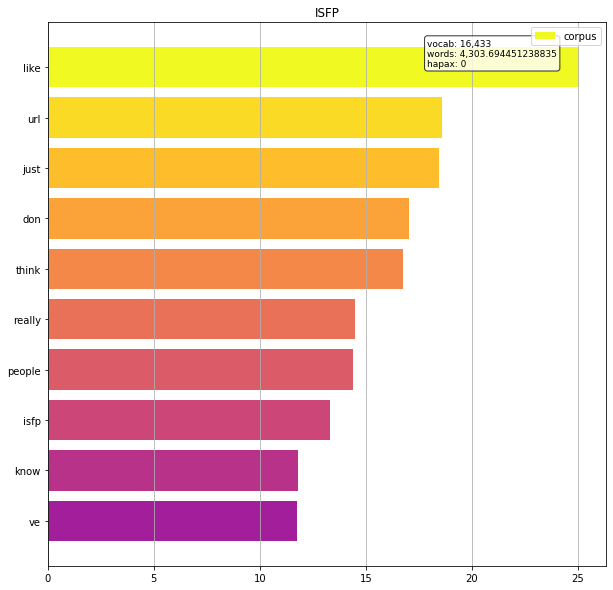

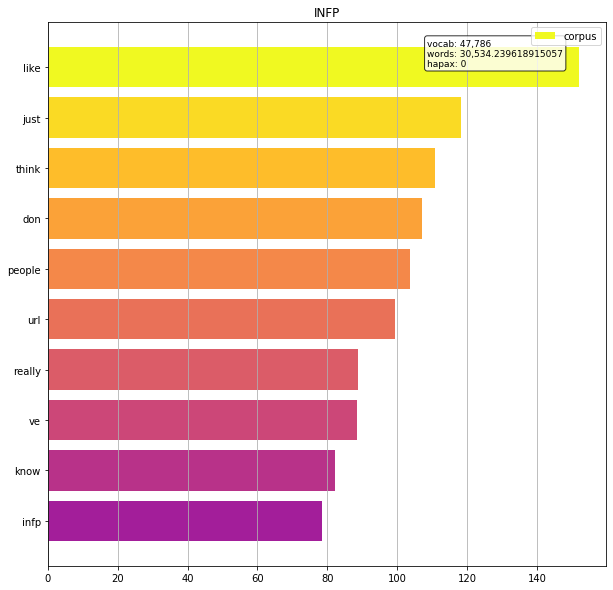

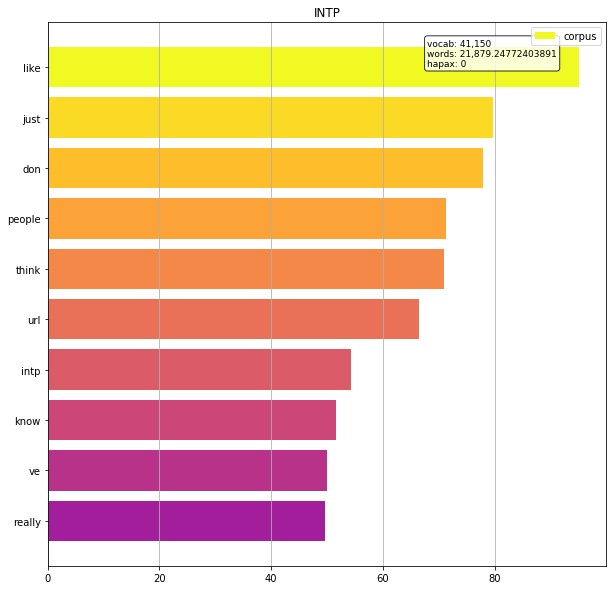

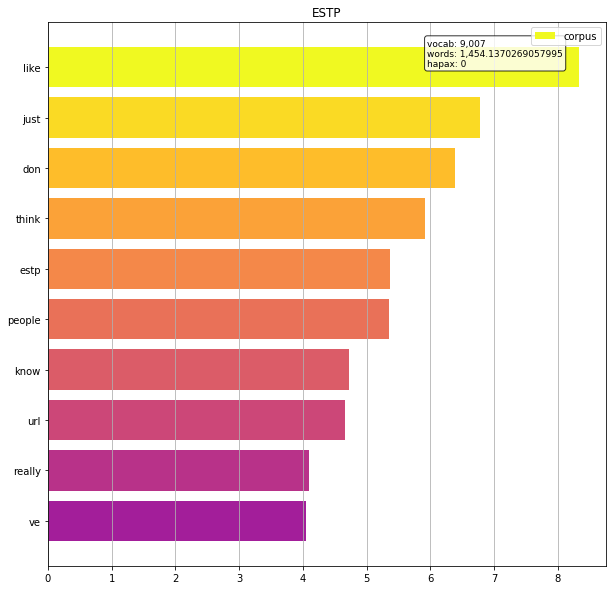

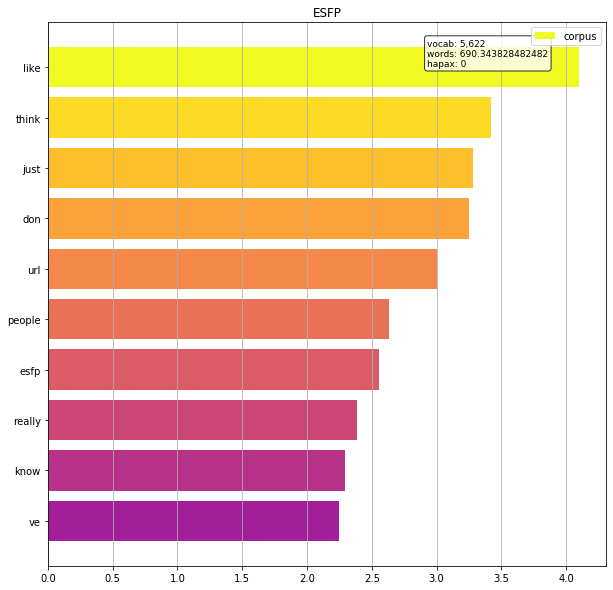

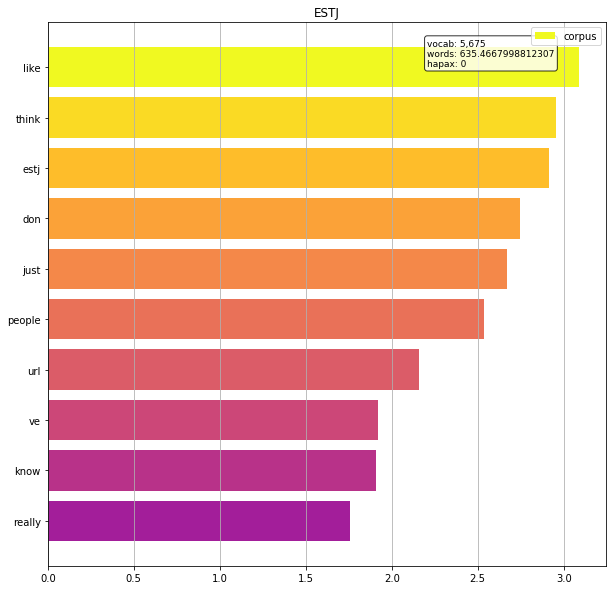

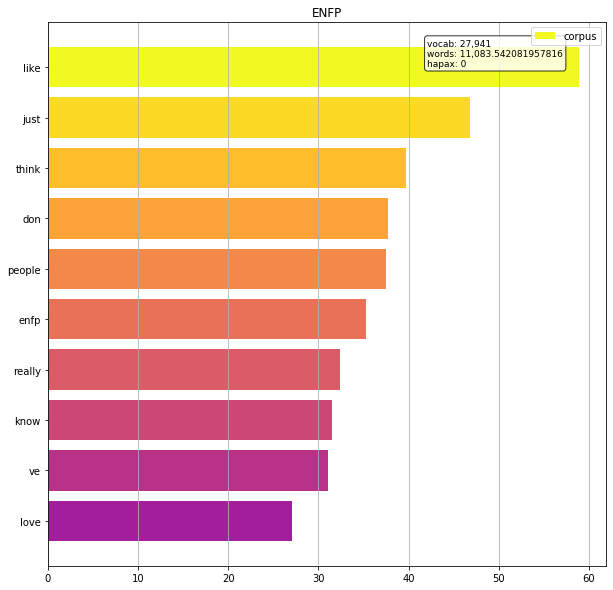

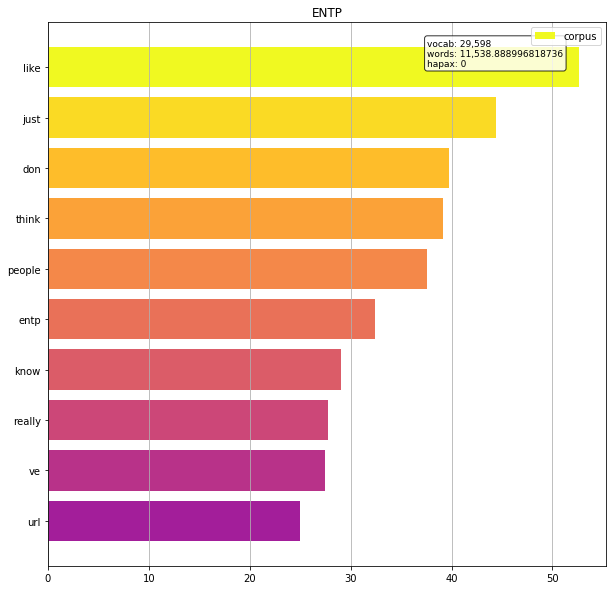

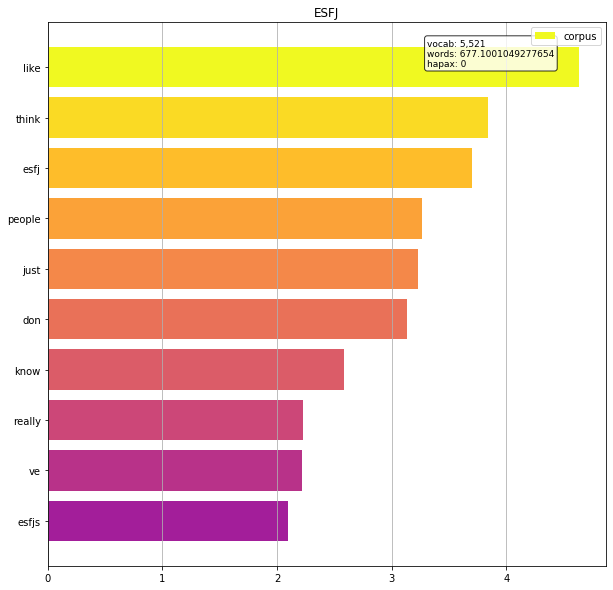

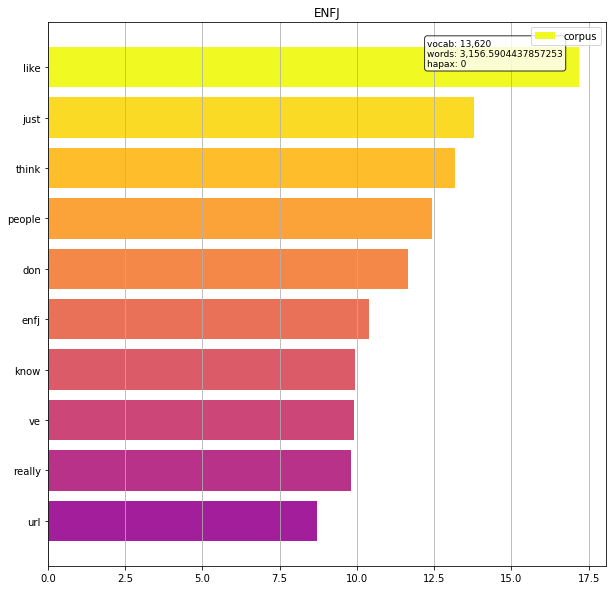

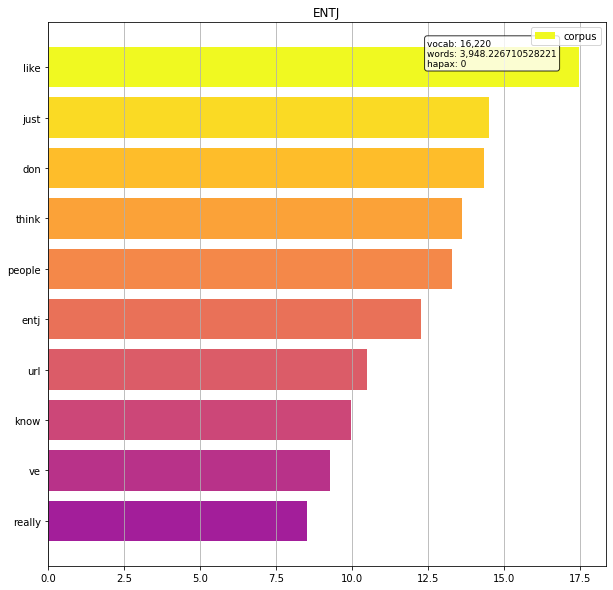

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

def Most_frequent_words_in_Group(types):
    XXX = df['clean_posts'].loc[df["type"] == types].values
    
    from matplotlib import cm

    cnt_srs = df['type'].value_counts()
    viridis = cm.get_cmap('plasma', 15)
    colors = viridis(np.flip(np.linspace(0, 1, 15)))
    
    TfidVect  = tfidf.fit_transform(XXX)
    svd_model = tsvd
    data_revitalised = svd_model.fit_transform(TfidVect)
    plt.figure(figsize = (10,10))

    visualizer = FreqDistVisualizer(features=tfidf.get_feature_names(), orient='h',title =types, color = colors,n=10)
    visualizer.fit(TfidVect)
    #visualizer.title(types)
    visualizer.show()
    
    
    
Most_frequent_words_in_Group('INFJ')
Most_frequent_words_in_Group('ISTJ')
Most_frequent_words_in_Group('ISFJ')
Most_frequent_words_in_Group('INTJ')
Most_frequent_words_in_Group('ISTP')
Most_frequent_words_in_Group('ISFP')
Most_frequent_words_in_Group('INFP')
Most_frequent_words_in_Group('INTP')
Most_frequent_words_in_Group('ESTP')
Most_frequent_words_in_Group('ESFP')
Most_frequent_words_in_Group('ESTJ')
Most_frequent_words_in_Group('ENFP')
Most_frequent_words_in_Group('ENTP')
Most_frequent_words_in_Group('ESFJ')
Most_frequent_words_in_Group('ENFJ')
Most_frequent_words_in_Group('ENTJ')




Analiza tfiDF wskazuje na podobne częstosci wystepywania tych samych słów  w poszczególnych Typach, róznice są znikome

In [44]:
XX = df['clean_posts'].values
yy = df['type'].values

print(XX.shape)
print(yy.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,yy,test_size = 0.1, random_state=42)

tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tsvd = TruncatedSVD(n_components=10)

#Przeprowadzamy Text Mining oraz Skalowanie danych i redukcje wymiarów

TfidVect  = tfidf.fit_transform(X_train)
svd_model = tsvd
data_revitalised_train = svd_model.fit_transform(TfidVect)

TfidVect_test  = tfidf.fit_transform(X_test)
svd_model_test = tsvd
data_revitalised_test = svd_model_test.fit_transform(TfidVect_test)

sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(data_revitalised_train, y_train)


(8675,)
(8675,)


In [45]:
#Best Clssificators:

Classif_res_Automatic_IE = ExtraTreesClassifier(max_leaf_nodes = 128, n_estimators = 1000)
Classif_res_Automatic_IE.fit(X_train_res, y_train_res)

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test, Classif_res_Automatic_IE.predict(data_revitalised_test),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test, Classif_res_Automatic_IE.predict(data_revitalised_test),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test, Classif_res_Automatic_IE.predict(data_revitalised_test),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, Classif_res_Automatic_IE.predict(data_revitalised_test)) ))

R^2: 0.07229514367908668
recall_score: 0.058578348967039284
f1_score: 0.05565869019308111
accuracy_score: 0.10714285714285714


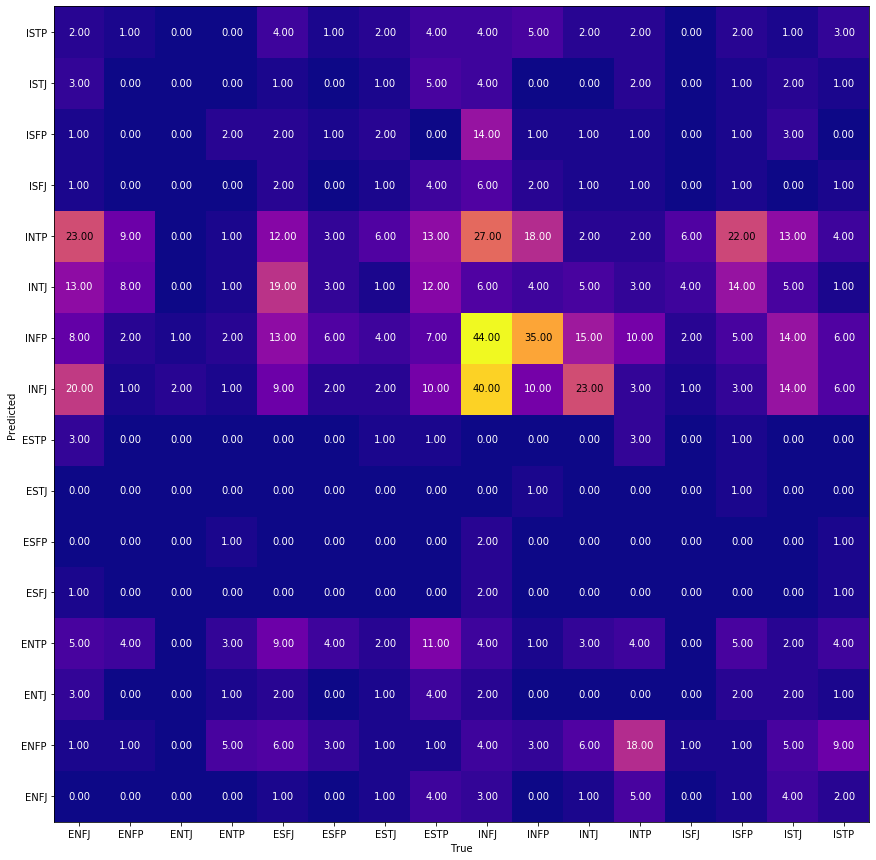

In [46]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test, Classif_res_Automatic_IE.predict(data_revitalised_test))

personality_types = np.unique(y_test)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (15,15))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show() 

Jak widać nie zdaje to Egzaminu:

## Poszczególne Cechy --> Klasyfikacja z Resamplingiem!

    Skoro typy osobowości nie wynikaja emergentnie z cech osobowosci, mozemy je analizować niezależnie. Sprawdźmy na ile uda nam sie zrobic klasyfikator poszczególnych Cech.
    
    Oznaczenia:
    
          Introwersja - 0  Ekstrawersja - 1
          Intuition - 0  Sensing - 1
          Thinking - 0  Feeling - 1
          Judging - 0  Perceiving - 1
          
     Czemu tak? By klasy o mniejszym przydziale były klasą pozytywną, a tym samym zmienić postrzeganie Recall i Precision

In [47]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
df.head(10)

,type,posts,words_per_post,... per Post,http per Post,music per Post,jpg per Post,I per Post,clean_posts,I-E,N-S,T-F,J-P
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.30,0.48,0.02,0.12,0.46,'<URL> <URL> enfp and intj moments <URL> spo...,0,0,1,0
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.38,0.20,0.00,0.02,2.02,'I'm finding the lack of me in these posts ver...,1,0,0,1
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.26,0.10,0.00,0.00,0.98,"'Good one _____ <URL> Of course, to which I...",0,0,0,1
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.52,0.04,0.02,0.00,1.74,"'Dear INTP, I enjoyed our conversation the o...",0,0,0,0
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.42,0.12,0.02,0.04,0.92,'You're fired. That's another silly misconcept...,1,0,0,0
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,29.82,0.78,0.02,0.00,0.00,1.88,'18/37 @.@ Science is not perfect. No scienti...,0,0,0,0
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",26.58,0.74,0.04,0.02,0.00,1.88,"'No, I can't draw on my own nails (haha). Thos...",0,0,1,0
7,INTJ,'I tend to build up a collection of things on ...,24.46,0.56,0.02,0.04,0.00,0.32,'I tend to build up a collection of things on ...,0,0,0,0
8,INFJ,"I'm not sure, that's a good question. The dist...",14.76,0.34,0.46,0.02,0.02,0.98,"I'm not sure, that's a good question. The dist...",0,0,1,0
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,24.66,0.48,0.14,0.02,0.00,0.20,'<URL> I'm in this position where I have to ac...,0,0,0,1


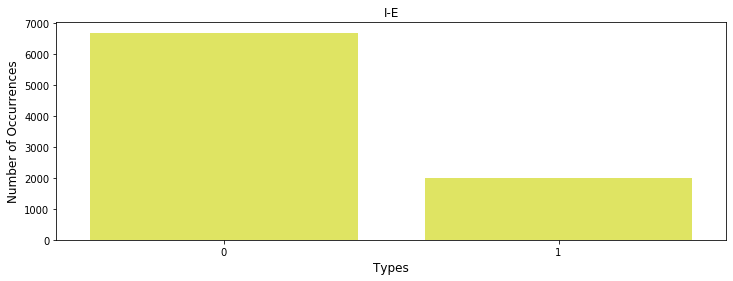

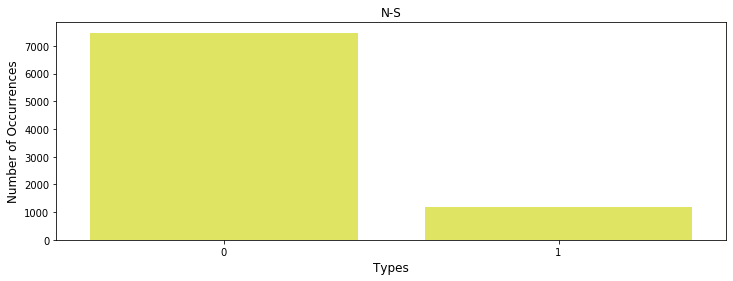

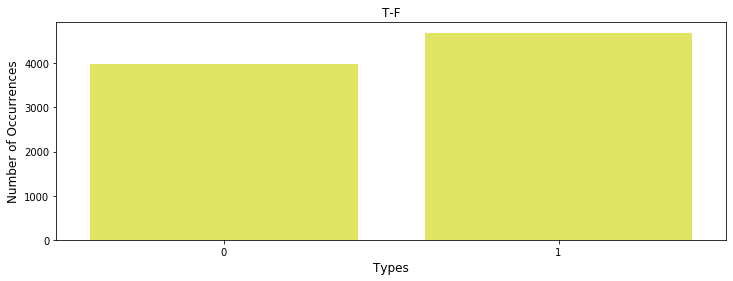

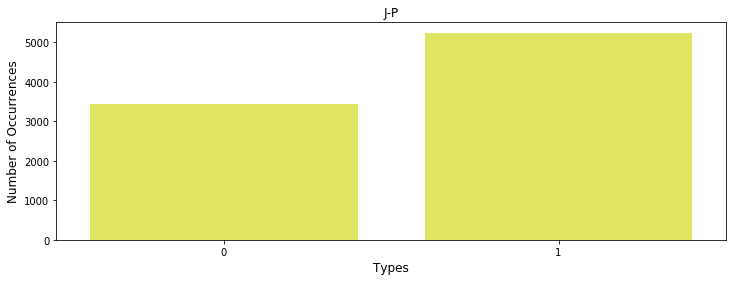

In [48]:
from matplotlib import cm

cnt_srs = df['I-E'].value_counts()
viridis = cm.get_cmap('plasma', 12)
colors = viridis(np.flip(np.linspace(0, 1, 16)))
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8,palette=colors)
plt.title('I-E')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

from matplotlib import cm

cnt_srs = df['N-S'].value_counts()
viridis = cm.get_cmap('plasma', 12)
colors = viridis(np.flip(np.linspace(0, 1, 16)))
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8,palette=colors)
plt.title('N-S')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

from matplotlib import cm

cnt_srs = df['T-F'].value_counts()
viridis = cm.get_cmap('plasma', 12)
colors = viridis(np.flip(np.linspace(0, 1, 16)))
plt.figure(figsize=(12,4))
plt.title('T-F')
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8,palette=colors)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

from matplotlib import cm

cnt_srs = df['J-P'].value_counts()
viridis = cm.get_cmap('plasma', 12)
colors = viridis(np.flip(np.linspace(0, 1, 16)))
plt.figure(figsize=(12,4))
plt.title('J-P')
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8,palette=colors)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

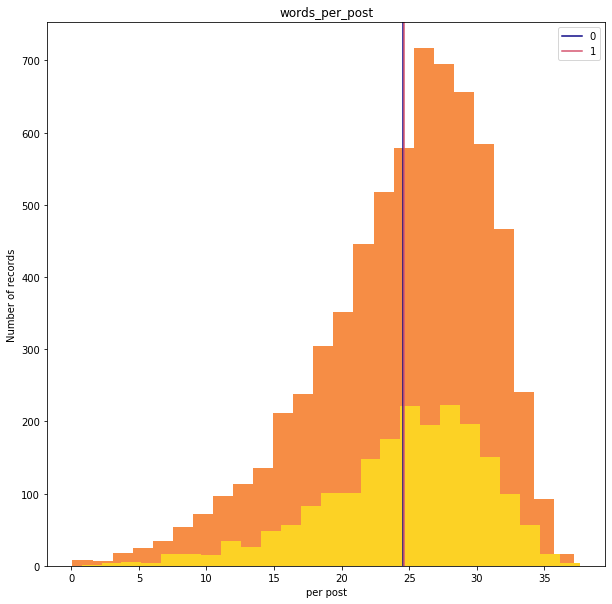

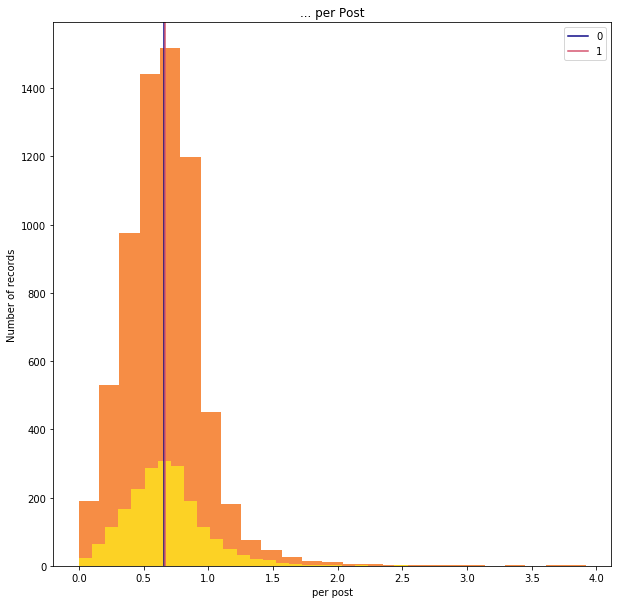

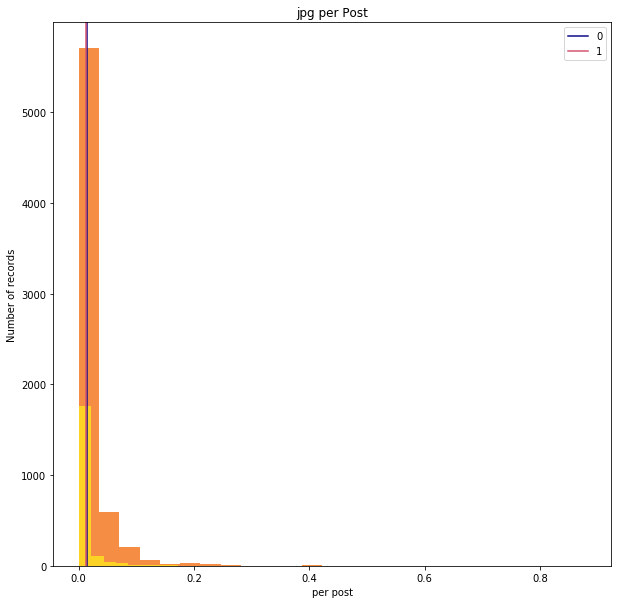

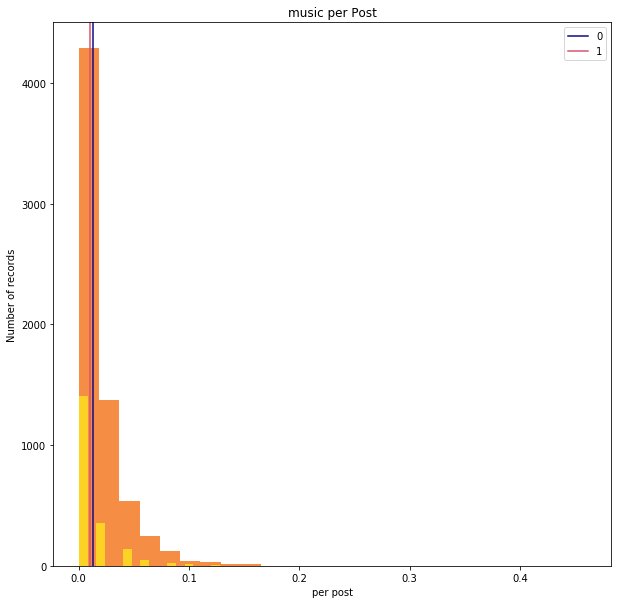

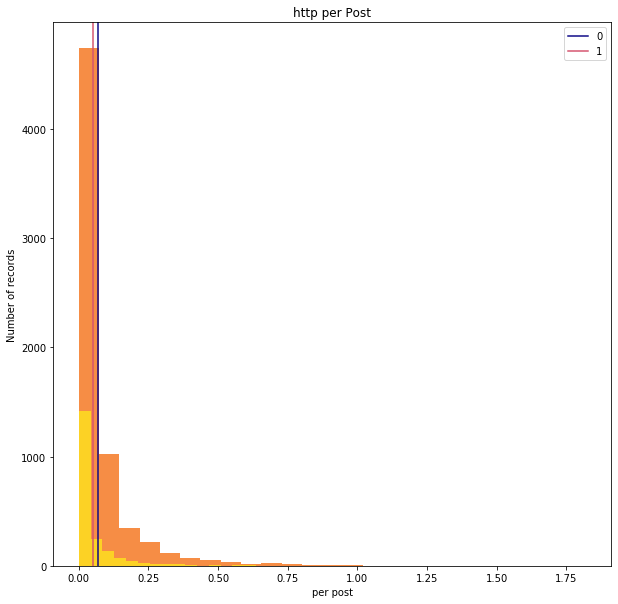

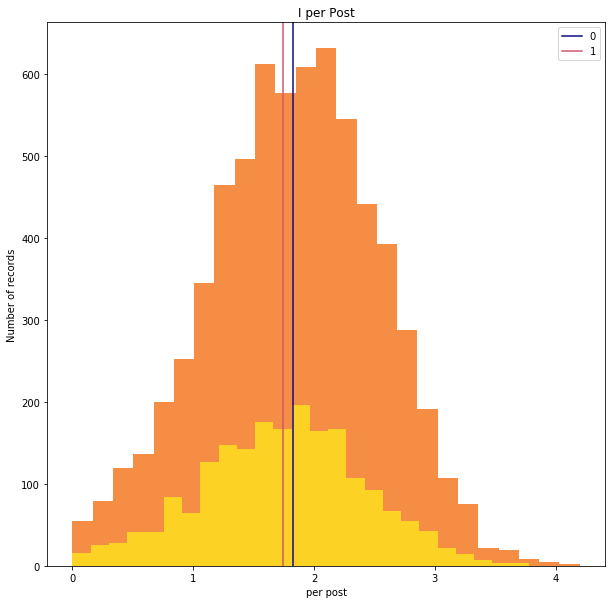

In [49]:
#Wizualizacja Razem --> pokazanie że średnie są niemalże identyczne ==> słaba rozpoznawalność

#Wizualizacja Razem --> pokazanie że średnie są niemalże identyczne ==> słaba rozpoznawalność

def wykres_osobowosci_razem_2(od_czego,do_czego='type'):
    from matplotlib import cm
  
    viridis = cm.get_cmap('plasma', 12)
    colors = viridis(np.linspace(0, 1, 12))
    colors2 = colors[[8,10],:]
    typ_osobow = np.unique(df[do_czego])
    plt.figure(figsize = (10,10))
   # cmap = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    for i in range(len(typ_osobow)):
        if typ_osobow[i] ==0:
            plt.axvline(x=np.mean(df[od_czego].loc[df[do_czego]==typ_osobow[i]]),color=colors[0])
        else:
            plt.axvline(x=np.mean(df[od_czego].loc[df[do_czego]==typ_osobow[i]]),color=colors[6])
    
        plt.hist(df[od_czego].loc[df[do_czego]==typ_osobow[i]],bins=25,color=colors2[i])
        plt.xlabel("per post")
        plt.ylabel("Number of records")

        plt.title(od_czego)
        #print("{}: {}".format(typ_osobow[i],np.mean(df[od_czego].loc[df['type']==typ_osobow[i]])))
    plt.legend(typ_osobow)
    plt.show



wykres_osobowosci_razem_2('words_per_post',do_czego='I-E')
wykres_osobowosci_razem_2('... per Post',do_czego='I-E')
wykres_osobowosci_razem_2('jpg per Post',do_czego='I-E')
wykres_osobowosci_razem_2('music per Post',do_czego='I-E')
wykres_osobowosci_razem_2('http per Post',do_czego='I-E')
wykres_osobowosci_razem_2('I per Post',do_czego='I-E')

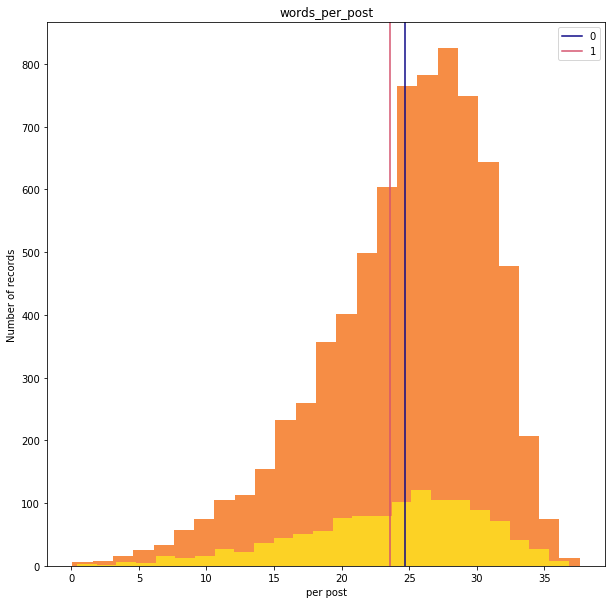

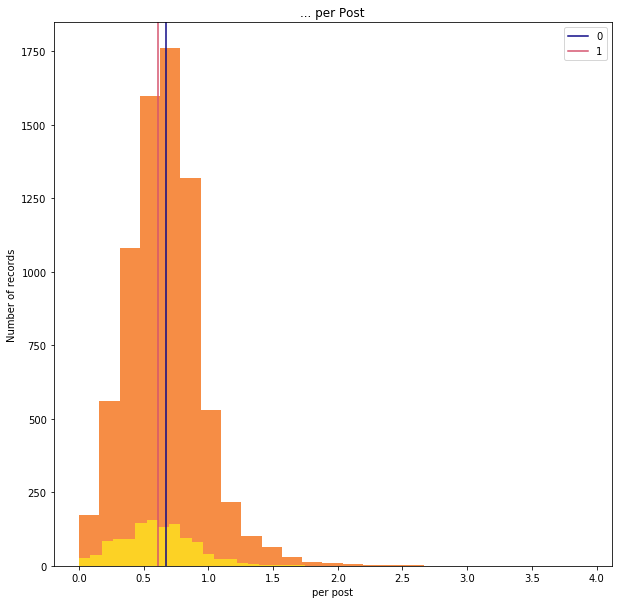

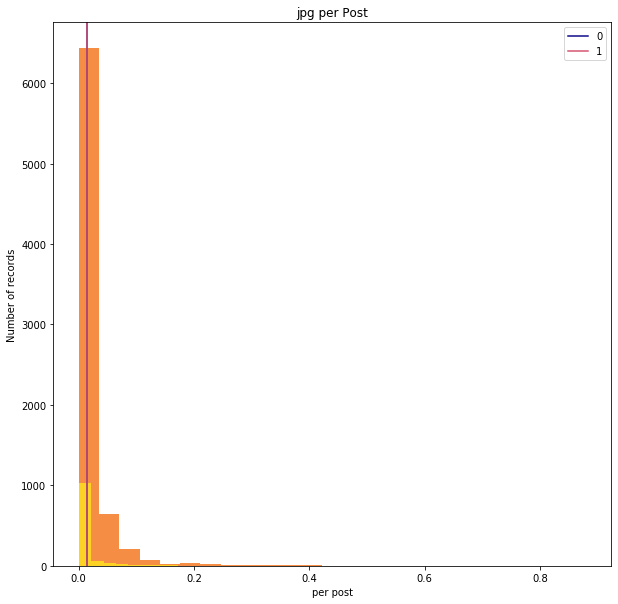

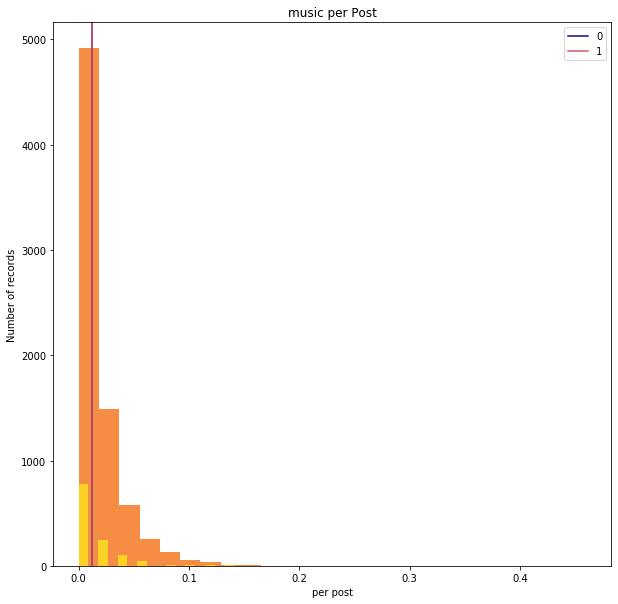

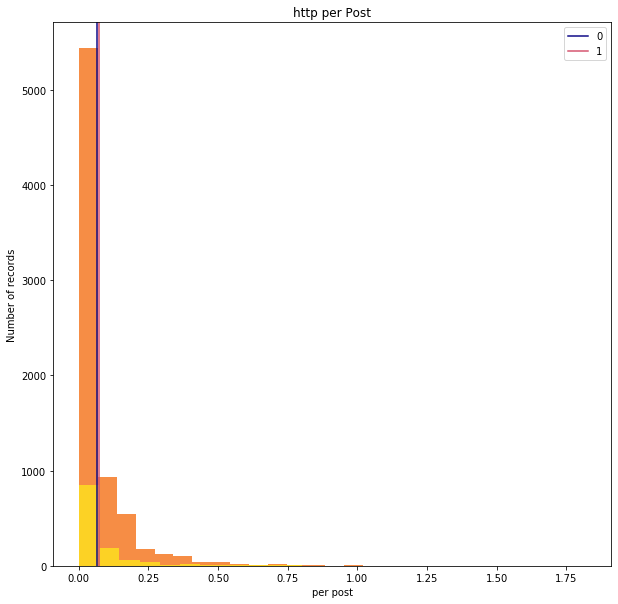

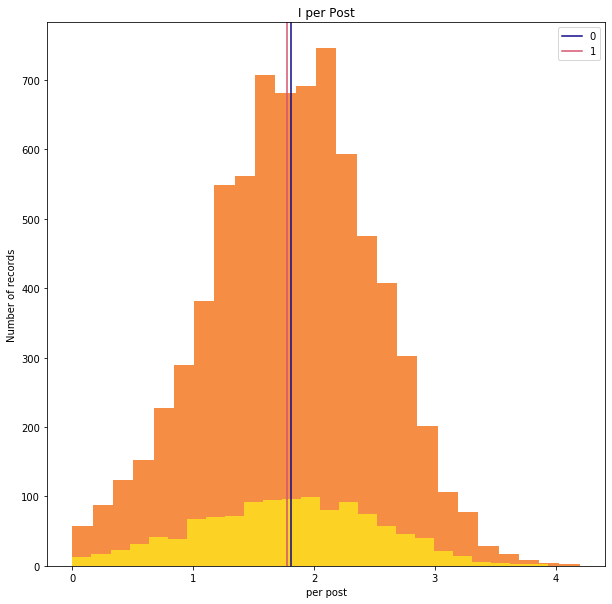

In [50]:
wykres_osobowosci_razem_2('words_per_post',do_czego='N-S')
wykres_osobowosci_razem_2('... per Post',do_czego='N-S')
wykres_osobowosci_razem_2('jpg per Post',do_czego='N-S')
wykres_osobowosci_razem_2('music per Post',do_czego='N-S')
wykres_osobowosci_razem_2('http per Post',do_czego='N-S')
wykres_osobowosci_razem_2('I per Post',do_czego='N-S')

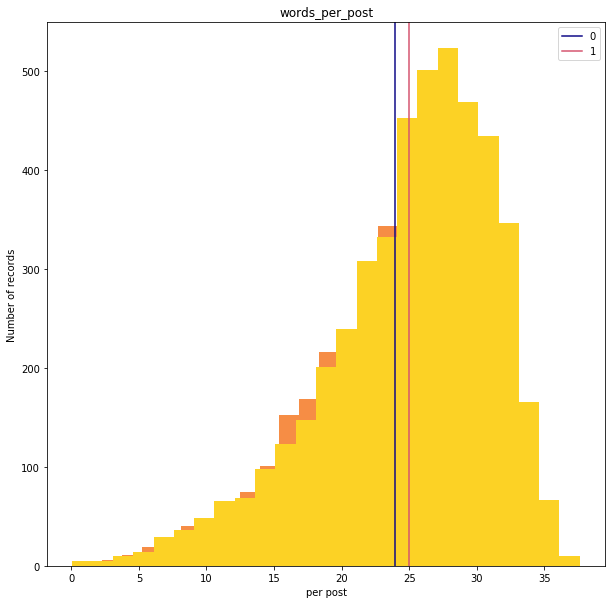

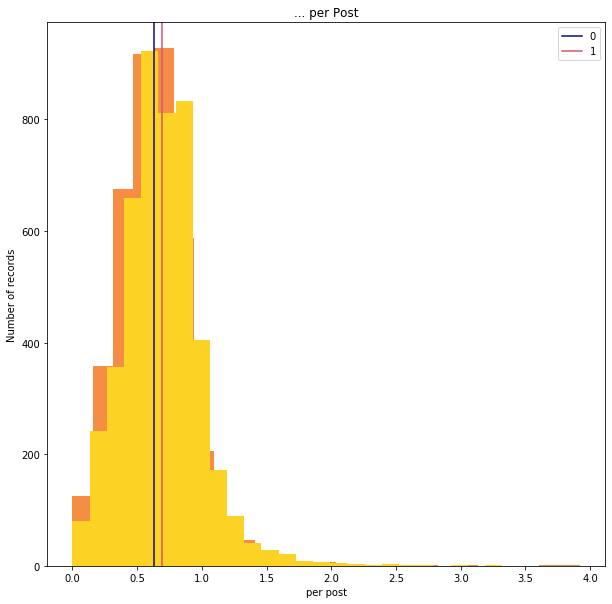

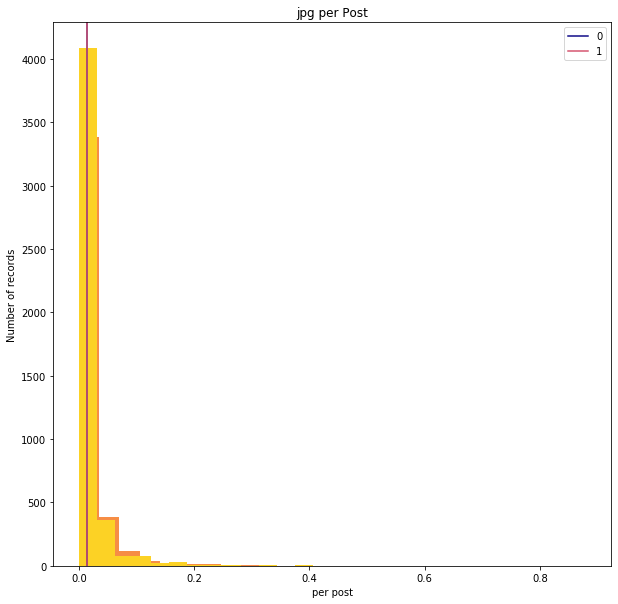

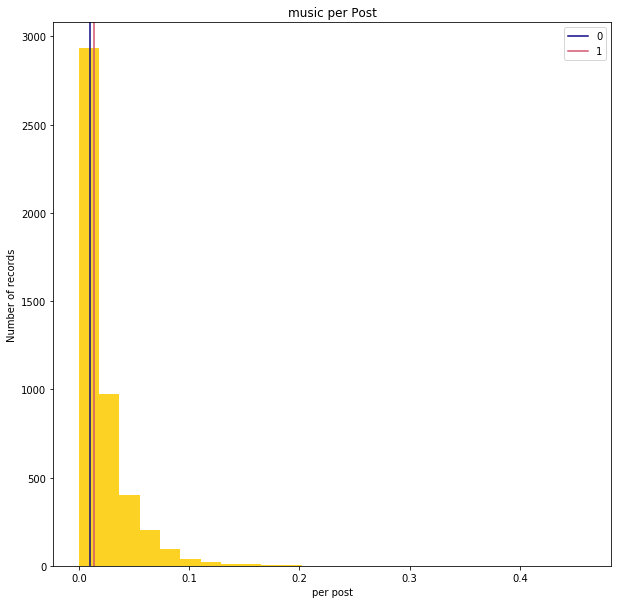

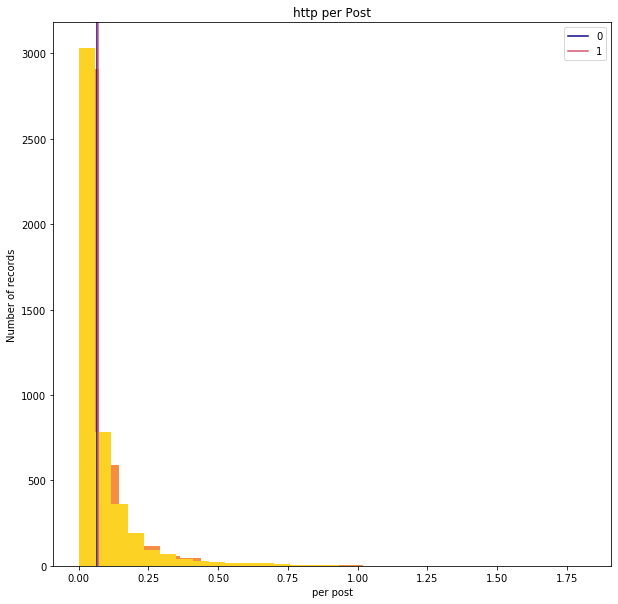

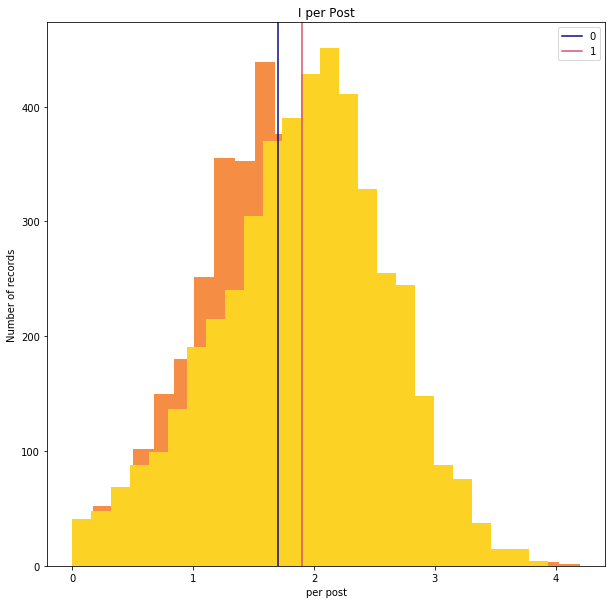

In [51]:
wykres_osobowosci_razem_2('words_per_post',do_czego='T-F')
wykres_osobowosci_razem_2('... per Post',do_czego='T-F')
wykres_osobowosci_razem_2('jpg per Post',do_czego='T-F')
wykres_osobowosci_razem_2('music per Post',do_czego='T-F')
wykres_osobowosci_razem_2('http per Post',do_czego='T-F')
wykres_osobowosci_razem_2('I per Post',do_czego='T-F')

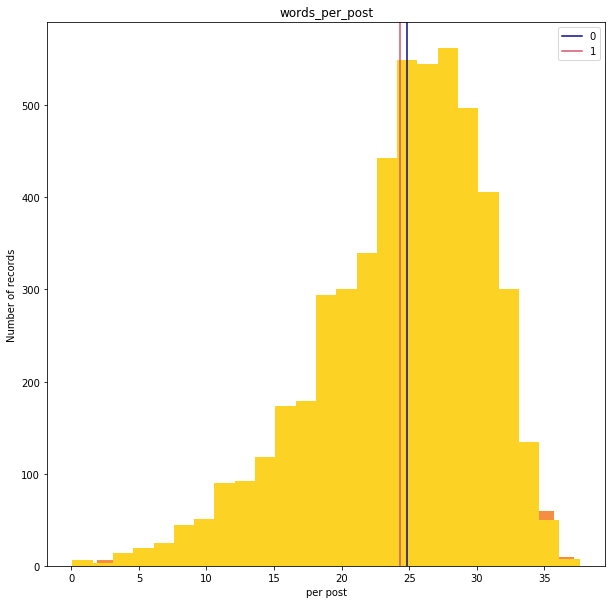

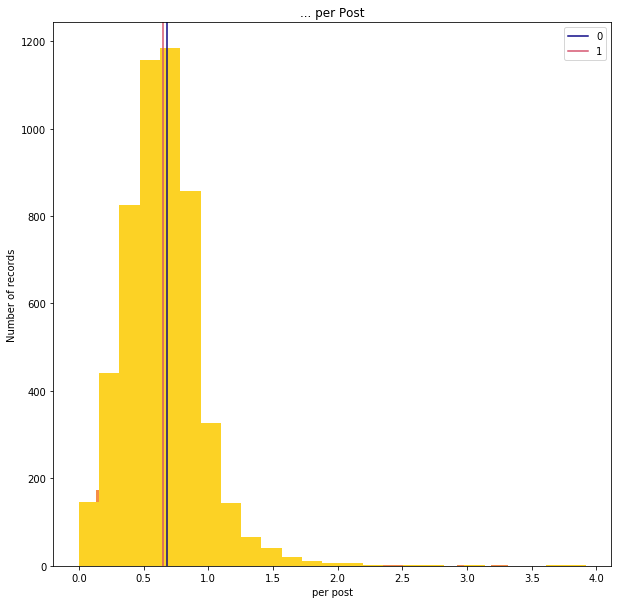

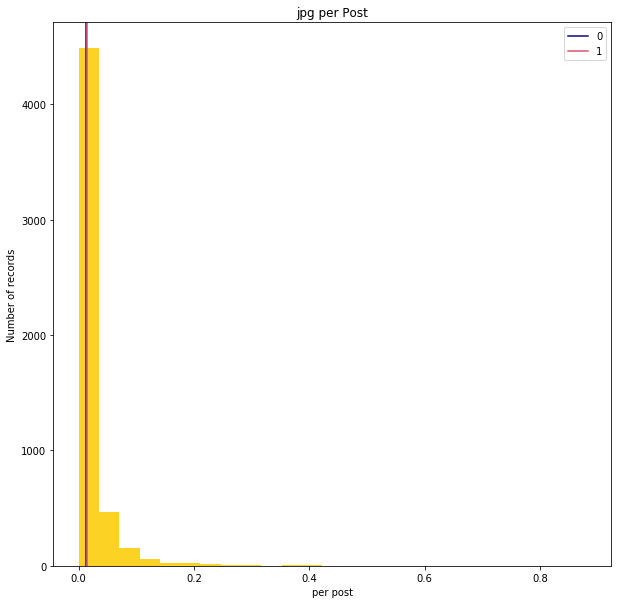

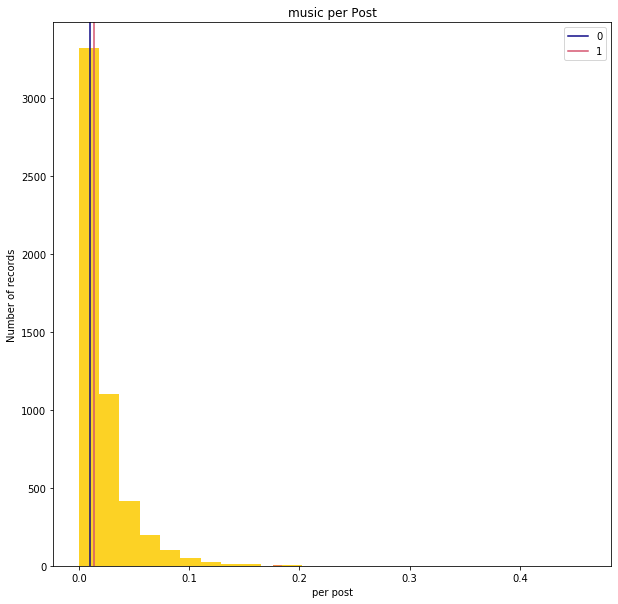

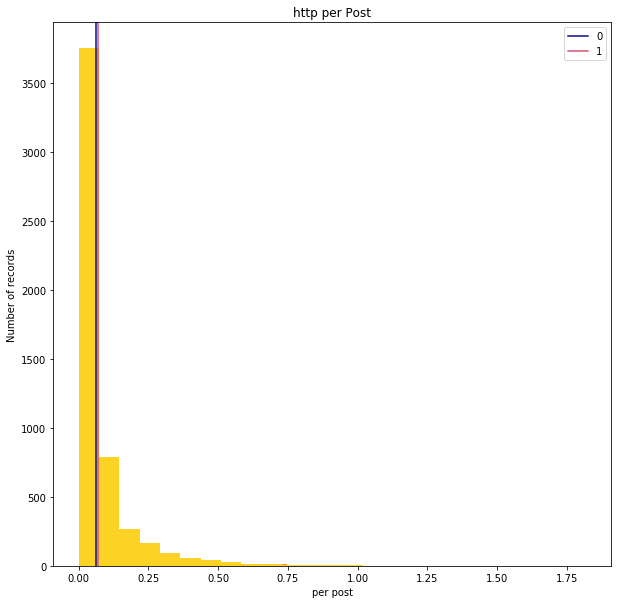

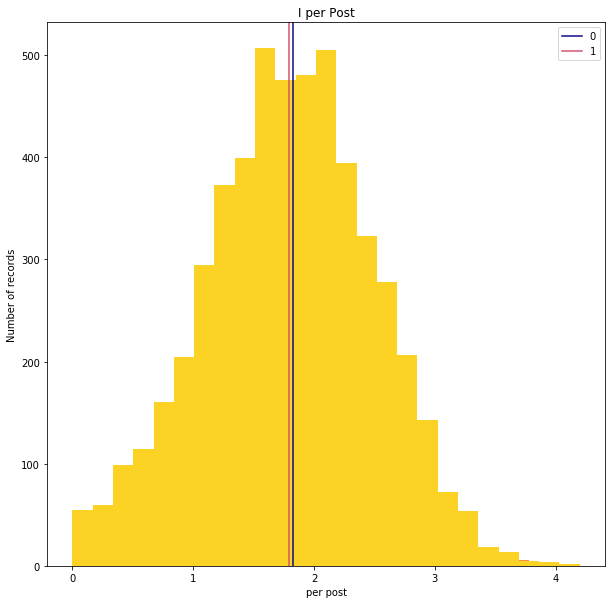

In [52]:
wykres_osobowosci_razem_2('words_per_post',do_czego='J-P')
wykres_osobowosci_razem_2('... per Post',do_czego='J-P')
wykres_osobowosci_razem_2('jpg per Post',do_czego='J-P')
wykres_osobowosci_razem_2('music per Post',do_czego='J-P')
wykres_osobowosci_razem_2('http per Post',do_czego='J-P')
wykres_osobowosci_razem_2('I per Post',do_czego='J-P')

I-E
0: 24.50591372079095
1: 24.588854427213555
N-S
0: 24.679096014977333
1: 23.56250626566416
T-F
0: 23.94178849535291
1: 25.019671921602065
J-P
0: 24.841927781013478
1: 24.317385995039103


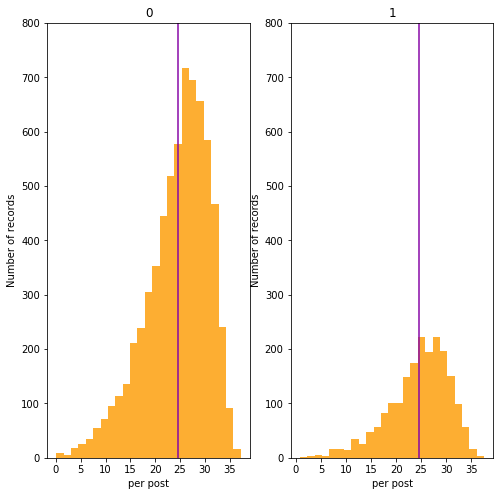

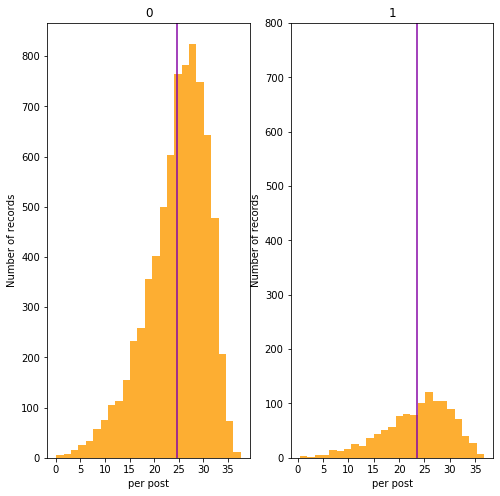

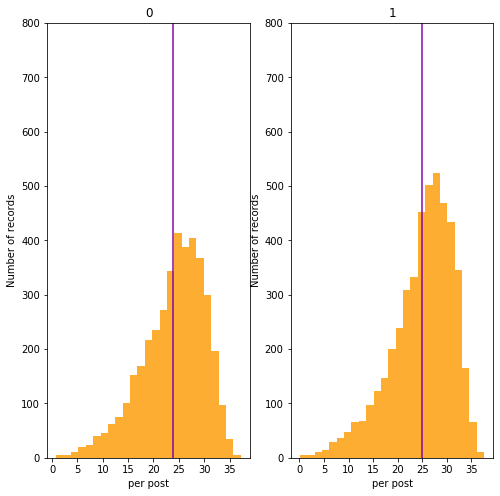

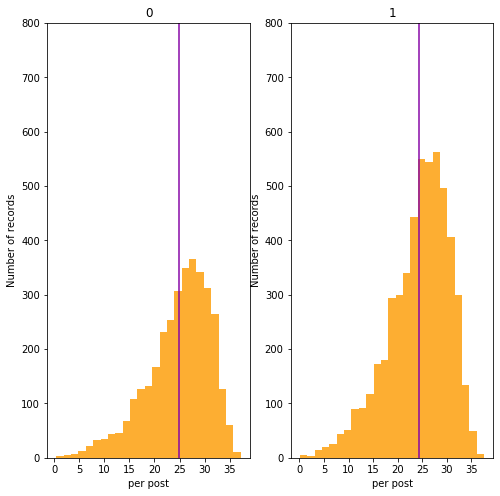

In [53]:
def wykres_osobowosci_rozdzielon(od_czego,do_czego,ticks=(0,5,10,15,20,25,30,35),yticks = [0,100,200,300,400,500,600,700,800]):
    from matplotlib import cm
    viridis = cm.get_cmap('plasma', 12)
    colors = viridis(np.linspace(0, 1, 16))
    typ_osobow = np.unique(df[do_czego])
    print(do_czego)
    fig,axes = plt.subplots(1,2,figsize=(8,8))
    for i,ax in zip(range(len(typ_osobow)),axes.ravel()):
        ax.hist(df[od_czego].loc[df[do_czego]==typ_osobow[i]],bins=25,color=colors[12])
        ax.axvline(x=np.mean(df[od_czego].loc[df[do_czego]==typ_osobow[i]]),color=colors[4])
        ax.set_xticks(ticks)
        ax.set_yticks(yticks)
        ax.set_xlabel("per post")
        ax.set_ylabel("Number of records")
        ax.title.set_text(typ_osobow[i])
        print("{}: {}".format(typ_osobow[i],np.mean(df[od_czego].loc[df[do_czego]==typ_osobow[i]])))
    plt.show

warunki_osobow = ['I-E','N-S','T-F','J-P']        
for j in warunki_osobow:
    wykres_osobowosci_rozdzielon('words_per_post',j)

I-E
0: 0.07072798082684274
1: 0.0505952976488245
N-S
0: 0.06501738432736055
1: 0.07278195488721813
T-F
0: 0.06396885204722495
1: 0.06788666382616158
J-P
0: 0.0629237041351199
1: 0.06816256439610789


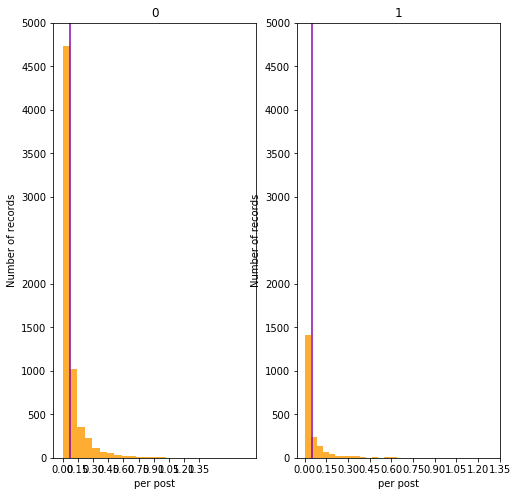

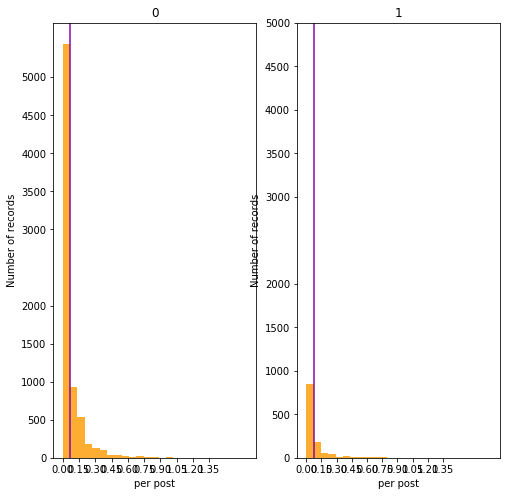

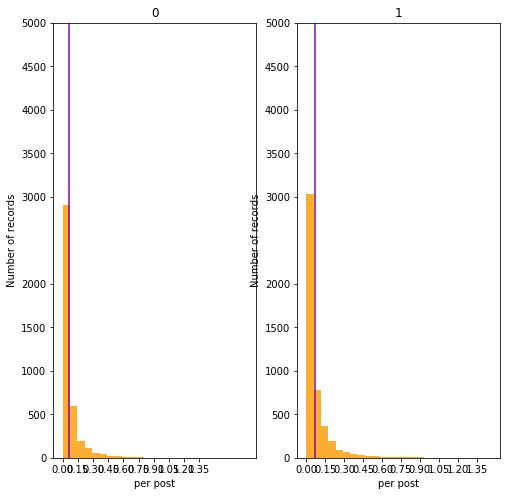

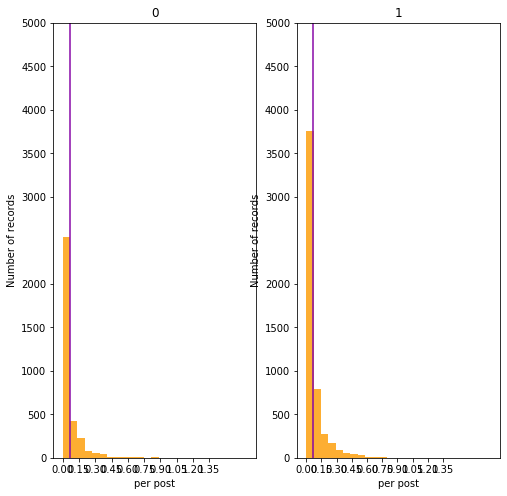

In [54]:
warunki_osobow = ['I-E','N-S','T-F','J-P']        
for j in warunki_osobow:
    wykres_osobowosci_rozdzielon('http per Post',j,ticks = [0,0.15,0.3,0.45,0.6,0.75,0.9,1.05,1.2,1.35],yticks = (0,500,1000,1500,2000,3000,3500,4000,4500,5000))

I-E
0: 0.6609227082085082
1: 0.6677038519259654
N-S
0: 0.6711152714629581
1: 0.6085714285714282
T-F
0: 0.6276262245666917
1: 0.6920494247976133
J-P
0: 0.678893418753641
1: 0.6517344018317107


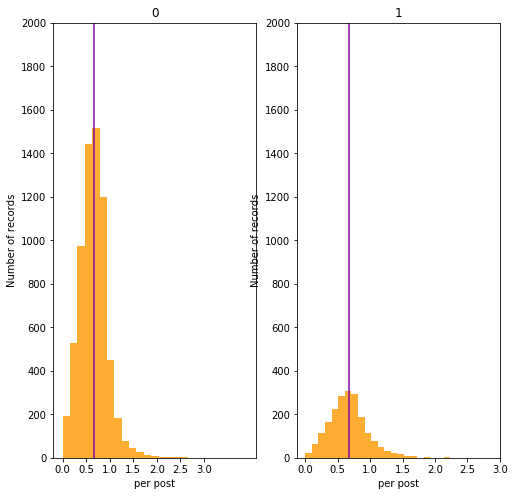

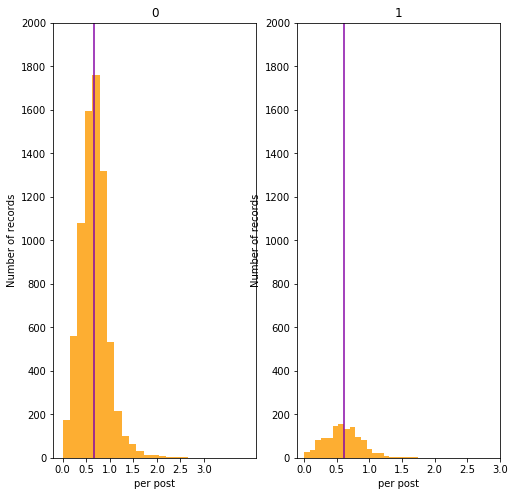

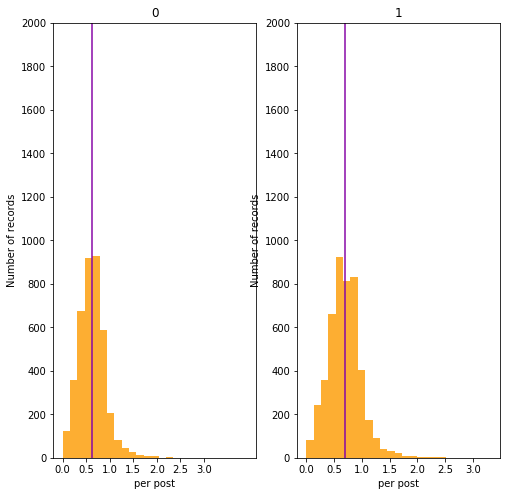

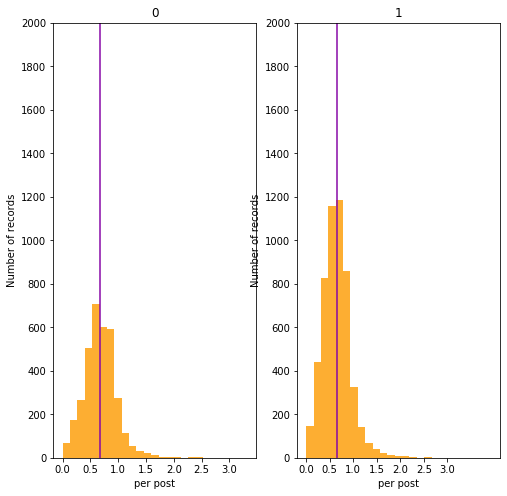

In [55]:
warunki_osobow = ['I-E','N-S','T-F','J-P']        
for j in warunki_osobow:
    wykres_osobowosci_rozdzielon('... per Post',j,ticks=(0.0,0.5,1.0,1.5,2.0,2.5,3.0), yticks = [0,200,400,600,800,1000,1200,1400,1600,1800,2000])

I-E
0: 0.013040742959856327
1: 0.010075037518759277
N-S
0: 0.012377641080502889
1: 0.012230576441102665
T-F
0: 0.010158251695553878
1: 0.0142224115892631
J-P
0: 0.010302853814793162
1: 0.013703491700057394


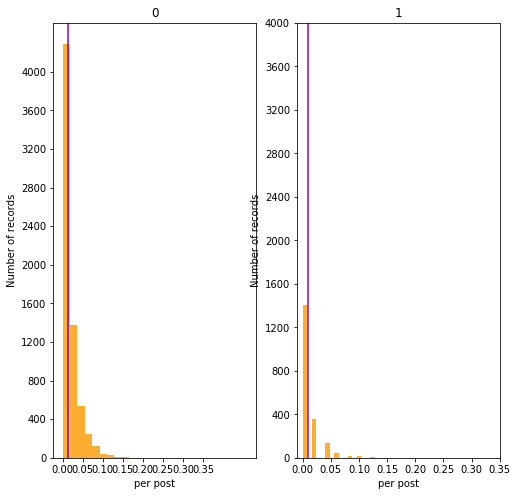

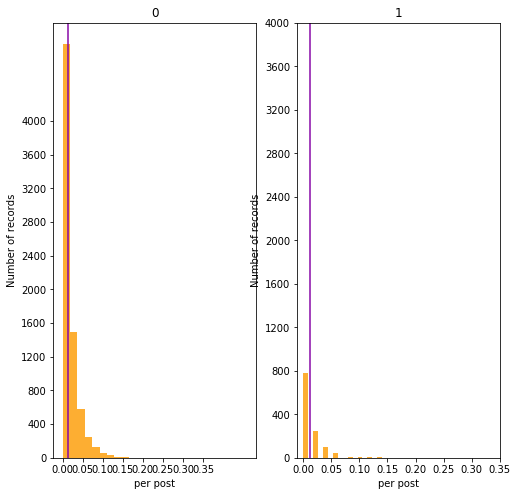

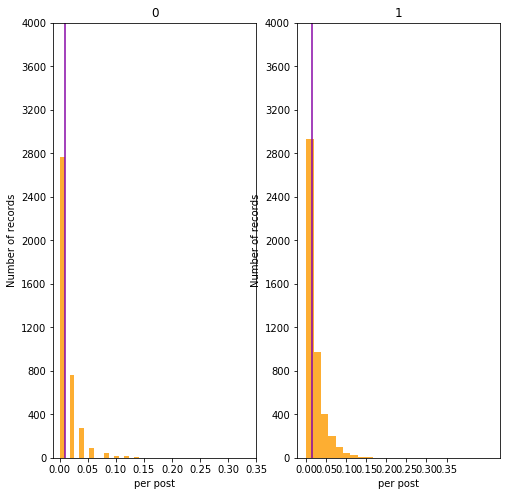

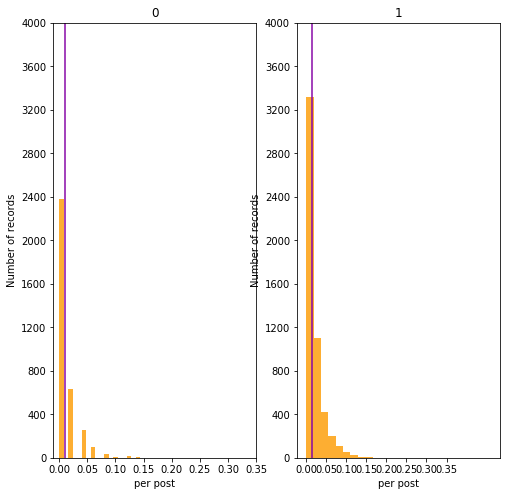

In [56]:
warunki_osobow = ['I-E','N-S','T-F','J-P']        
for j in warunki_osobow:
    wykres_osobowosci_rozdzielon('music per Post',j,ticks=(0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35),yticks = [0,400,800,1200,1600,2000,2400,2800,3200,3600,4000])

I-E
0: 0.014562612342720268
1: 0.011985992996498166
N-S
0: 0.013976999197646492
1: 0.013918128654970692
T-F
0: 0.014508917357447977
1: 0.013510864933958358
J-P
0: 0.013261502620850348
1: 0.014432360236596168


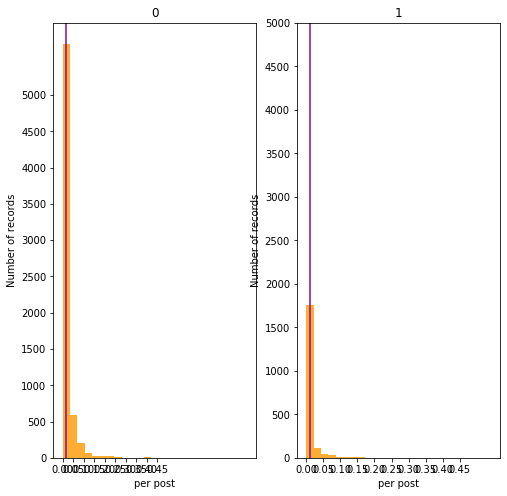

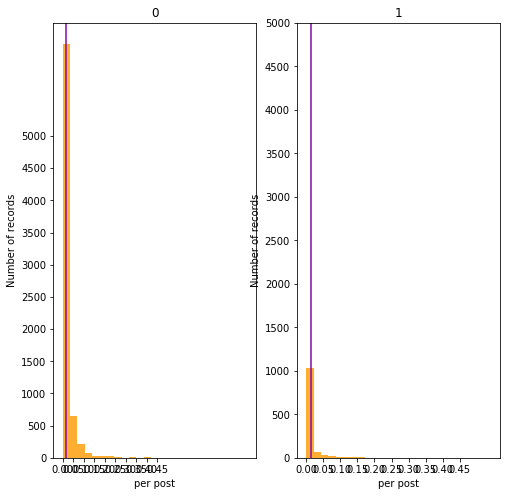

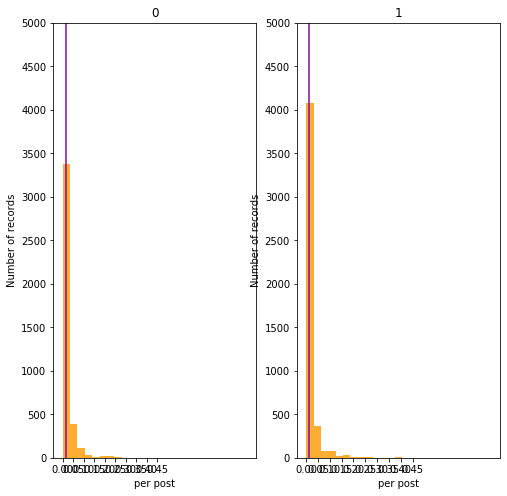

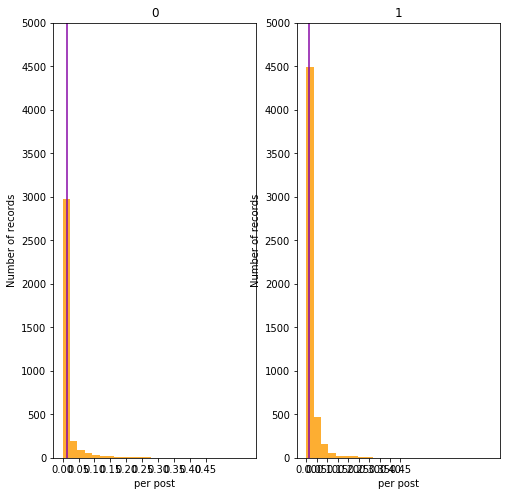

In [57]:
warunki_osobow = ['I-E','N-S','T-F','J-P']        
for j in warunki_osobow:
    wykres_osobowosci_rozdzielon('jpg per Post',j,ticks=(0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45),yticks = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])

I-E
0: 1.8272019173157534
1: 1.7394697348674293
N-S
0: 1.811963091735753
1: 1.7758897243107783
T-F
0: 1.700648078372273
1: 1.8971708564124379
J-P
0: 1.8292195690157196
1: 1.7924174775806108


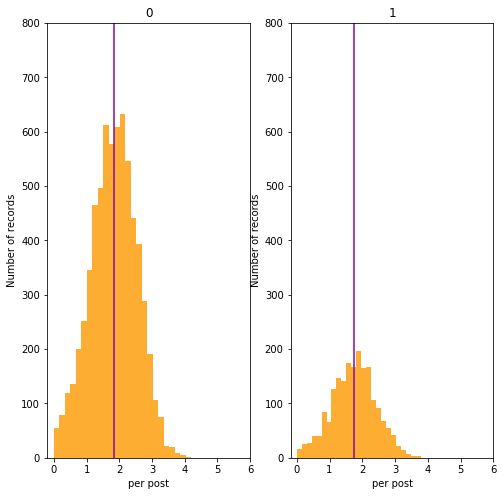

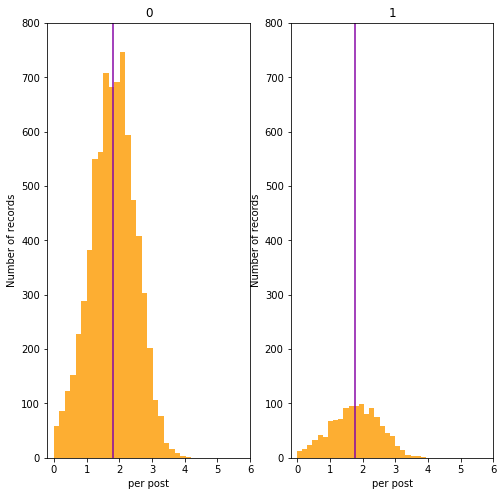

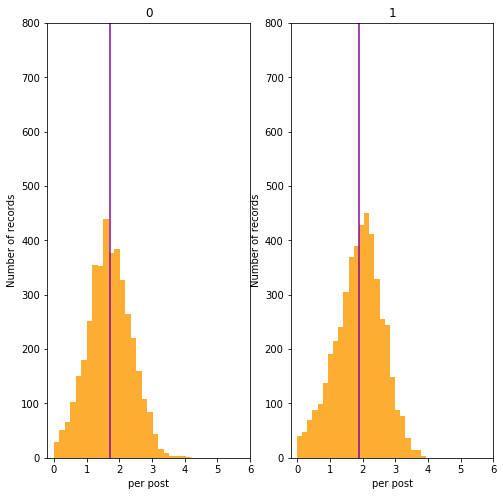

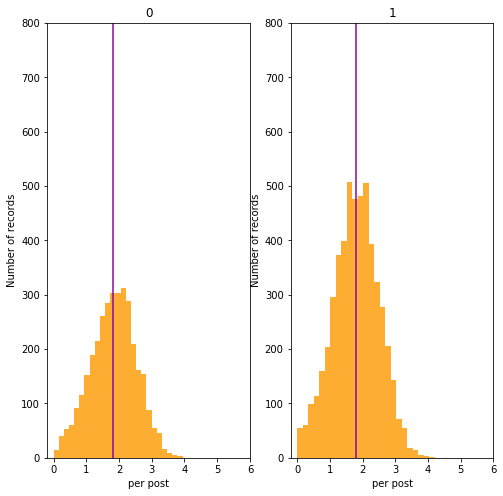

In [58]:
warunki_osobow = ['I-E','N-S','T-F','J-P']        
for j in warunki_osobow:
    wykres_osobowosci_rozdzielon('I per Post',j,ticks=(0.0,1,2,3,4,5,6))

Zobaczmy jeszcze jak wygląda ilość słów w poszczególnych grupach

I-E


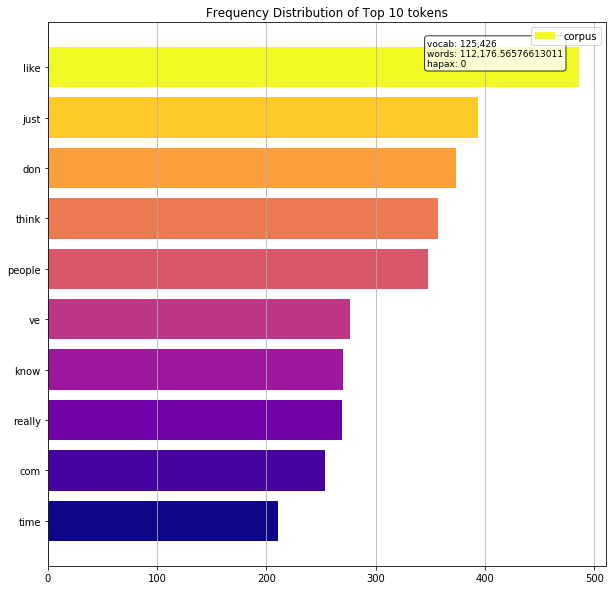

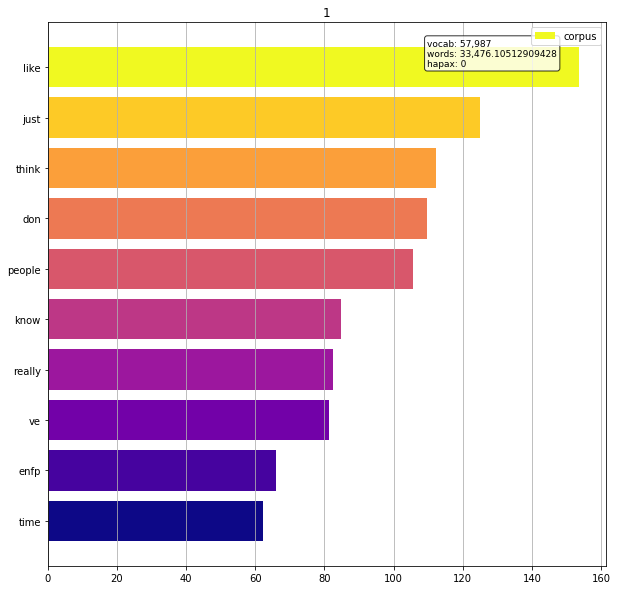

N-S


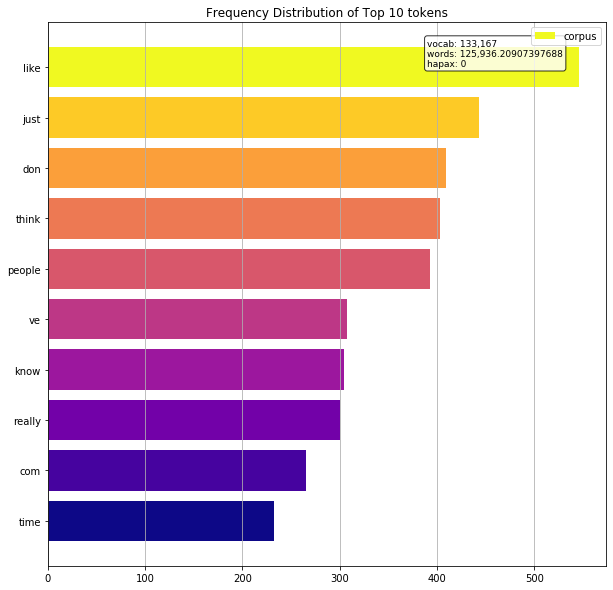

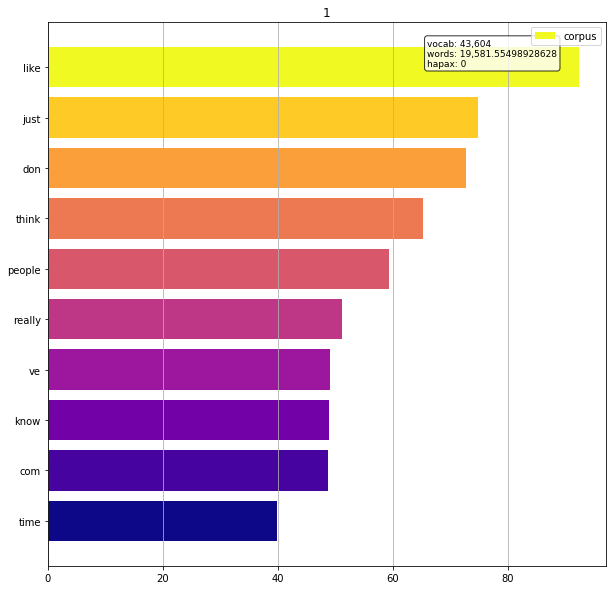

T-F


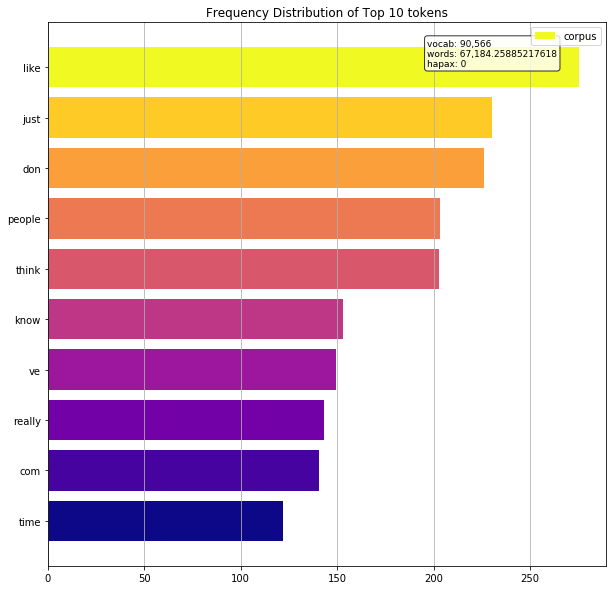

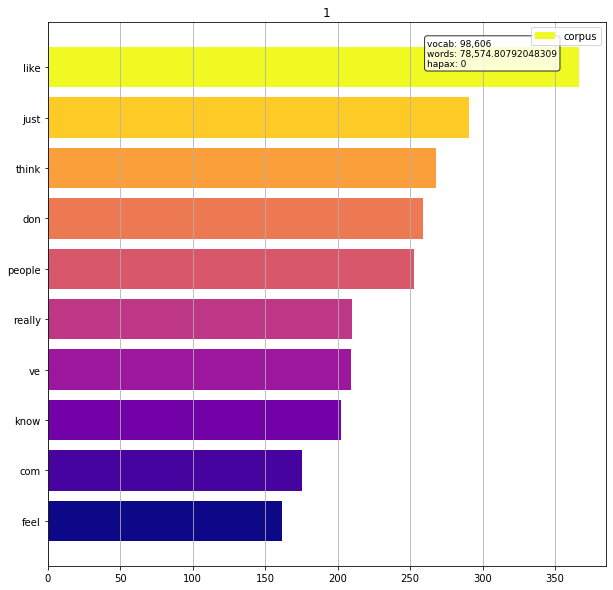

J-P


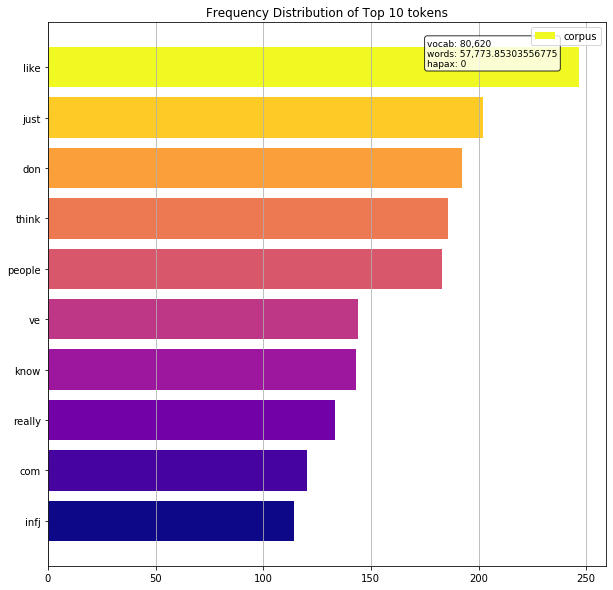

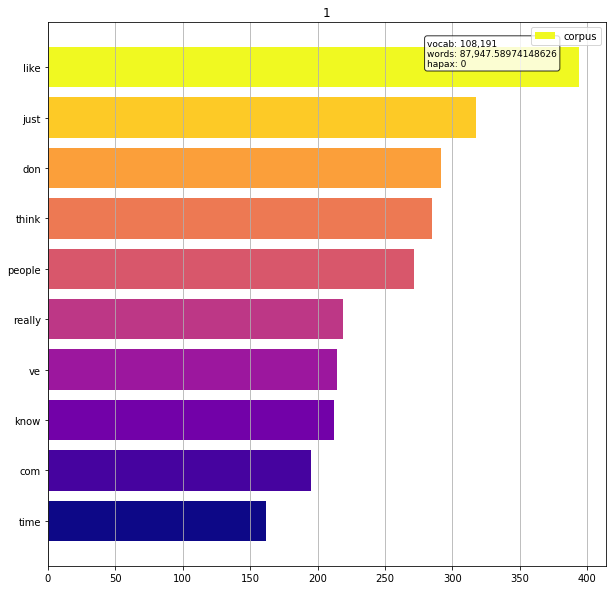

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

def Most_frequent_words_in_Group(types,pyte='type'):
    XXX = df['posts'].loc[df[pyte] == types].values

    from matplotlib import cm

    cnt_srs = df['type'].value_counts()
    viridis = cm.get_cmap('plasma', 10)
    colors = viridis(np.flip(np.linspace(0, 1, 10)))
    
    
    TfidVect  = tfidf.fit_transform(XXX)
    svd_model = tsvd
    data_revitalised = svd_model.fit_transform(TfidVect)
    plt.figure(figsize = (10,10))
    visualizer = FreqDistVisualizer(features=tfidf.get_feature_names(), orient='h',title =types, color = colors,n=10)
    visualizer.fit(TfidVect)
    #visualizer.title(types)
    visualizer.show()
    
    
print('I-E')    
Most_frequent_words_in_Group(0,pyte = 'I-E')
Most_frequent_words_in_Group(1,'I-E')
print('N-S')  
Most_frequent_words_in_Group(0,'N-S')
Most_frequent_words_in_Group(1,'N-S')
print('T-F')  
Most_frequent_words_in_Group(0,'T-F')
Most_frequent_words_in_Group(1,'T-F')
print('J-P')  
Most_frequent_words_in_Group(0,'J-P')
Most_frequent_words_in_Group(1,'J-P')

**PCA - okazało się zbędne** -- Przeprowdzono również PCA dla każdego z modeli, niestety rezultaty okazały się gorsze

### Klasyfikacja I-E 

In [60]:
#Czyścimy zbiór Danych z  niepotrzebnych linków itp.

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

from bs4 import BeautifulSoup
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    return text
df['clean_posts'] = df['posts'].apply(cleanText)


In [61]:
XX = df['clean_posts'].values
yy = df['I-E'].values

print(XX.shape)
print(yy.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,yy,test_size = 0.1, random_state=42)

#Przeprowadzamy Text Mining oraz Skalowanie danych i redukcje wymiarów

tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tsvd = TruncatedSVD(n_components=10)

TfidVect  = tfidf.fit_transform(X_train)
svd_model = tsvd
data_revitalised = svd_model.fit_transform(TfidVect)

TfidVect_test  = tfidf.fit_transform(X_test)
svd_model_test = tsvd
data_revitalised_test = svd_model_test.fit_transform(TfidVect_test)


sm = SMOTE()
X_train_res_aut, y_train_res_aut = sm.fit_sample(data_revitalised, y_train)


(8675,)
(8675,)


#####  Klasyfikator 1 --> SVC

In [62]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

svmIE = SVC(kernel = 'rbf', C = 1, gamma = 100,probability = True)
svmIE.fit(X_train_res_aut,y_train_res_aut)




SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

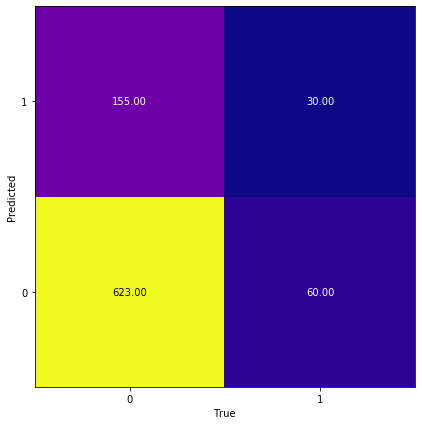

In [63]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics


array =metrics.confusion_matrix(y_test, svmIE.predict(data_revitalised_test))

personality_types = np.unique(y_test)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()

In [64]:
from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test, svmIE.predict(data_revitalised_test),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test, svmIE.predict(data_revitalised_test),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test, svmIE.predict(data_revitalised_test),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test, svmIE.predict(data_revitalised_test),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, svmIE.predict(data_revitalised_test)) ))

R^2: 0.5670522707797772
precision: 0.5371572157809347
recall_score: 0.5371572157809347
f1_score: 0.5355111691867339
accuracy_score: 0.7523041474654378


Average precision-recall score: 0.26


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.26')

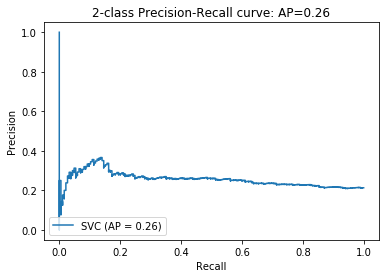

In [65]:
y_score = svmIE.decision_function(data_revitalised_test)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(svmIE, data_revitalised_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#####  Klasyfikator 2 --> Extra Trees Classifier

In [66]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

RNDIE = ExtraTreesClassifier(max_leaf_nodes = 64, n_estimators =1000)
RNDIE.fit(X_train_res_aut,y_train_res_aut)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=64, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

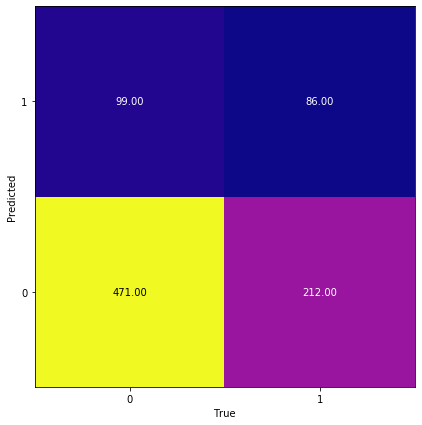

In [67]:
from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test, RNDIE.predict(data_revitalised_test))

personality_types = np.unique(y_test)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()

In [68]:
from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test, RNDIE.predict(data_revitalised_test),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test, RNDIE.predict(data_revitalised_test),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test, RNDIE.predict(data_revitalised_test),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test, RNDIE.predict(data_revitalised_test),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, RNDIE.predict(data_revitalised_test)) ))

R^2: 0.557453196750265
precision: 0.5772347750385818
recall_score: 0.5772347750385818
f1_score: 0.5539516753993314
accuracy_score: 0.6417050691244239


#####  Klasyfikator 3 (Najlepszy) --> Voting Obu

In [69]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

voting_clf_IE = VotingClassifier(
    estimators=[('lr', svmIE), ('svc', RNDIE)], voting='soft')
voting_clf_IE.fit(X_train_res_aut, y_train_res_aut)

VotingClassifier(estimators=[('lr',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=100, kernel='rbf', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('svc',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=64,
            

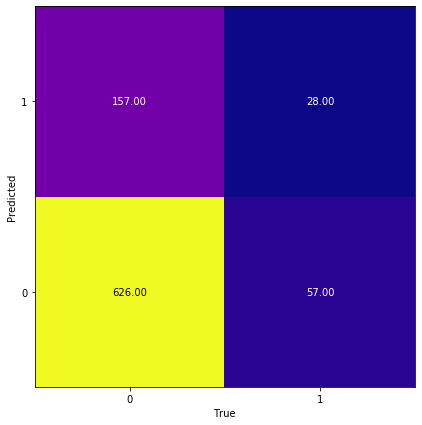

In [70]:

from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test, voting_clf_IE.predict(data_revitalised_test))

personality_types = np.unique(y_test)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()

In [71]:
print("R^2: {}".format(metrics.precision_score(y_test, voting_clf_IE.predict(data_revitalised_test),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test, voting_clf_IE.predict(data_revitalised_test),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test, voting_clf_IE.predict(data_revitalised_test),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test, voting_clf_IE.predict(data_revitalised_test),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, voting_clf_IE.predict(data_revitalised_test)) ))

R^2: 0.5644504545113065
precision: 0.5339480036405366
recall_score: 0.5339480036405366
f1_score: 0.5307159820120256
accuracy_score: 0.7534562211981567


In [72]:
from sklearn import metrics

R2 = []
Precision = []
Recall = []
F1 = []
Accuracy = []

R2.append(metrics.precision_score(y_test, voting_clf_IE.predict(data_revitalised_test),average='macro'))
Precision.append(metrics.recall_score(y_test, voting_clf_IE.predict(data_revitalised_test),average='macro'))
Recall.append( metrics.recall_score(y_test, voting_clf_IE.predict(data_revitalised_test),average='macro'))
F1.append(metrics.f1_score(y_test, voting_clf_IE.predict(data_revitalised_test),average='macro'))
Accuracy.append(metrics.accuracy_score(y_test, voting_clf_IE.predict(data_revitalised_test)))

In [73]:
import pandas as pd
d = {'precision_score': Precision, 
     'recall_score': Recall, 
     'f1_score': F1,
     'accuracy_score' : Accuracy,
     'R2_score': R2
    }
df_wyniki = pd.DataFrame(data=d)
df_wyniki.insert(loc=0, column='Method', value=['IE'])
df_wyniki

,Method,precision_score,recall_score,f1_score,accuracy_score,R2_score
0,IE,0.533948,0.533948,0.530716,0.753456,0.56445


### Klasyfikacja N-S z Resamplingiem

In [74]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2


XX = df.drop(['type','posts','I-E','N-S','T-F','J-P','clean_posts'], axis=1).values
yy = df['N-S'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,yy,test_size = 0.1, random_state=42)

sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#####  Klasyfikator 1 --> SVC

In [75]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

svmNS2 = SVC(kernel = 'rbf', C =10, gamma = 100,probability = True)
svmNS2.fit(X_train_res,y_train_res)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

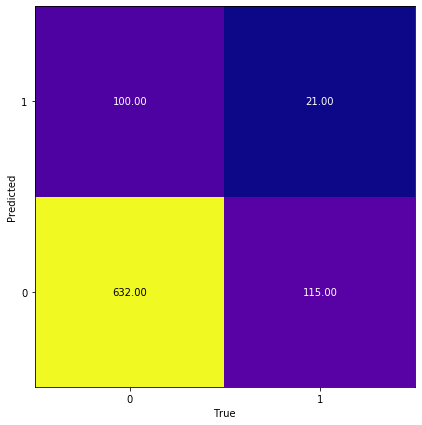

In [76]:

from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test, svmNS2.predict(X_test))

personality_types = np.unique(y_test)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()

In [77]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test, svmNS2.predict(X_test),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test, svmNS2.predict(X_test),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test, svmNS2.predict(X_test),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test, svmNS2.predict(X_test),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, svmNS2.predict(X_test)) ))

R^2: 0.5088998714239794
precision: 0.50980229457776
recall_score: 0.50980229457776
f1_score: 0.5090278161445714
accuracy_score: 0.7523041474654378


Average precision-recall score: 0.16


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.16')

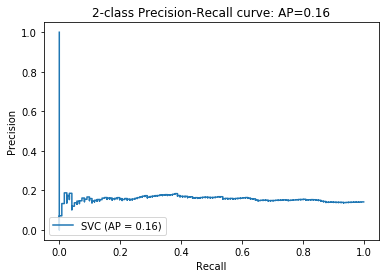

In [78]:
y_score = svmNS2.decision_function(X_test)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(svmNS2, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#####  Klasyfikator 2--> Extra Trees Classifier

In [79]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

RNDNS = ExtraTreesClassifier(max_leaf_nodes = 64, n_estimators =1000)
RNDNS.fit(X_train_res,y_train_res)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=64, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

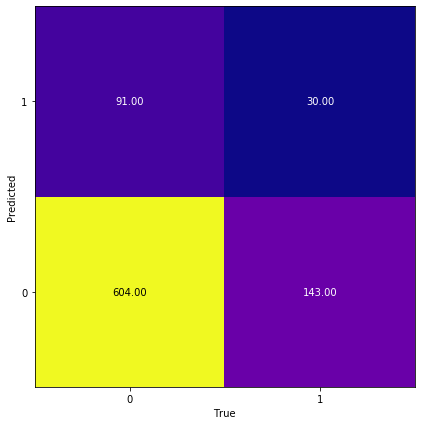

In [80]:

from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test, RNDNS.predict(X_test))

personality_types = np.unique(y_test)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()


In [81]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test, RNDNS.predict(X_test),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test, RNDNS.predict(X_test),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test, RNDNS.predict(X_test),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test, RNDNS.predict(X_test),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, RNDNS.predict(X_test)) ))

R^2: 0.5212375764128582
precision: 0.5282507440229236
recall_score: 0.5282507440229236
f1_score: 0.5209035070338816
accuracy_score: 0.7304147465437788


#####  Klasyfikator 3 (Najlepszy) --> Voting

In [82]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

voting_clf = VotingClassifier(
    estimators=[('lr', svmNS2), ('svc', RNDNS)], voting='soft')
voting_clf.fit(X_train_res, y_train_res)



VotingClassifier(estimators=[('lr',
                              SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=100, kernel='rbf', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('svc',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=64,
           

In [83]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test, voting_clf.predict(X_test),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test, voting_clf.predict(X_test),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test, voting_clf.predict(X_test),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test, voting_clf.predict(X_test),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, voting_clf.predict(X_test)) ))

R^2: 0.5094704524301652
precision: 0.5086682819431998
recall_score: 0.5086682819431998
f1_score: 0.5088400023096021
accuracy_score: 0.7741935483870968


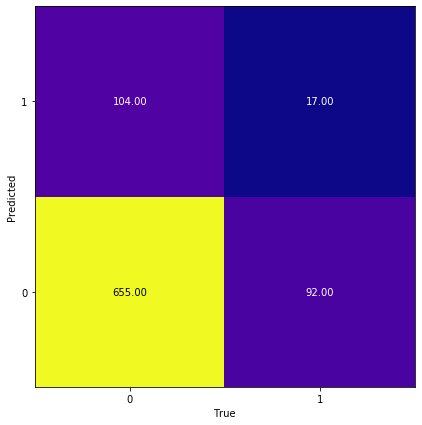

In [84]:

from sklearn import metrics

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test, voting_clf.predict(X_test))

personality_types = np.unique(y_test)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show() 

In [85]:

R2.append(metrics.precision_score(y_test, voting_clf.predict(X_test),average='macro'))
Precision.append(metrics.recall_score(y_test, voting_clf.predict(X_test),average='macro'))
Recall.append( metrics.recall_score(y_test, voting_clf.predict(X_test),average='macro'))
F1.append(metrics.f1_score(y_test, voting_clf.predict(X_test),average='macro'))
Accuracy.append(metrics.accuracy_score(y_test, voting_clf.predict(X_test)))

import pandas as pd
d = {'precision_score': Precision, 
     'recall_score': Recall, 
     'f1_score': F1,
     'accuracy_score' : Accuracy,
     'R2_score': R2
    }
df_wyniki = pd.DataFrame(data=d)
df_wyniki.insert(loc=0, column='Method', value=['IE','NS'])
df_wyniki

,Method,precision_score,recall_score,f1_score,accuracy_score,R2_score
0,IE,0.533948,0.533948,0.530716,0.753456,0.56445
1,NS,0.508668,0.508668,0.508840,0.774194,0.50947


### Klasyfikacja T-F z Resamplingiem

In [86]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

XX = df.drop(['type','posts','I-E','N-S','T-F','J-P','clean_posts'], axis=1).values
yy = df['T-F'].values

from sklearn.model_selection import train_test_split
X_train,X_test_norm,y_train,y_test_norm=train_test_split(XX,yy,test_size = 0.1, random_state=42)

sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#####  Klasyfikator 1 --> Regresja Logistyczna

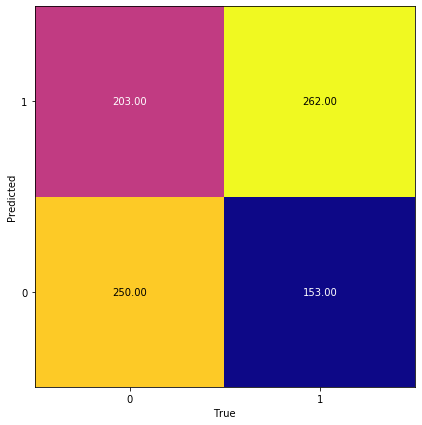

In [87]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

LogRegTF2 = LogisticRegression(penalty = 'l2', C =100)
LogRegTF2.fit(X_train_res,y_train_res)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test_norm, LogRegTF2.predict(X_test_norm))

personality_types = np.unique(y_test_norm)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()


In [88]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test_norm, LogRegTF2.predict(X_test_norm),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test_norm, LogRegTF2.predict(X_test_norm),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test_norm, LogRegTF2.predict(X_test_norm),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test_norm, LogRegTF2.predict(X_test_norm),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test_norm, LogRegTF2.predict(X_test_norm)) ))

R^2: 0.5916008404478843
precision: 0.5918941273779983
recall_score: 0.5918941273779983
f1_score: 0.5897833474936278
accuracy_score: 0.5898617511520737


#####  Klasyfikator 2 --> SVC

In [89]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

svmTF = SVC(kernel = 'rbf', C =1000, gamma = 0.1,probability = True)
svmTF.fit(X_train_res,y_train_res)



SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

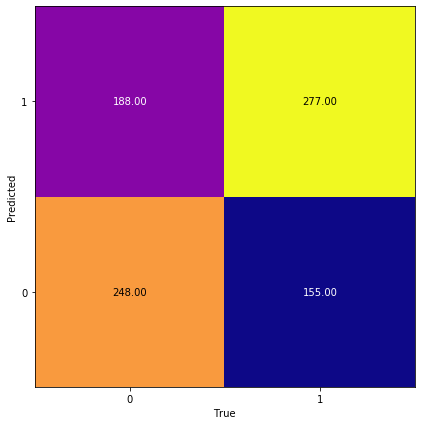

In [90]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

array =metrics.confusion_matrix(y_test_norm, svmTF.predict(X_test_norm))

personality_types = np.unique(y_test_norm)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()

In [91]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test_norm, svmTF.predict(X_test_norm),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test_norm, svmTF.predict(X_test_norm),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test_norm, svmTF.predict(X_test_norm),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test_norm, svmTF.predict(X_test_norm),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test_norm, svmTF.predict(X_test_norm)) ))

R^2: 0.6050055215766226
precision: 0.6055417700578991
recall_score: 0.6055417700578991
f1_score: 0.6043971229751403
accuracy_score: 0.6048387096774194


Average precision-recall score: 0.64


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.64')

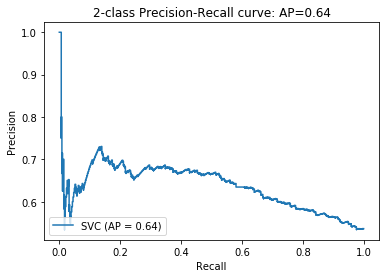

In [92]:
y_score = svmTF.decision_function(X_test_norm)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test_norm, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(svmTF, X_test_norm, y_test_norm)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#####  Klasyfikator 3 (najlepszy) --> Voting

In [93]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

voting_clf_TF = VotingClassifier(
    estimators=[('lr', svmTF), ('svc', LogRegTF2)], voting='soft')
voting_clf_TF.fit(X_train_res, y_train_res)



VotingClassifier(estimators=[('lr',
                              SVC(C=1000, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.1, kernel='rbf', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('svc',
                              LogisticRegression(C=100, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                          

In [94]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test_norm, voting_clf_TF.predict(X_test_norm),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test_norm, voting_clf_TF.predict(X_test_norm),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test_norm, voting_clf_TF.predict(X_test_norm),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test_norm, voting_clf_TF.predict(X_test_norm),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test_norm, voting_clf_TF.predict(X_test_norm)) ))

R^2: 0.605247066205129
precision: 0.6056244830438379
recall_score: 0.6056244830438379
f1_score: 0.6035835099066948
accuracy_score: 0.6036866359447005


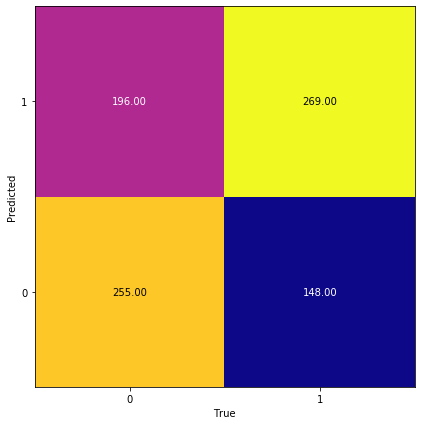

In [95]:

from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test_norm, voting_clf_TF.predict(X_test_norm))

personality_types = np.unique(y_test_norm)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show() 

In [96]:
R2.append(metrics.precision_score(y_test_norm, voting_clf_TF.predict(X_test_norm),average='macro'))
Precision.append(metrics.recall_score(y_test_norm, voting_clf_TF.predict(X_test_norm),average='macro'))
Recall.append( metrics.recall_score(y_test_norm, voting_clf_TF.predict(X_test_norm),average='macro'))
F1.append(metrics.f1_score(y_test_norm, voting_clf_TF.predict(X_test_norm),average='macro'))
Accuracy.append(metrics.accuracy_score(y_test_norm, voting_clf_TF.predict(X_test_norm)))

import pandas as pd
d = {'precision_score': Precision, 
     'recall_score': Recall, 
     'f1_score': F1,
     'accuracy_score' : Accuracy,
     'R2_score': R2
    }
df_wyniki = pd.DataFrame(data=d)
df_wyniki.insert(loc=0, column='Method', value=['IE','NS','TF'])
df_wyniki

,Method,precision_score,recall_score,f1_score,accuracy_score,R2_score
0,IE,0.533948,0.533948,0.530716,0.753456,0.564450
1,NS,0.508668,0.508668,0.508840,0.774194,0.509470
2,TF,0.605624,0.605624,0.603584,0.603687,0.605247


### Klasyfikacja J-P z Resamplingiem

In [97]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2


XX = df.drop(['type','posts','I-E','N-S','T-F','J-P','clean_posts'], axis=1).values
yy = df['J-P'].values

from sklearn.model_selection import train_test_split
X_train,X_test_norm,y_train,y_test_norm=train_test_split(XX,yy,test_size = 0.1, random_state=42)

sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#####  Klasyfikator 1 --> Extra Trees Classifier

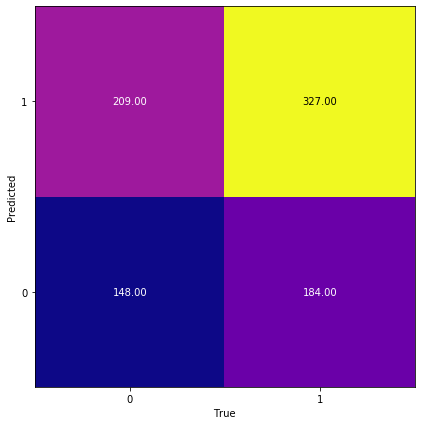

In [98]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

RNDJP = ExtraTreesClassifier(max_leaf_nodes = 128, n_estimators =1000)
RNDJP.fit(X_train_res,y_train_res)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test_norm, RNDJP.predict(X_test_norm))

personality_types = np.unique(y_test_norm)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()


In [99]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test_norm, RNDJP.predict(X_test_norm),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test_norm, RNDJP.predict(X_test_norm),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test_norm, RNDJP.predict(X_test_norm),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test_norm, RNDJP.predict(X_test_norm),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test_norm, RNDJP.predict(X_test_norm)) ))

R^2: 0.5272437742220176
precision: 0.527928879697896
recall_score: 0.527928879697896
f1_score: 0.5271249807661118
accuracy_score: 0.5472350230414746


#####  Klasyfikator 2 --> Regresja Logistyczna

0.5253456221198156


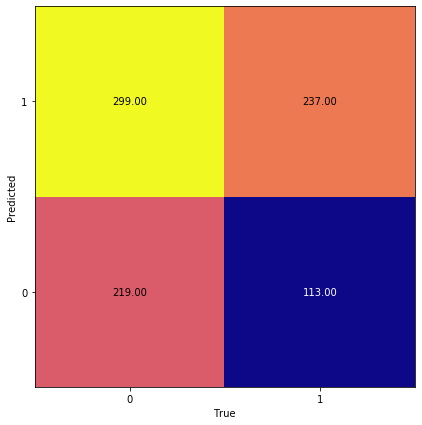

In [100]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

LogRegJP = LogisticRegression(penalty = 'l2', C =100)
LogRegJP.fit(X_train_res,y_train_res)
print(metrics.accuracy_score(y_test_norm,LogRegJP.predict(X_test_norm)))

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test_norm, LogRegJP.predict(X_test_norm))

personality_types = np.unique(y_test_norm)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()


In [101]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test_norm, LogRegJP.predict(X_test_norm),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test_norm, LogRegJP.predict(X_test_norm),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test_norm, LogRegJP.predict(X_test_norm),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test_norm, LogRegJP.predict(X_test_norm),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test_norm, LogRegJP.predict(X_test_norm)) ))

R^2: 0.54996138996139
precision: 0.5509013666606726
recall_score: 0.5509013666606726
f1_score: 0.5251414154826717
accuracy_score: 0.5253456221198156


#####  Klasyfikator 3 --> SVC

0.5622119815668203


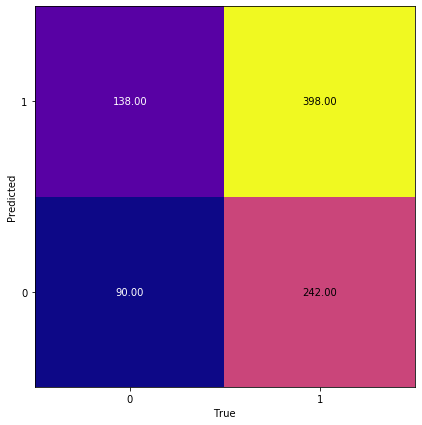

In [102]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics        
svmJP = SVC(kernel = 'rbf', C =1, gamma =100,probability = True)
svmJP.fit(X_train_res,y_train_res)

print(metrics.accuracy_score(y_test_norm,svmJP.predict(X_test_norm)))

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array =metrics.confusion_matrix(y_test_norm, svmJP.predict(X_test_norm))

personality_types = np.unique(y_test_norm)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()

In [103]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test_norm, svmJP.predict(X_test_norm),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test_norm, svmJP.predict(X_test_norm),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test_norm, svmJP.predict(X_test_norm),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test_norm, svmJP.predict(X_test_norm),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test_norm, svmJP.predict(X_test_norm)) ))

R^2: 0.5083059210526315
precision: 0.5068108253911167
recall_score: 0.5068108253911167
f1_score: 0.49914965986394555
accuracy_score: 0.5622119815668203


Average precision-recall score: 0.59


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.59')

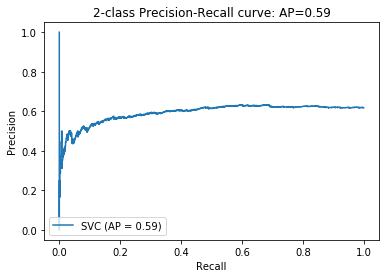

In [104]:
y_score = svmJP.decision_function(X_test_norm)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test_norm, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(svmJP, X_test_norm, y_test_norm)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#####  Klasyfikator 4 (Najlepszy) --> Voting

In [105]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

voting_clf_JP = VotingClassifier(
    estimators=[('lr', svmJP), ('svc', LogRegJP),('rnd', RNDJP)], voting='soft')
voting_clf_JP.fit(X_train_res, y_train_res)



VotingClassifier(estimators=[('lr',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=100, kernel='rbf', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('svc',
                              LogisticRegression(C=100, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling...
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_

In [106]:

from sklearn import metrics

print("R^2: {}".format(metrics.precision_score(y_test_norm, voting_clf_JP.predict(X_test_norm),average='macro') ))
print("precision: {}".format(metrics.recall_score(y_test_norm, voting_clf_JP.predict(X_test_norm),average='macro') ))
print("recall_score: {}".format( metrics.recall_score(y_test_norm, voting_clf_JP.predict(X_test_norm),average='macro') ))
print("f1_score: {}".format( metrics.f1_score(y_test_norm, voting_clf_JP.predict(X_test_norm),average='macro') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test_norm, voting_clf_JP.predict(X_test_norm)) ))

R^2: 0.5139991089128091
precision: 0.5121830606006115
recall_score: 0.5121830606006115
f1_score: 0.5080206903015327
accuracy_score: 0.5610599078341014


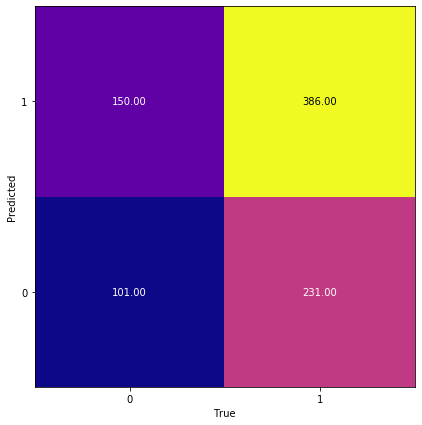

In [107]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
array =metrics.confusion_matrix(y_test_norm, voting_clf_JP.predict(X_test_norm))

personality_types = np.unique(y_test_norm)

df_cm = pd.DataFrame(array, index = [i for i in personality_types],
                  columns = [i for i in personality_types])

plt.figure(figsize = (7,7))
heatmap(array, xlabel='True', xticklabels=personality_types, ylabel='Predicted', yticklabels=personality_types, cmap="plasma")
plt.show()


In [108]:
R2.append(metrics.precision_score(y_test_norm, voting_clf_JP.predict(X_test_norm),average='macro'))
Precision.append(metrics.recall_score(y_test_norm, voting_clf_JP.predict(X_test_norm),average='macro'))
Recall.append( metrics.recall_score(y_test_norm, voting_clf_JP.predict(X_test_norm),average='macro'))
F1.append(metrics.f1_score(y_test_norm, voting_clf_JP.predict(X_test_norm),average='macro'))
Accuracy.append(metrics.accuracy_score(y_test_norm, voting_clf_JP.predict(X_test_norm)))

import pandas as pd
d = {'precision_score': Precision, 
     'recall_score': Recall, 
     'f1_score': F1,
     'accuracy_score' : Accuracy,
     'R2_score': R2
    }
df_wyniki = pd.DataFrame(data=d)
df_wyniki.insert(loc=0, column='Method', value=['IE','NS','TF','JP'])
df_wyniki

,Method,precision_score,recall_score,f1_score,accuracy_score,R2_score
0,IE,0.533948,0.533948,0.530716,0.753456,0.564450
1,NS,0.508668,0.508668,0.508840,0.774194,0.509470
2,TF,0.605624,0.605624,0.603584,0.603687,0.605247
3,JP,0.512183,0.512183,0.508021,0.561060,0.513999


In [109]:
def Wyniki(miara):
    from matplotlib import cm
  
    print( df_wyniki[miara].values)
    cnt_srs = df_wyniki[miara]
    #eee = df_wyniki.Method.value_counts()
    viridis = cm.get_cmap('plasma', 12)
    colors = viridis(np.flip(np.linspace(0, 1, 4)))
    plt.figure(figsize=(12,4))
    sns.barplot(df_wyniki.Method, cnt_srs, alpha=0.8,palette=colors)
    plt.title(miara)
    plt.ylabel('Wartosci', fontsize=12)
    plt.xlabel('Cechy', fontsize=12)
    plt.show()



### Podsumowanie

    Nie udało się osiągnąć dobrego stopnia Klasyfikacji dla poszczególnych Typów osobowości MBTI.
    Klasyfikator dla poszczególnych cech osobowości również nie osiagnęly piorunujacego stopnia poprawności.

In [110]:
df_wyniki

,Method,precision_score,recall_score,f1_score,accuracy_score,R2_score
0,IE,0.533948,0.533948,0.530716,0.753456,0.564450
1,NS,0.508668,0.508668,0.508840,0.774194,0.509470
2,TF,0.605624,0.605624,0.603584,0.603687,0.605247
3,JP,0.512183,0.512183,0.508021,0.561060,0.513999


[0.56445045 0.50947045 0.60524707 0.51399911]


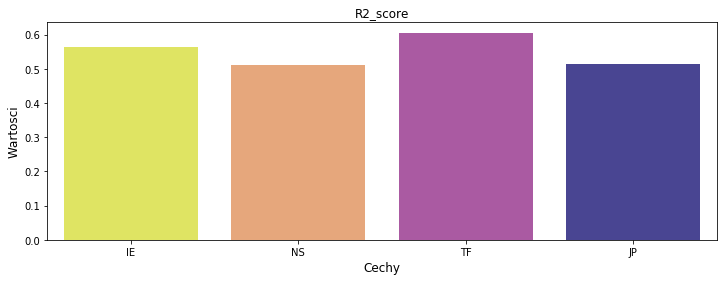

[0.75345622 0.77419355 0.60368664 0.56105991]


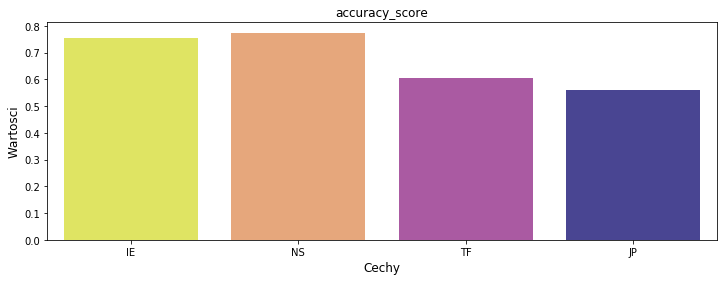

[0.53071598 0.50884    0.60358351 0.50802069]


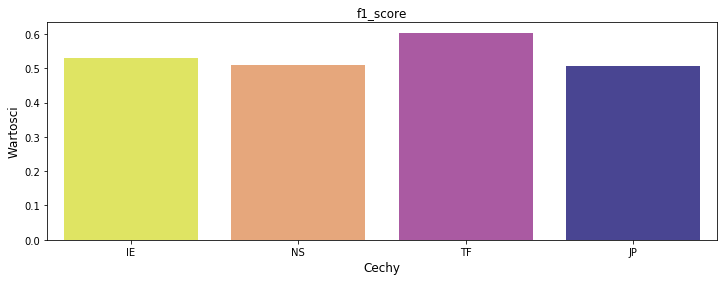

[0.533948   0.50866828 0.60562448 0.51218306]


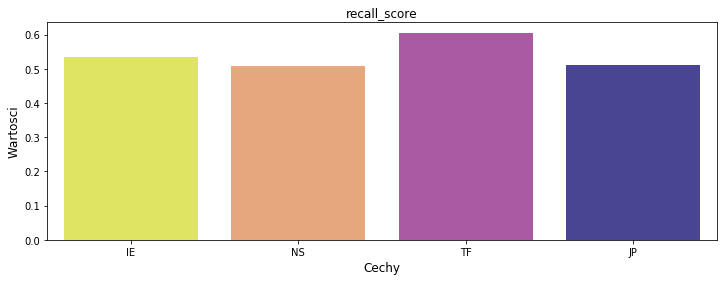

[0.533948   0.50866828 0.60562448 0.51218306]


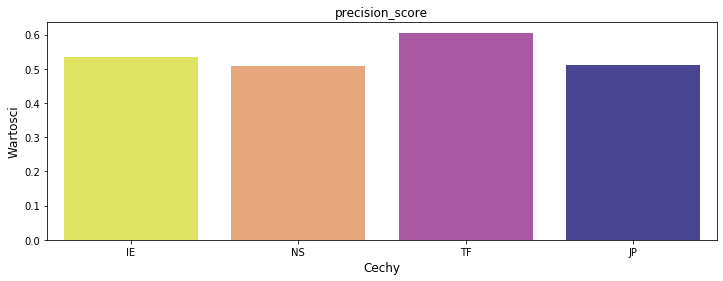

,Method,precision_score,recall_score,f1_score,accuracy_score,R2_score
0,IE,0.533948,0.533948,0.530716,0.753456,0.564450
1,NS,0.508668,0.508668,0.508840,0.774194,0.509470
2,TF,0.605624,0.605624,0.603584,0.603687,0.605247
3,JP,0.512183,0.512183,0.508021,0.561060,0.513999


In [111]:
Wyniki('R2_score')
Wyniki('accuracy_score')
Wyniki('f1_score')
Wyniki('recall_score')
Wyniki('precision_score')

df_wyniki    

    Możliwe jest stworzenie Modelu niemal w każdej z Cech osobowości(Takie modele są obecne w notebooku z Gridami),          który przekroczy poprawność 70% a nawet 90%, lecz przy jednoczesnym poświęceniu Precision i Recall. W takich modelach    przewidywany przydział do mniej licznej klasy jest żaden, i to z tego wynika duża poprawność

    Stworzone Modele uwzględniają najlepszy możliwy dla danej Cechy Recall - Precision Tradeoff, przy jednoczesnym            maksymalizowaniu poprawności

    Możliwą przyczyną tego jest niezbalansowany i nie oddający faktycznego występowania poszczególnych typów osobowości 
    zbiór Postów

    Kolejną przyczyną moze być strukturalne podobieństwo ścian tekstu, 
    zmniejszające efektywność TFIDF oraz manualnie wybranych cech w predykcji
    
    Zastosowanie nieefektywnych klasyfikatorów choć mało prawdopodobne też można obwiniać o słabe wyniki. 
    Zbyt mała ilość danych również mogła wpłynąć na efektywność

    Na końcu obwiniana może być sama skala MBTI, która choć szeroko stosowana w praktyce, 
    budzi duże kontrowersje u Psychologów
    Wykazują oni brak korelacji z oryginalnymi Cechami osobowości

    Jak wskazuje David Pittinger (1993), możliwe jest że MBTI w rzeczywistosci nie mierzy cech które 
    mogą być eksponowane w zachowaniu
    
    1. Typy to tylko Stereotypy - nie opisują osobowości informatywnie.
    2. Załozenie wrodzoności szufladkuje ludzi, uniemożliwiając wybor preferencji.
    3. Deskrypcje tylko wydają się psychologicznie akuratne.
    4. Dane z MBTI nie mają rozkłądu bimodalnego co przewidywane byłoby, jeśli osobowości miałyby idealnie pasować.
    5. Nie można polegać na założeniach MBTI szczególnie wrodzoności.
    6. Nie ma dowodu że MBTI może pomóc przewidywać karierę zawodową (w przeciwieństwie do innych miar osobowości jak OCEAN).
    
    
    

